# Risk Assessment for Wildfire

Click [![Fire](https://img.shields.io/badge/FIRE-repository-orange)](https://github.com/CLIMAAX/FIRE) to go to this workflow's GitHub repository.


Contributors:                                                                                                                   
- Andrea Trucchia (Andrea.trucchia@cimafoundation.org)
- Farzad Ghasemiazma (Farzad.ghasemiazma@cimafoundation.org)
- Giorgio Meschi (Giorgio.meschi@cimafoundation.org)

## Methodology

In the process of determining the hazard classes (either 6 or 12 classes) through our Machine Learning (ML) algorithm, we will employ the overarching risk formula: 

    Risk = Hazard * Vulnerability * Exposure

The hazard component is already defined by the ML algorithm in terms of intensities. Our subsequent steps involve preprocessing the vulnerability and exposure data obtained respectively from the Joint Research Centre (JRC) and OpenStreetMap. We will identify areas where exposed elements intersect and evaluate the hazard levels in those areas using vulnerability curves, also known as damage level curves, to calculate the overall risk. Subsequently, we will aggregate the results at the municipality (or provincial) level to generate a comprehensive Risk Map for the target area.

### Vulnerability Data

- 1_Population vulnerability: Aggregated index of population vulnerability. Based on the population exposed in the vulnerable Wildland Urban Interface derived after https://doi.org/10.2760/46951

    Layer name : Population vulnerability<br>
    Layer group: Vulnerability<br>
    Layer unit : Percentile (%)<br>
    CSV file   : var-vuln-pop_unit-dimensionless.csv<br>
    Projection : the native geospatial projection is EURO-CORDEX<br>
                (https:euro-cordex.net).  European grid of the Coordinated<br>
                Regional Climate Downscaling Experiment (CORDEX) by World Climate<br>
                Research Programme (WCRP), https://purl.org/INRMM-MiD/z-THSLFEYQ .<br>
                The standard grid EUR-11 is used (grid cell resolution of<br>
                approximately 0.11 degrees, or about 12.5 km).<br>
                Available reprojection information for WGS84<br>
                and Lambert Azimuthal Equal-Area projection (ETRS89-LAEA).<br>

             
- 2_Ecological vulnerability: Aggregated index of ecological vulnerability 

    Layer name : Ecological vulnerability<br>
    Layer group: Vulnerability<br>
    Layer unit : Percentile (%)<br>
    CSV file   : var-vuln-ecol_unit-dimensionless.csv<br>
    Projection : the native geospatial projection is EURO-CORDEX<br>
                (https:euro-cordex.net).  European grid of the Coordinated<br>
                Regional Climate Downscaling Experiment (CORDEX) by World Climate<br>
                Research Programme (WCRP), https://purl.org/INRMM-MiD/z-THSLFEYQ .<br>
                The standard grid EUR-11 is used (grid cell resolution of<br>
                approximately 0.11 degrees, or about 12.5 km).<br>
                Available reprojection information for WGS84<br>
                and Lambert Azimuthal Equal-Area projection (ETRS89-LAEA).<br>

- 3_Economic vulnerability: Aggregated index of economic vulnerability. Based on vegetation restoration cost，for forest and agriculture areas


    Layer name : Economic vulnerability<br>
    Layer group: Vulnerability<br>
    Layer unit : Percentile (%)<br>
    CSV file   : var-vuln-econ_unit-dimensionless.csv<br>
    Projection : the native geospatial projection is EURO-CORDEX<br>
                (https:euro-cordex.net).  European grid of the Coordinated<br>
                Regional Climate Downscaling Experiment (CORDEX) by World Climate<br>
                Research Programme (WCRP), https://purl.org/INRMM-MiD/z-THSLFEYQ .<br>
                The standard grid EUR-11 is used (grid cell resolution of<br>
                approximately 0.11 degrees, or about 12.5 km).<br>
                Available reprojection information for WGS84<br>
                and Lambert Azimuthal Equal-Area projection (ETRS89-LAEA).<br>

- 4_Ecological-economic vulnerability: Aggregated index of ecological and economic vulnerability

    Layer name : Ecological-economic vulnerability<br>
    Layer group: Vulnerability<br>
    Layer unit : Percentile (%)<br>
    CSV file   : var-vuln-ecol-econ_unit-dimensionless.csv<br>
    Projection : the native geospatial projection is EURO-CORDEX<br>
                (https:euro-cordex.net).  European grid of the Coordinated<br>
                Regional Climate Downscaling Experiment (CORDEX) by World Climate<br>
                Research Programme (WCRP), https://purl.org/INRMM-MiD/z-THSLFEYQ .<br>
                The standard grid EUR-11 is used (grid cell resolution of<br>
                approximately 0.11 degrees, or about 12.5 km).<br>
                Available reprojection information for WGS84<br>
                and Lambert Azimuthal Equal-Area projection (ETRS89-LAEA).<br>
                
### Possible Exposure Data: Elements at Risk

- 1_Roads from OSM like primary, secondary, tertiery

- 2_Buildings and properties with different categories like hospitals, hotels, schools, shelters

- 3_Wildland Urban interface (WUI)

## Preparation work

### Load libraries

Importing libraries required for the assessment and pre-processing of the data

:::{admonition} Find more info about the libraries used in this workflow here
:class: hint dropdown

- [rasterio](https://rasterio.readthedocs.io/en/stable/): A library for reading and writing geospatial raster datasets. It provides functionalities to work with raster data formats such as GeoTIFF and perform various raster operations.
- [os](https://docs.python.org/3/library/os.html): Provides functions for interacting with the operating system, such as file operations and environment variables.
- [tqdm](https://github.com/tqdm/tqdm): A fast, extensible progress bar for Python and CLI. It allows for easy visualization of loop progress and estimates remaining time.
- [matplotlib.pyplot](https://matplotlib.org/): Matplotlib's plotting interface, providing functions for creating and customizing plots. %matplotlib inline is an IPython magic command to display Matplotlib plots inline within the Jupyter Notebook or IPython console.
- [numpy](https://numpy.org/): A fundamental package for scientific computing with Python. It provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
- [gdal](https://gdal.org/): Python bindings for the Geospatial Data Abstraction Library (GDAL), used for reading and writing various raster geospatial data formats.
- [geopandas](https://geopandas.org/): Extends the Pandas library to support geometric operations on GeoDataFrames, allowing for easy manipulation and analysis of geospatial data.
- [pandas](https://pandas.pydata.org/): A powerful data manipulation and analysis library for Python. It provides data structures like DataFrame for tabular data and tools for reading and writing data from various file formats.
- [rioxarray](https://corteva.github.io/rioxarray/stable/): Rasterio xarray extension - to make it easier to use GeoTIFF data with xarray.
- [xarray](https://xarray.pydata.org/): An open-source project and Python package that aims to bring the labeled data power of pandas to the physical sciences, by providing N-dimensional variants of the core pandas data structures.
- [cartopy.crs](https://scitools.org.uk/cartopy/docs/latest/): A cartographic projection library for Python.
- [cartopy.feature](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html): Contains a collection of classes and functions that are used to control the appearance of map features.
- [cartopy](https://scitools.org.uk/cartopy/docs/latest/): A cartographic library providing object-oriented map projection definitions, and arbitrary point, line, and polygon transformations.
- [glob](https://docs.python.org/3/library/glob.html): A module that finds all the pathnames matching a specified pattern.
- [scipy.ndimage](https://docs.scipy.org/doc/scipy/reference/ndimage.html): A submodule of SciPy for numerical operations on n-dimensional arrays.
:::


In [1]:
import os
import glob

import numpy as np
from osgeo import gdal, ogr
import geopandas as gpd
import rasterio
import rasterio.plot
from rasterio.mask import mask
from rasterio.plot import show
from rasterio import features
from scipy.ndimage import binary_dilation

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors
from matplotlib.patches import Patch

%matplotlib inline

### Sample data

Sample data for the Catalonia case study is available from the CLIMAAX cloud storage. Download instructions are available in the accompanying [hazard assessment workflow](Hazard_assessment_FIRE_ML.ipynb#sample-data) where the data was already used. To run this notebook with the Catalonia example setup, please make sure the files are available for reuse here.


### Create output folders

In [ ]:
os.makedirs("./data_cat/Analysis_maps", exist_ok=True)

### Functions that are going to be used

These functions are going to be used in the next steps of the analysis. They concern buffering,
rasterizing, saving rasters, and calculating the wildfire risk based on hazard and exposure vulnerability.

In [4]:
def WUI_buffer(land_cover: np.array, urban_codes: list, forest_codes: list, pixel_radius:int):
    '''
    land_cover: np.array, the raster of land cover
    urban_codes: list, the codes of urban areas
    forest_codes: list, the codes of forest areas
    pixel_radius: int, the radius of the buffer
    '''
    kernel = np.ones((2*pixel_radius + 1, 2*pixel_radius + 1))
    # craete two binary 0 or 1 raster of urban and wildland
    urban = np.where(np.isin(land_cover, urban_codes), 1, 0)
    wildland = np.where(np.isin(land_cover, forest_codes), 1, 0)
    # # clip borders
    # raster_no_borders = raster_to_buffer[1:raster_to_buffer.shape[0]-1,1:raster_to_buffer.shape[1]-1]
    urban_dilated = binary_dilation(urban > 0, structure = kernel)
    WUI = np.where((urban_dilated == True ) & (wildland == 1), 1, 0)
    return WUI


def rasterize_numerical_feature(gdf, reference_file, column=None, verbose=True):
    """Rasterize a vector file using a reference raster to get the shape and the transform.

    :param gdf: GeoDataFrame with the vector data
    :param reference_file: Path to the reference raster
    :param column: Name of the column to rasterize. If None, it will rasterize the geometries
    :return: Rasterized version of the vector file
    """
    with rasterio.open(reference_file) as f:
        out = f.read(1,   masked = True)
        myshape = out.shape
        mytransform = f.transform #f. ...
    del out
    if verbose:
        print("Shape of the reference raster:", myshape)
        print("Transform of the reference raster:", mytransform)
    out_array = np.zeros(myshape)#   out.shape)
    # this is where we create a generator of geom, value pairs to use in rasterizing
    if column is not None:
        shapes = ((geom, value) for geom, value in zip(gdf.geometry, gdf[column]))
    else:
        shapes = ((geom, 1) for geom in gdf.geometry)
    print("Features.rasterize is launched...")
    burned = features.rasterize(shapes=shapes, fill=np.NaN, out=out_array, transform=mytransform)#, all_touched=True)
    #    out.write_band(1, burned)
    print("Features.rasterize is done...")
    return burned


def save_raster_as(array, output_file, reference_file, **kwargs):
    """Save a raster from a 2D numpy array using another raster as reference to get the spatial extent and projection.

    :param array: 2D numpy array with the data
    :param output_file: Path to the output raster
    :param reference_file: Path to a raster who's geotransform and projection will be used
    :param kwargs: Keyword arguments to be passed to rasterio.open when creating the output raster
    """
    with rasterio.open(reference_file) as f:
        profile = f.profile
        profile.update(**kwargs)
        with rasterio.open(output_file, 'w', **profile) as dst:
            dst.write(array.astype(profile['dtype']), 1)


def max_sliding_windows(array, windows_size = (3,3)):
        # Store shapes of inputs
        N,M = windows_size
        if len(array.shape) == 3:
            array = array[0,:,:]
        P,Q = array.shape
        # Use 2D max filter and slice out elements not affected by boundary conditions
        filtered_array = maxf2D(array, size=(M,N))
        return filtered_array


def Wildfire_Risk_3classes(arr1: np.array, arr2: np.array):
    '''Categorizes wildfire risk based on hazard and exposure vulnerability arrays.

    Parameters:
    arr1: Hazard array (6 classes)
    arr2: Exposure vulnerability array (3 classes)

    Returns:
    Risk array
    '''
    matrix_values = np.array([
        [1, 1, 1, 2, 3, 4],
        [1, 1, 2, 3, 4, 4],
        [1, 2, 3, 4, 4, 4]])
    # Adjust indices to match Python's zero-based indexing
    arr1_indices = arr1 - 1
    arr2_indices = arr2 - 1
    arr1.astype(np.int32)
    arr2.astype(np.int32)
    # Select risk values based on hazard and exposure vulnerability arrays
    Risk = matrix_values[arr1_indices, arr2_indices]
    return Risk


def buffer(exp_arr, pixel_radius = 2):
    kernel = np.ones((2*pixel_radius + 1, 2*pixel_radius + 1))
    exposed_true = binary_dilation(exp_arr > 0, structure = kernel)
    exposed_buffer = np.where((exposed_true == True ) | (exposed_true == 1), 1, 0)
    return exposed_buffer


def Wildfire_Risk_4classes(arr1:np.array, arr2:np.array):
    '''
    arr1: hazrad array 6 classes
    arr2: exposure_vul array 4 classes
    ex\haz   1  2  3  4  5  6
        1   [1, 1, 1, 2, 3, 4],
        2   [1, 1, 2, 3, 4, 4],
        3   [1, 2, 3, 3, 4, 4],
        4   [1, 2, 3, 4, 4, 4],
    '''
    if len(np.unique(arr1)) == 4:
        matrix_values = np.array([
            [1, 1, 1, 2, 3, 4],
            [1, 1, 2, 3, 4, 4],
            [1, 2, 3, 3, 4, 4],
            [1, 2, 3, 4, 4, 4]])
        Risk = matrix_values[arr1 - 1, arr2 - 1]
        return Risk
    else:
        print('The hazard array should have 6 classes')
        return None


def contigency_matrix_on_array(xarr, yarr, xymatrix, nodatax, nodatay):
        '''
        xarr: 2D array, rows entry of contingency matrix
        yarr: 2D array, cols entry of contingency matrix
        xymatrix: 2D array, contingency matrix
        nodatax1: value for no data in xarr : if your array has nodata = np.nan >> nodatax or nodatay has to be 1
        nodatax2: value for no data in yarr : if your array has nodata = np.nan >> nodatax or nodatay has to be 1
        '''
        # if arr have nan, mask it with lowest class
        xarr = np.where(np.isnan(xarr)==True , 1, xarr)
        yarr = np.where(np.isnan(yarr)==True , 1, yarr)
        # convert to int
        xarr = xarr.astype(int)
        yarr = yarr.astype(int)

        mask = np.where(((xarr == nodatax) | (yarr ==nodatay)), 0, 1)
        # put lowest class in place of no data
        yarr[~mask] = 1
        xarr[~mask] = 1
        # apply contingency matrix
        output = xymatrix[ xarr - 1, yarr - 1]
        # mask out no data
        output[~mask] = 0
        return output


def diff_risk_degree(risk1_arr:np.array, risk2_arr:np.array, ref_arr ,title:str = 'title'):
    if risk1_arr.shape == risk2_arr.shape:
        risk_difference = risk2_arr - risk1_arr
    # Define categories for differences # Create a custom colormap
    classes_names = ['High Decrease', 'Medium Decrease', 'Low Decrease','No change', 'Low Increase', 'Medium Increase', 'High Increase']
    array_classes = [-3.1, -2.1, -1.1, 0.1, 1.1, 2.1, 3.1]
    classes_colors = ['navy', 'royalblue', 'lightblue', 'lightcoral', 'indianred', 'darkred']
    # Plotting the differences
    plot_raster_V2(risk_difference, ref_arr, title = title,
                   classes_names =classes_names,
                   array_classes = array_classes,
                   classes_colors = classes_colors)
    # plt.figure(figsize=(8, 6))
    # plt.imshow(np.where(ref_arr = -9999, np.nan, risk_difference), cmap=cmap)
    # cbar = plt.colorbar(ticks=category_bounds)
    # # cbar.set_ticklabels(categories)  # Set category labels
    # plt.title(title)
    # plt.tight_layout()
    return risk_difference


def diff_climate_degree(climate_arr1: np.array, climate_arr2: np.array, ax: plt.Axes, title: str = 'title'):
    if climate_arr1.shape == climate_arr2.shape:
        climate_arr2 = np.where(climate_arr2 == -9999, np.nan, climate_arr2)
        climate_arr1 = np.where(climate_arr1 == -9999, np.nan, climate_arr1)
        climate_difference = climate_arr2 - climate_arr1
        # Define categories for differences
        categories = ['Decrease', 'No change', 'Increase']
        colors = ['red', 'blue', 'green']  # Red for decrease, blue for no change, green for increase
        bounds = [-np.inf, 0, np.inf]
        cmap = ListedColormap(colors)
        # Plotting the differences
        im = ax.imshow(climate_difference, cmap=cmap, vmin=-1, vmax=1, interpolation='nearest')
        cbar = plt.colorbar(im, ax=ax, label='Degree of Change', ticks=range(-1, 2))
        cbar.set_ticklabels(categories)  # Set category labels
        ax.set_title(title)
        return climate_difference, ax


def plot_raster_V2(raster,ref, cmap = 'seismic', title = '', figsize = (10, 8), dpi = 300, outpath = None,
                    array_classes = [], classes_colors = [], classes_names = [], shrink_legend = 1, xy = (0.5, 1.1), labelsize = 10,
                    basemap = False,
                    basemap_params = {'crs' : 'EPSG:4326', 'source' : None, 'alpha' : 0.5, 'zoom' : '11'},
                    add_to_ax: tuple = None):
    '''plot a raster object with possibility to add basemap and continuing to build upon the same ax example with discrete palette:

    array_classes = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1],  # all the values including nodata
    classes_colors = ['#0bd1f700','#0bd1f8', '#1ff238', '#ea8d1b', '#dc1721', '#ff00ff'], # a color for each range
    classes_names = [ 'no data', 'Very Low', 'Low', 'Medium', 'High', 'Extreme'], # names
    add_to_ax: pass an ais to overlay other object to the same ax. it is a tuple (fig, ax)
    '''
    if add_to_ax is None:
        fig, ax = plt.subplots(figsize=figsize, dpi = dpi)
    else:
        fig = add_to_ax[0]
        ax = add_to_ax[1]

    if len(array_classes) > 0 and len(classes_colors) > 0 and len(classes_names) > 0:
        cmap = colors.ListedColormap(classes_colors)
        norm = colors.BoundaryNorm(array_classes, cmap.N)
        # plot the raster
        f = show(np.where(ref == -9999, np.nan,raster), ax = ax,
                cmap = cmap, norm=norm, interpolation='none')
        img = f.get_images()[0]
        # trick to shift ticks labels in the center of each color
        cumulative = np.cumsum(array_classes, dtype = float)
        cumulative[2:] = cumulative[2:] - cumulative[:-2]
        ticks_postions_ = cumulative[2 - 1:]/2
        ticks_postions = []
        ticks_postions.extend(list(ticks_postions_))
        # plot colorbar
        cbar = fig.colorbar(img, boundaries=array_classes, ticks=ticks_postions, shrink = shrink_legend)
        cbar.ax.set_yticklabels(classes_names)
        cbar.ax.tick_params(labelsize = labelsize)
    else:
        # use imshow so that we have something to map the colorbar to
        image = show(np.where(ref == -9999, np.nan,raster), ax = ax,
                    cmap = cmap)
        img = image.get_images()[0]
        cbar = fig.colorbar(img, ax=ax,  shrink = shrink_legend)
        cbar.ax.tick_params(labelsize = labelsize)

    ax.set_xticks([])
    ax.set_yticks([])
    for s in [ "top", 'bottom', "left", 'right']:
        ax.spines[s].set_visible(False)

    ax.annotate(title,
                xy = xy, xytext = xy, va = 'center', ha = 'center',
                xycoords  ='axes fraction', fontfamily='sans-serif', fontsize = 12, fontweight='bold')

    if basemap:
        if basemap_params['source'] is None:
            cx.add_basemap(ax, crs = basemap_params['crs'], source = cx.providers.OpenStreetMap.Mapnik, alpha = basemap_params['alpha'],
                            zorder = -1)
        else:
            cx.add_basemap(ax, crs = basemap_params['crs'], source = basemap_params['source'], alpha = basemap_params['alpha'],
                            zorder = -1, zoom = basemap_params['zoom'])

    if outpath is not None:
        fig.savefig(outpath, dpi = dpi, bbox_inches = 'tight')
    return fig, ax

### Visualization of Vulnerability raster from JRC

In the following, JRC products for vulnerability to wildfire are used. This analysis uses the layers "Population vulnerability", "Ecological vulnerability", "Economic vulnerability", and "Ecological-economic vulnerability". These layers are available in the native geospatial projection of EURO-CORDEX (https://euro-cordex.net) with a grid cell resolution of approximately 0.11 degrees, or about 12.5 km. The layers are available in the WGS84 and Lambert Azimuthal Equal-Area projection (ETRS89-LAEA).

More information:

- [EFFIS Wildfire Risk Viewer](https://forest-fire.emergency.copernicus.eu/apps/fire.risk.viewer/)
- European Commission, Joint Research Centre, Costa, H., De Rigo, D., Libertà, G. et al., European wildfire danger and vulnerability in a changing climate – Towards integrating risk dimensions – JRC PESETA IV project – Task 9 - forest fires, Publications Office of the European Union, 2020, https://data.europa.eu/doi/10.2760/46951 https://doi.org/10.2760/46951


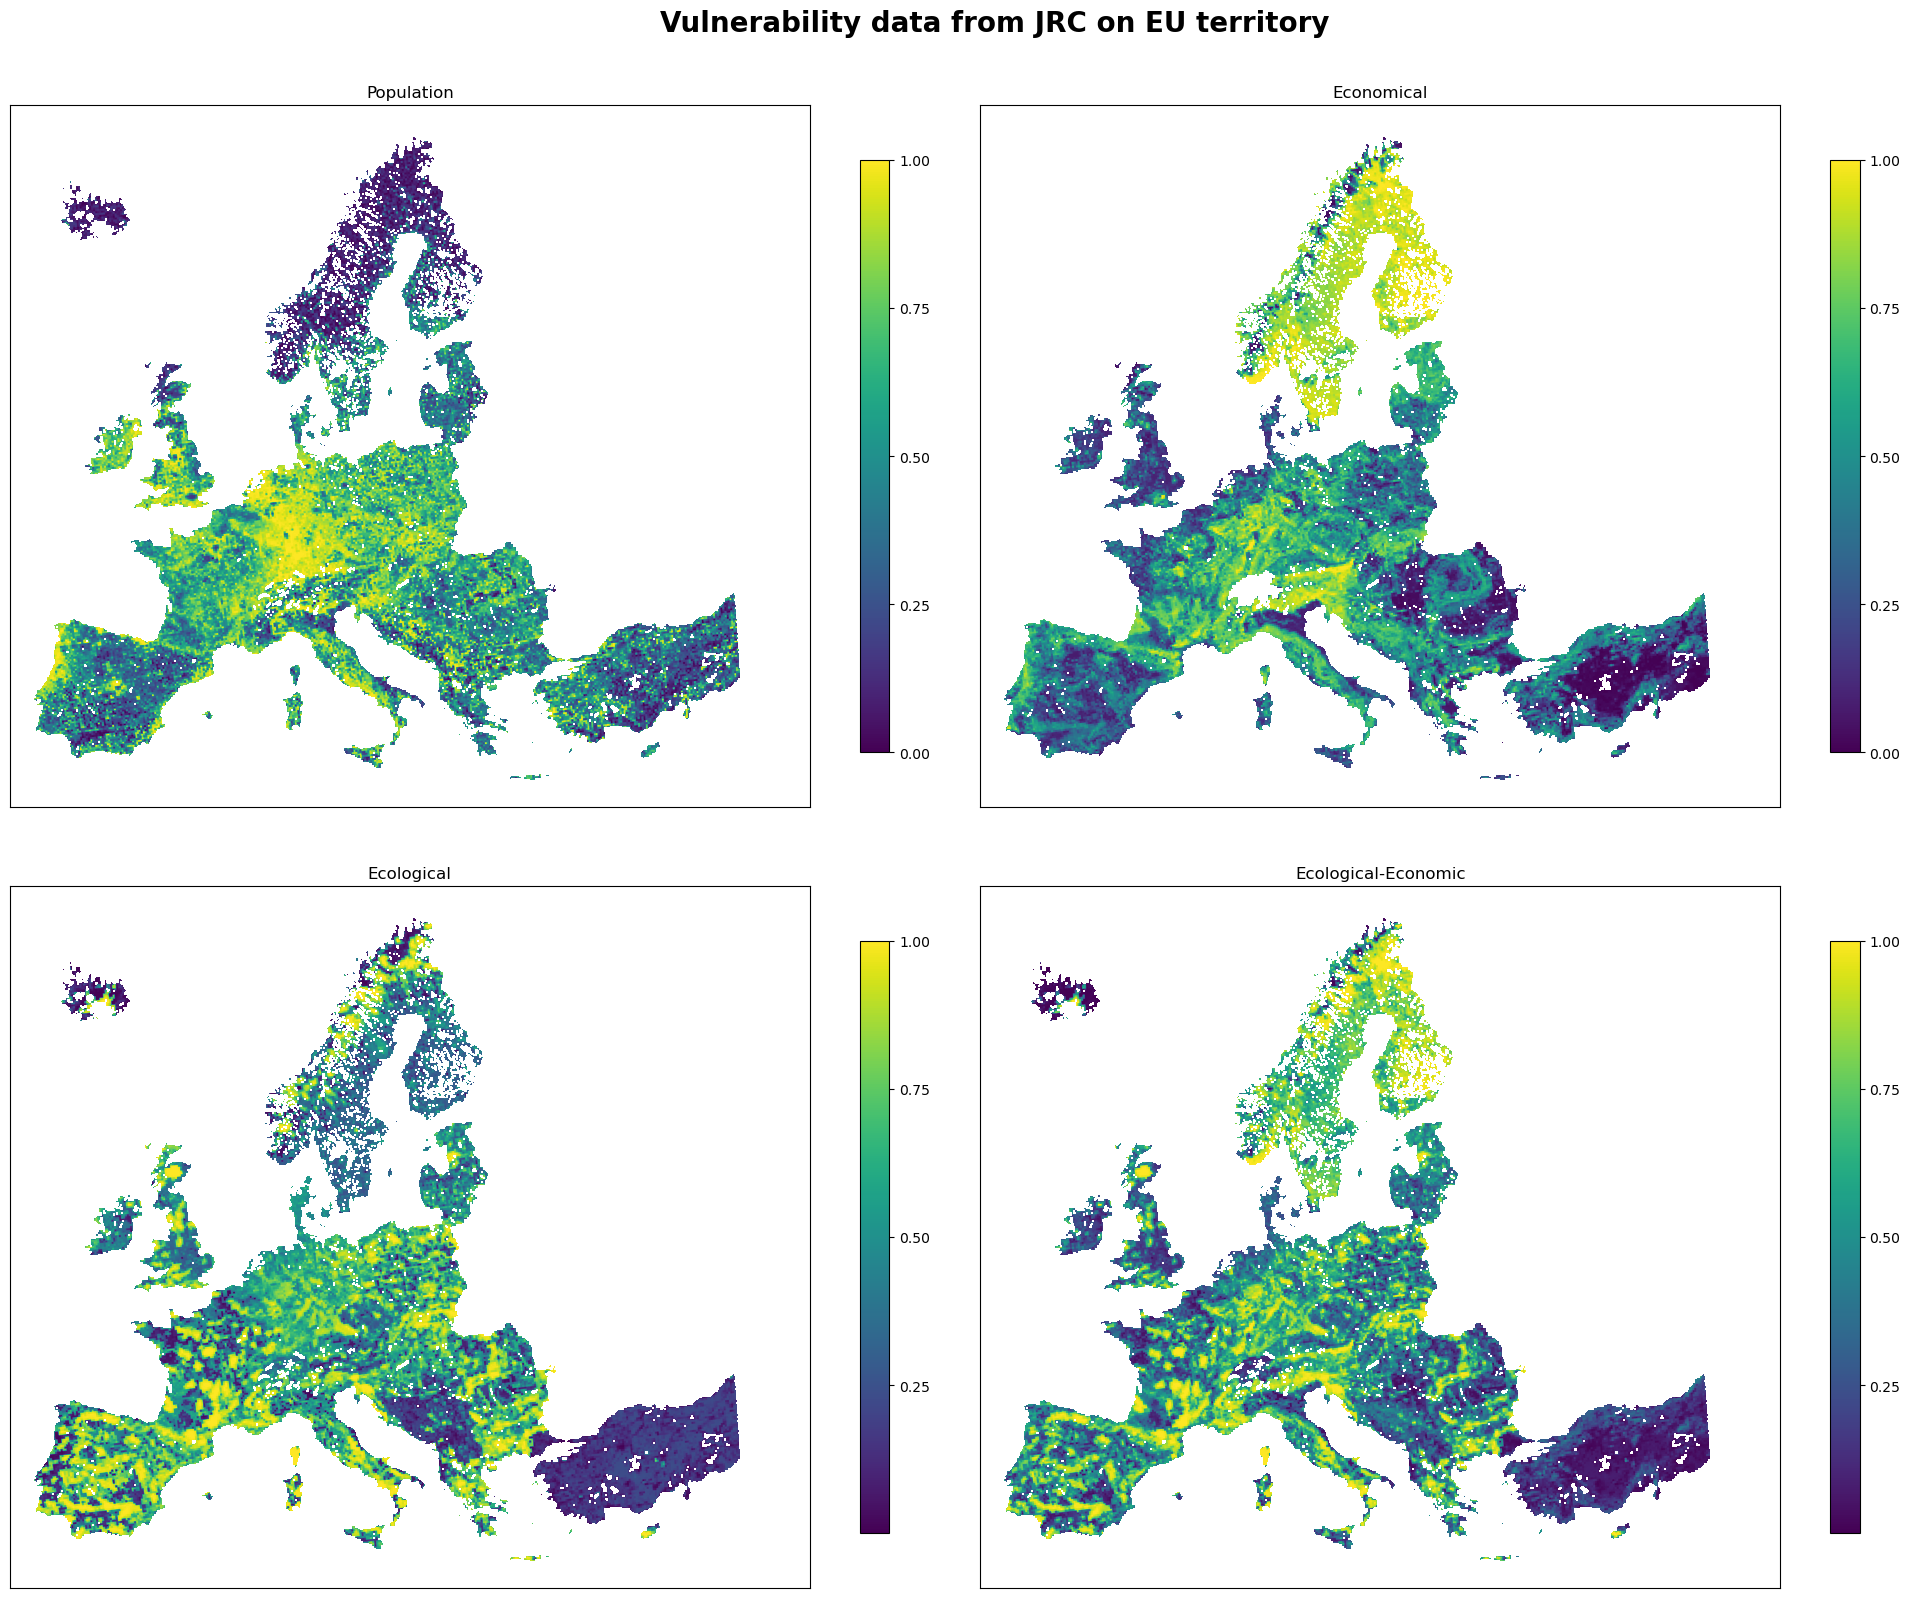

In [5]:
# Check vulnerability data from JRC that is on EU territory.
# Define paths to GeoTIFF files of vulnerability
vu_pop_path = './data_cat/Vul_data/population/var-vuln-pop_unit-dimensionless.tiff'
vu_econ_path = './data_cat/Vul_data/economical/var-vuln-econ_unit-dimensionless.tiff'
vul_ecol_path = './data_cat/Vul_data/ecological/var-vuln-ecol_unit-dimensionless.tiff'
vul_ecol_econ_path = './data_cat/Vul_data/eclo_econ/var-vuln-ecol-econ_unit-dimensionless.tiff'

# Names of layers
names = ['Population', 'Economical', 'Ecological', 'Ecological-Economic']

# Visualization of data
fig, ax = plt.subplots(2, 2, figsize=(20, 17))
fig.suptitle('Vulnerability data from JRC on EU territory', fontsize=20, fontweight='bold')
paths = [vu_pop_path, vu_econ_path, vul_ecol_path, vul_ecol_econ_path]

for vul_path, ax_, name in zip(paths, ax.flatten(), names):

    with rasterio.open(vul_path) as src:
        rasterio.plot.show(src, ax=ax_, cmap='viridis')
        fig.colorbar(ax=ax_, shrink=0.7, ticks = [0, .25, .5, .75, 1],mappable=ax_.images[0])
        ax_.set_title(name, fontsize=12)
        ax_.set_xticks([])
        ax_.set_yticks([])

plt.tight_layout()
plt.show()

In the following, we are clipping the Vulnerability Data to the area of interest (Catalonia) based on the DEM raster and save it in a folder. We are going to use DEM as referenece to clip and align the data (rasters) with its CRS, resolution, and extent.

In [6]:
# Path of the DEM file that is going to be used as reference
DEM_path = './data_cat/hazard/input_hazard/dem_3035_clip.tif'
name_area = 'catalan'

vul_data_list = [vu_pop_path, vu_econ_path, vul_ecol_path, vul_ecol_econ_path]

# Resample data with bilinear method to have a better visualization
resampleAlg =  'bilinear' # >>>>>>>>>>>>  other opetions:  'near', 'bilinear'

for vu_data, name in zip(vul_data_list, names):
    # Clip the data to the extent of the hazard data
    src = gdal.Open(vu_data)
    clip = gdal.Open(DEM_path)
    clip_gt = clip.GetGeoTransform()
    clip_extent = (clip_gt[0], clip_gt[3] + clip_gt[5] * clip.RasterYSize,
    clip_gt[0] + clip_gt[1] * clip.RasterXSize, clip_gt[3])
    # Resmaple and save the data
    out_gt = src.GetGeoTransform()
    out_prj = src.GetProjection()
    dst = gdal.Warp(vu_data.replace(vu_data.split('/')[-2], name_area), src, format='GTiff',
                outputBounds=clip_extent, xRes=100, yRes=100,
                dstSRS=out_prj,dstNodata=-9999,  resampleAlg= resampleAlg,
                creationOptions=["COMPRESS=LZW", "PREDICTOR=2", "ZLEVEL=3", "BLOCKXSIZE=512", "BLOCKYSIZE=512"])
    print(vu_data.replace(vu_data.split('/')[-2], name_area))

./data_cat/Vul_data/catalan/var-vuln-pop_unit-dimensionless.tiff
./data_cat/Vul_data/catalan/var-vuln-econ_unit-dimensionless.tiff
./data_cat/Vul_data/catalan/var-vuln-ecol_unit-dimensionless.tiff
./data_cat/Vul_data/catalan/var-vuln-ecol-econ_unit-dimensionless.tiff


### Visualizing the clipped data 

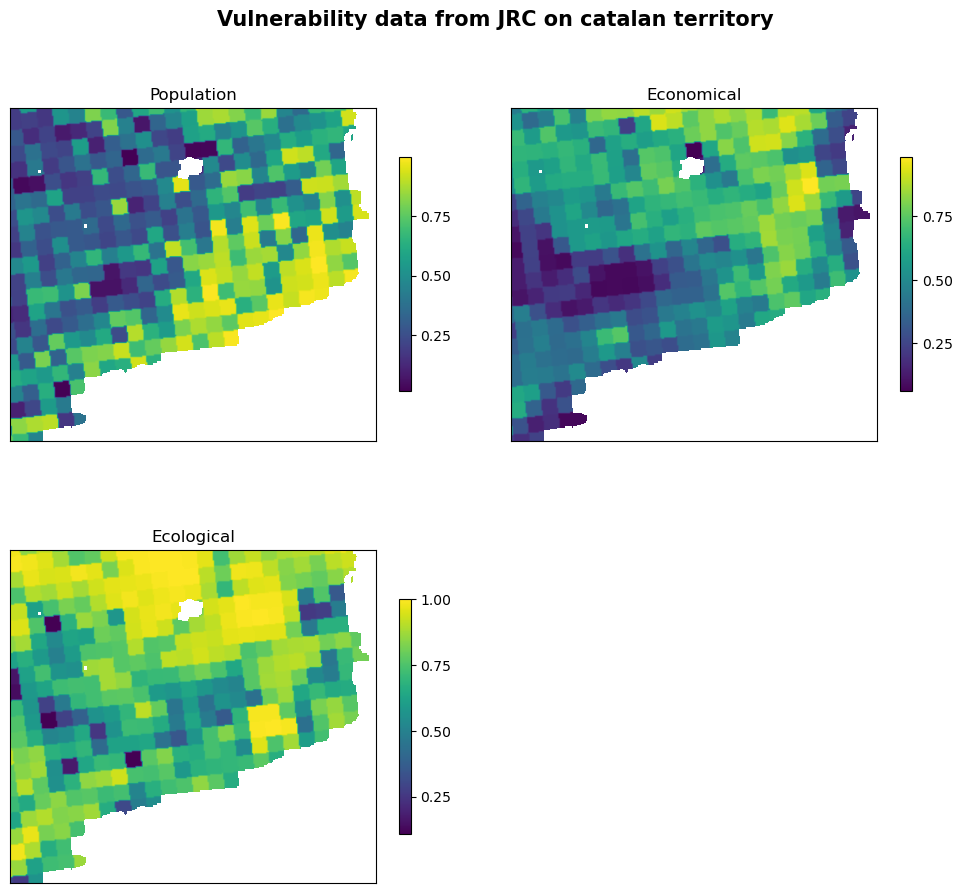

In [7]:
# Define paths to GeoTIFF files
vu_pop_clipped_path = './data_cat/Vul_data/catalan/var-vuln-pop_unit-dimensionless.tiff'
vu_econ_clipped_path = './data_cat/Vul_data/catalan/var-vuln-econ_unit-dimensionless.tiff'
vul_ecol_clipped_path = './data_cat/Vul_data/catalan/var-vuln-ecol_unit-dimensionless.tiff'
vul_ecol_clipped_econ_path = './data_cat/Vul_data/catalan/var-vuln-ecol-econ_unit-dimensionless.tiff'
vuls_data_clipped = [vu_pop_clipped_path, vu_econ_clipped_path, vul_ecol_clipped_path]#, vul_ecol_clipped_econ_path]

# Names of layers
names = ['Population', 'Economical', 'Ecological']#, 'Economical_Ecological'

# Visualizing data
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle(f'Vulnerability data from JRC on {name_area} territory', fontsize=15, fontweight='bold')
for vul_data_clipped, ax_, name in zip(vuls_data_clipped, ax.flatten(), names):
    with rasterio.open(vul_data_clipped) as src:
        rasterio.plot.show(src, ax=ax_, cmap='viridis')
        fig.colorbar(ax=ax_, shrink=0.5, ticks = [0, .25, .5, .75, 1],mappable=ax_.images[0])
        ax_.set_title(name)
        ax_.set_xticks([])
        ax_.set_yticks([])
plt.tight_layout()
ax[1,1].remove()
plt.show()

### Categorized vulnerability data 

- 1 _Based on its quantiles to 3 classes (low, medium, high)
- 2_ Based on thresholds

In [60]:
# Paths to the vulnerability data that are clipped
vul_ecol_arr = rasterio.open('./data_cat/Vul_data/catalan/var-vuln-ecol_unit-dimensionless.tiff').read(1)
vul_econ_arr = rasterio.open('./data_cat/Vul_data/catalan/var-vuln-econ_unit-dimensionless.tiff').read(1)
vul_pop_arr = rasterio.open('./data_cat/Vul_data/catalan/var-vuln-pop_unit-dimensionless.tiff').read(1)
vul_arrays = [vul_ecol_arr, vul_econ_arr, vul_pop_arr]

# Names of the vulnerability data layers
names = ['Ecological 3 class', 'Economical 3 class', 'Population 3 class']

dict_keys(['Ecological 3 class', 'Economical 3 class', 'Population 3 calss'])
[ 1.  2.  3. nan]


dict_keys(['Ecological 3 class', 'Economical 3 class', 'Population 3 calss'])
[ 1.  2.  3. nan]


#### Method 1: categorized based on quantiles

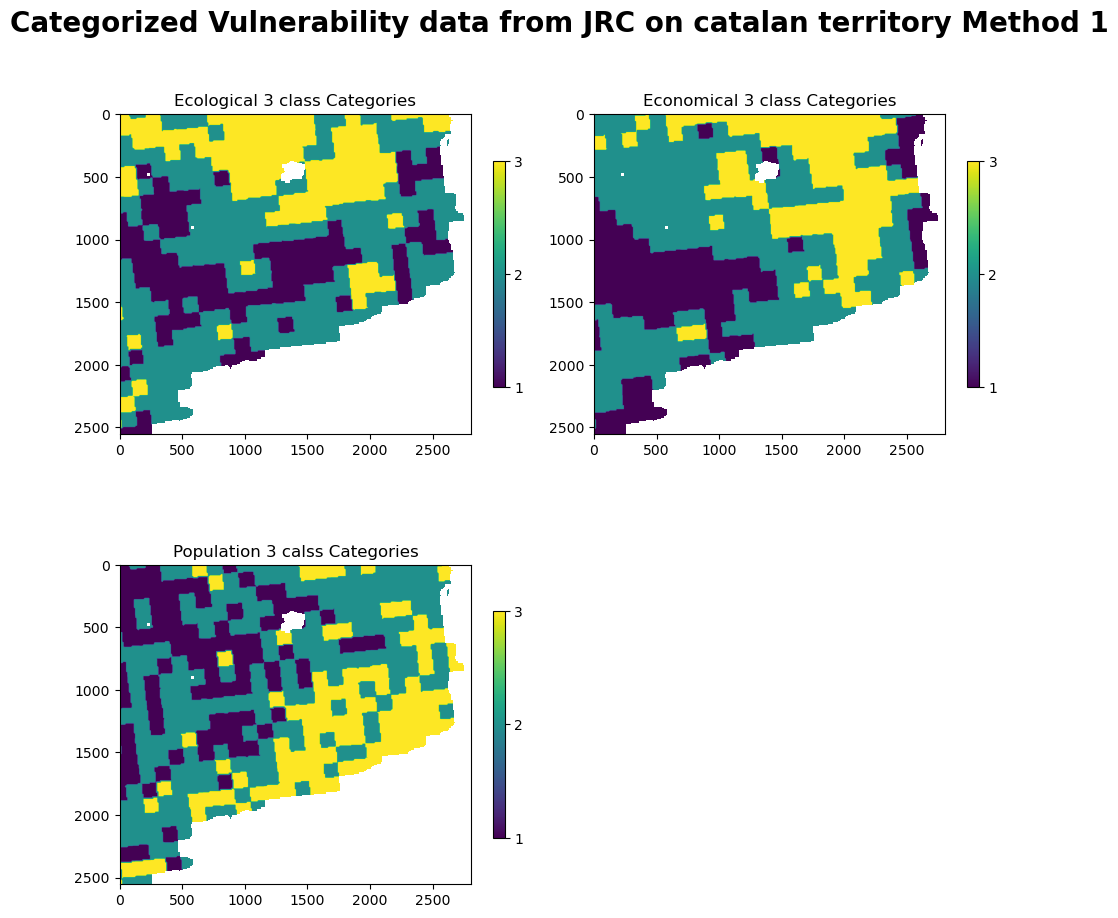

In [ ]:
dict_arr_vul_cat = {}
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle(f'Categorized Vulnerability data from JRC on {name_area} territory Method 1', fontsize=20, fontweight='bold')

# Categorizing based on quantiles: 0 nodata, 1 low, 2 meduim, 3 high
for vul_arr, name, ax_ in zip(vul_arrays, names, ax.flatten()):
    # Calculate quantiles
    q1, q2, q3 = np.quantile(vul_arr[vul_arr > 0.0], [.25, 0.5, 0.75])
    # Replace negative values with NaN
    vul_arr = np.where(vul_arr > 0, vul_arr, np.nan)
    # Categorize vulnerability values using fancy indexing
    vul_arr_cat = np.zeros_like(vul_arr)
    vul_arr_cat[vul_arr < q1] = 1
    vul_arr_cat[(vul_arr >= q1) & (vul_arr <= q3)] = 2
    vul_arr_cat[vul_arr > q3] = 3
    vul_arr_cat[vul_arr_cat == 0] = np.nan
    # visualize the categorized vulnerability data
    ax_.imshow(vul_arr_cat, cmap='viridis')
    ax_.set_title(f'{name} Categories')
    fig.colorbar(ax_.imshow(vul_arr_cat), ax=ax_, shrink=.5, ticks = [1, 2, 3])
    dict_arr_vul_cat[name] = vul_arr_cat

plt.tight_layout()
ax[1,1].remove()
print(dict_arr_vul_cat.keys())
print(np.unique(list(dict_arr_vul_cat.values())[0]))
plt.show()

#### Method 2: categorized based on threshold

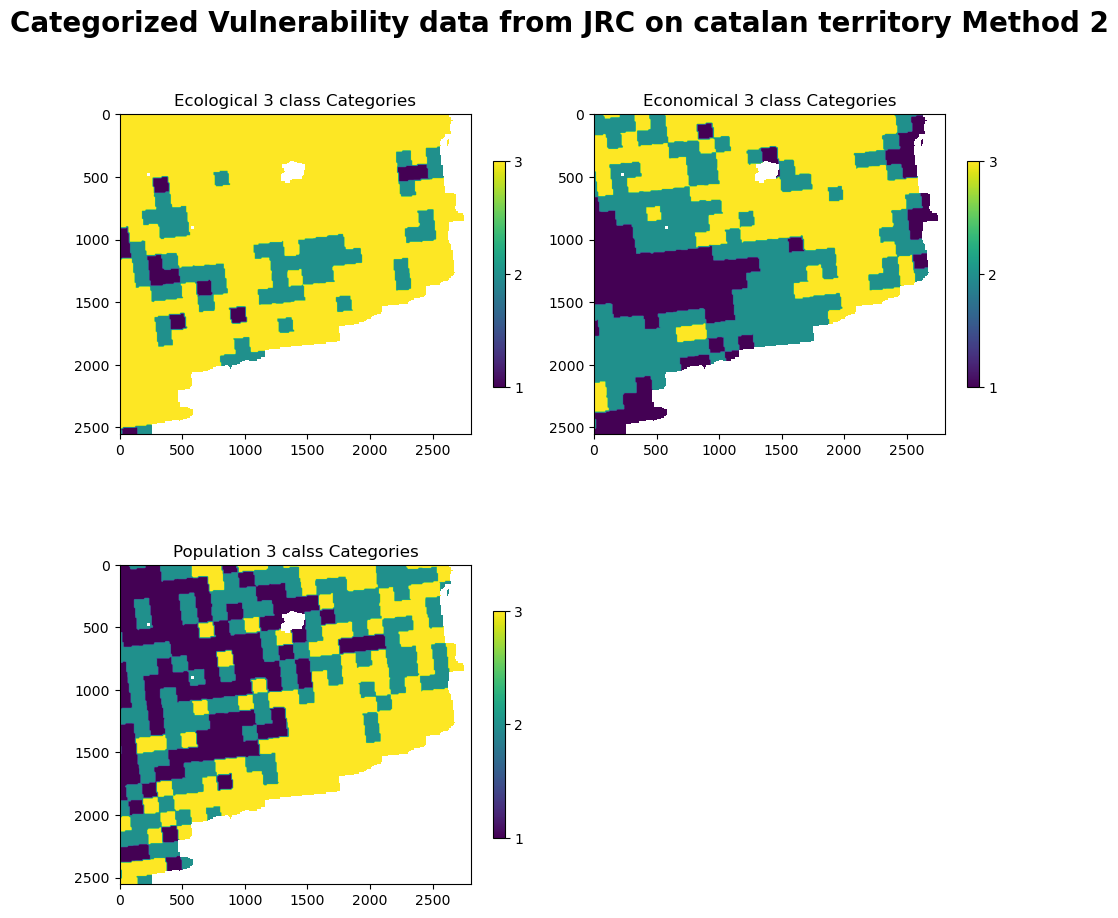

In [ ]:
dict_arr_vul_cat = {}
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle(f'Categorized Vulnerability data from JRC on {name_area} territory Method 2', fontsize=20, fontweight='bold')

# Categorizing based on thresholds >>> 0_30, 31_60, 61_100
for vul_arr, name, ax_ in zip(vul_arrays, names, ax.flatten()):
    # Replace negative values with NaN
    vul_arr = np.where(vul_arr > 0, vul_arr, np.nan)
    # Categorize vulnerability values using fancy indexing
    vul_arr_cat = np.zeros_like(vul_arr)
    vul_arr_cat[vul_arr < 0.30] = 1
    vul_arr_cat[(vul_arr >= 0.30) & (vul_arr <= 60)] = 2
    vul_arr_cat[vul_arr > 0.60] = 3
    vul_arr_cat[vul_arr_cat == 0] = np.nan
    # visualize the categorized vulnerability data
    ax_.imshow(vul_arr_cat, cmap='viridis')
    ax_.set_title(f'{name} Categories')
    fig.colorbar(ax_.imshow(vul_arr_cat), ax=ax_, shrink=.5, ticks = [1, 2, 3])
    dict_arr_vul_cat[name] = vul_arr_cat

plt.tight_layout()
ax[1,1].remove()
print(dict_arr_vul_cat.keys())
print(np.unique(list(dict_arr_vul_cat.values())[0]))
plt.show()

### Check elements at risk in the area of interest

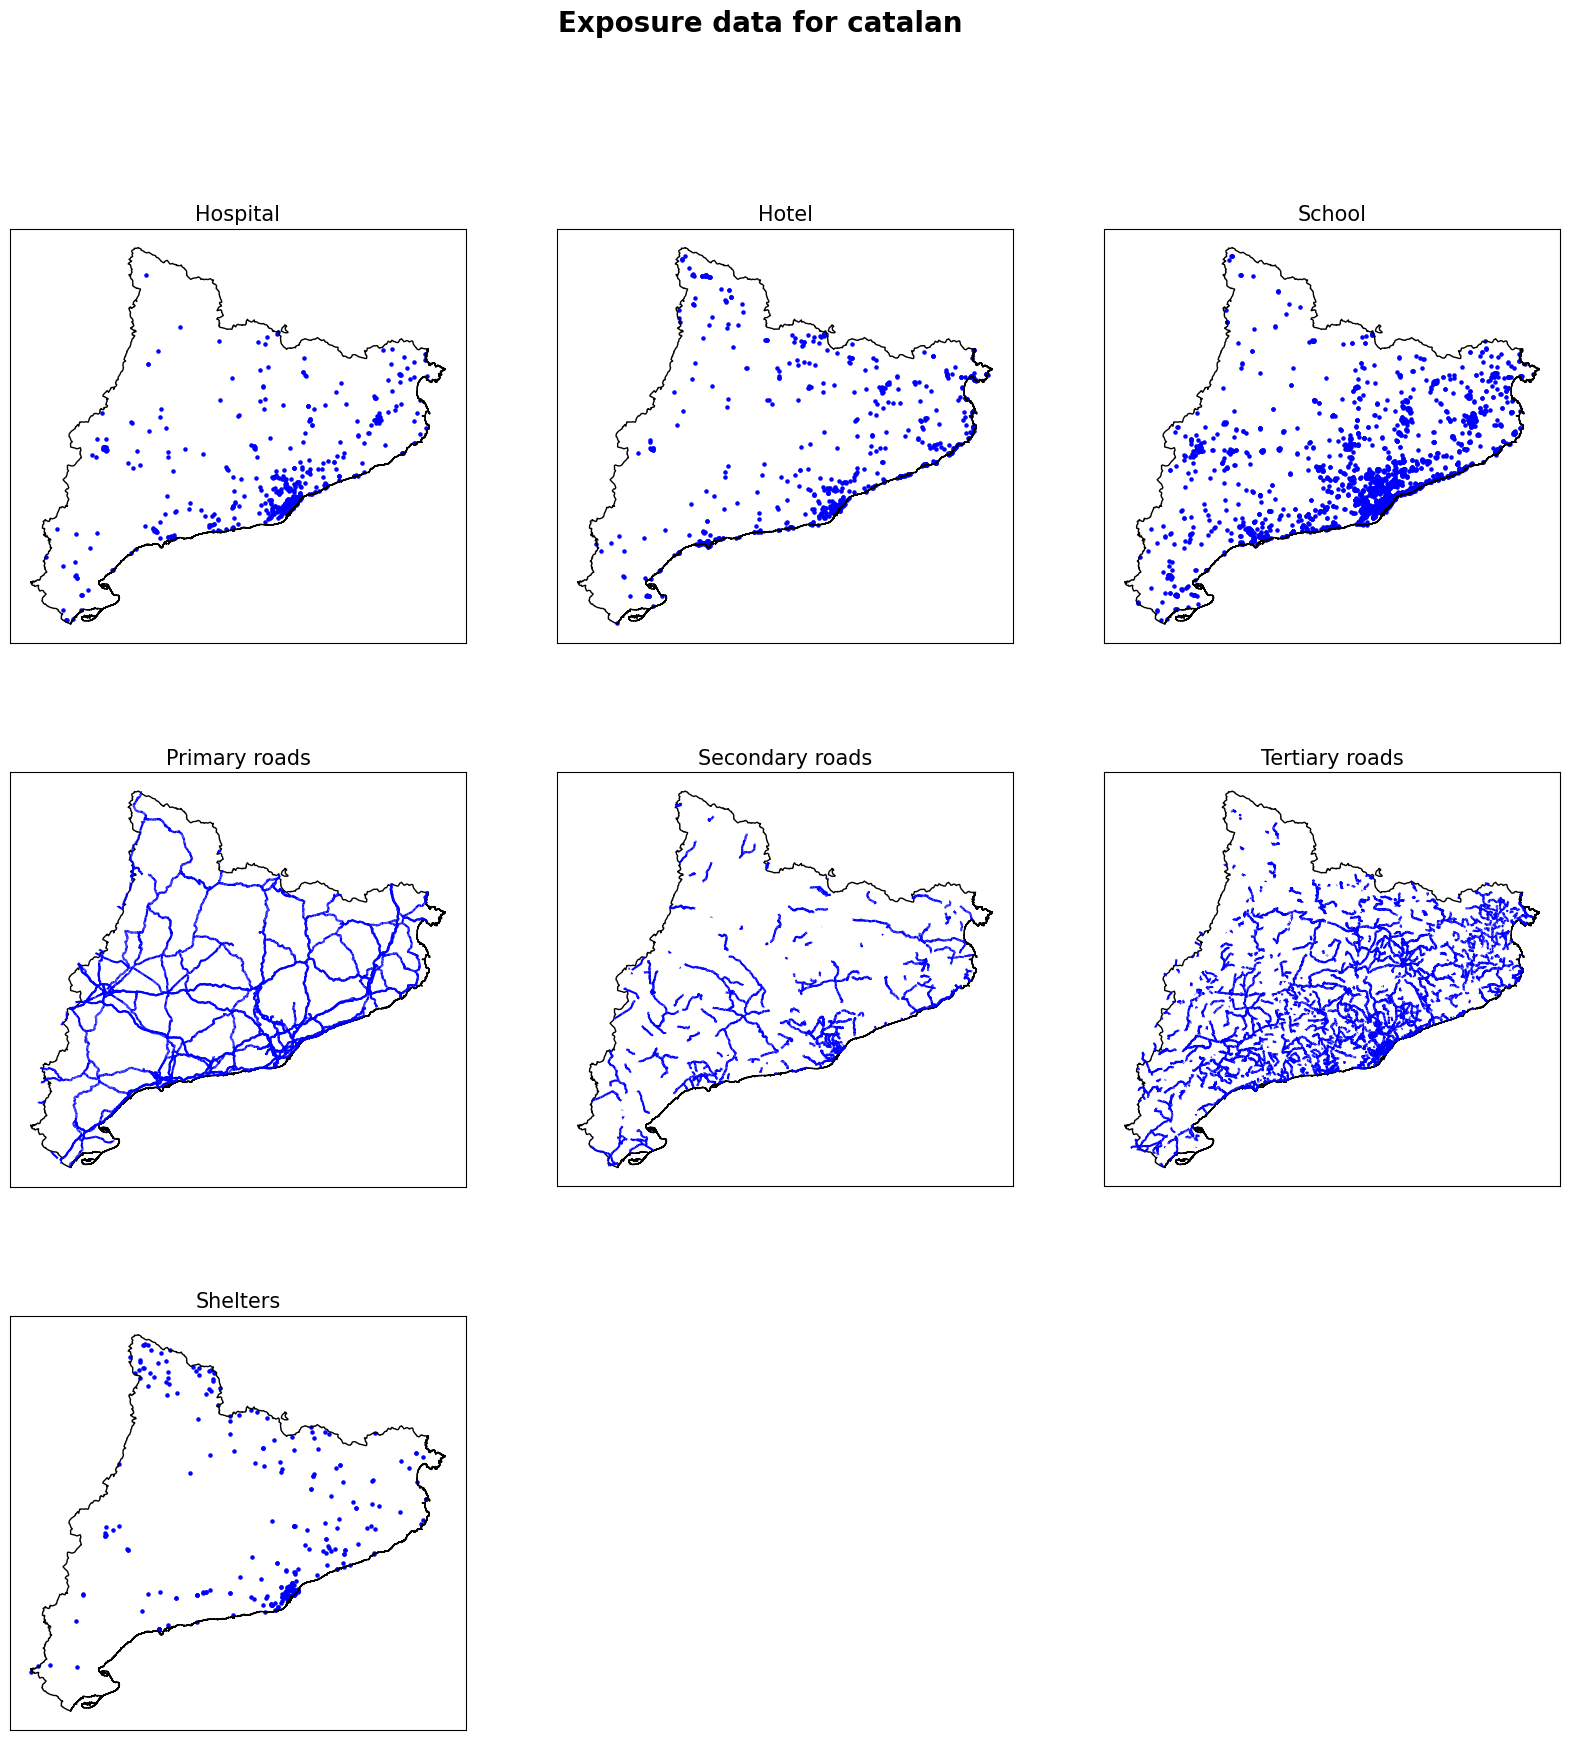

In [9]:
# Paths of elemets at risk data(shapefiles)
ex_hospital = gpd.read_file('./data_cat/risk/hostpitals.shp') # mispell hospital
ex_hotel = gpd.read_file('./data_cat/risk/hotels.shp')
ex_school = gpd.read_file('./data_cat/risk/schools.shp')
ex_primary_roads = gpd.read_file('./data_cat/risk/primary_roads.shp')
ex_secondary_roads = gpd.read_file('./data_cat/risk/secondary_roads.shp')
ex_tertiary_roads = gpd.read_file('./data_cat/risk/tertiary_roads.shp')
ex_shelters = gpd.read_file('./data_cat/risk/shelters.shp')

# Shapefile of interested area (catalonia)
catalan_borders = gpd.read_file('./data_cat/adm_level_stanford/catalonia_adm_3035.shp')
name_area = 'catalan'
# Names of the exposure data layers
names = ['Hospital', 'Hotel', 'School', 'Primary roads', 'Secondary roads', 'Tertiary roads', 'Shelters']
list_exp = [ex_hospital, ex_hotel, ex_school, ex_primary_roads, ex_secondary_roads, ex_tertiary_roads, ex_shelters]

# lets see all vector layers in one plot
fig, ax = plt.subplots(3,3, figsize=(20, 20))
fig.suptitle('Exposure data for catalan', fontsize=20, fontweight='bold')
for ax_, exp_vector, name in zip(ax.flatten(), list_exp, names):
    exp_vector.plot(ax=ax_, color='blue', label=name, markersize=5)
    catalan_borders.plot(ax=ax_, facecolor='none' ,edgecolor='black', label=name_area)
    ax_.set_title(name, fontsize=15)
    ax_.set_xticks([])
    ax_.set_yticks([])
ax[2,1].remove()
ax[2,2].remove()

### Rasterizing and Visualization of exposure data

Save all in a dictionary.

Shape of the reference raster: (2554, 2810)
Transform of the reference raster: | 100.00, 0.00, 3488731.36|
| 0.00,-100.00, 2241986.65|
| 0.00, 0.00, 1.00|
Features.rasterize is launched...
Features.rasterize is done...
Shape of the reference raster: (2554, 2810)
Transform of the reference raster: | 100.00, 0.00, 3488731.36|
| 0.00,-100.00, 2241986.65|
| 0.00, 0.00, 1.00|
Features.rasterize is launched...
Features.rasterize is done...
Shape of the reference raster: (2554, 2810)
Transform of the reference raster: | 100.00, 0.00, 3488731.36|
| 0.00,-100.00, 2241986.65|
| 0.00, 0.00, 1.00|
Features.rasterize is launched...
Features.rasterize is done...
Shape of the reference raster: (2554, 2810)
Transform of the reference raster: | 100.00, 0.00, 3488731.36|
| 0.00,-100.00, 2241986.65|
| 0.00, 0.00, 1.00|
Features.rasterize is launched...
Features.rasterize is done...
Shape of the reference raster: (2554, 2810)
Transform of the reference raster: | 100.00, 0.00, 3488731.36|
| 0.00,-100.00, 2

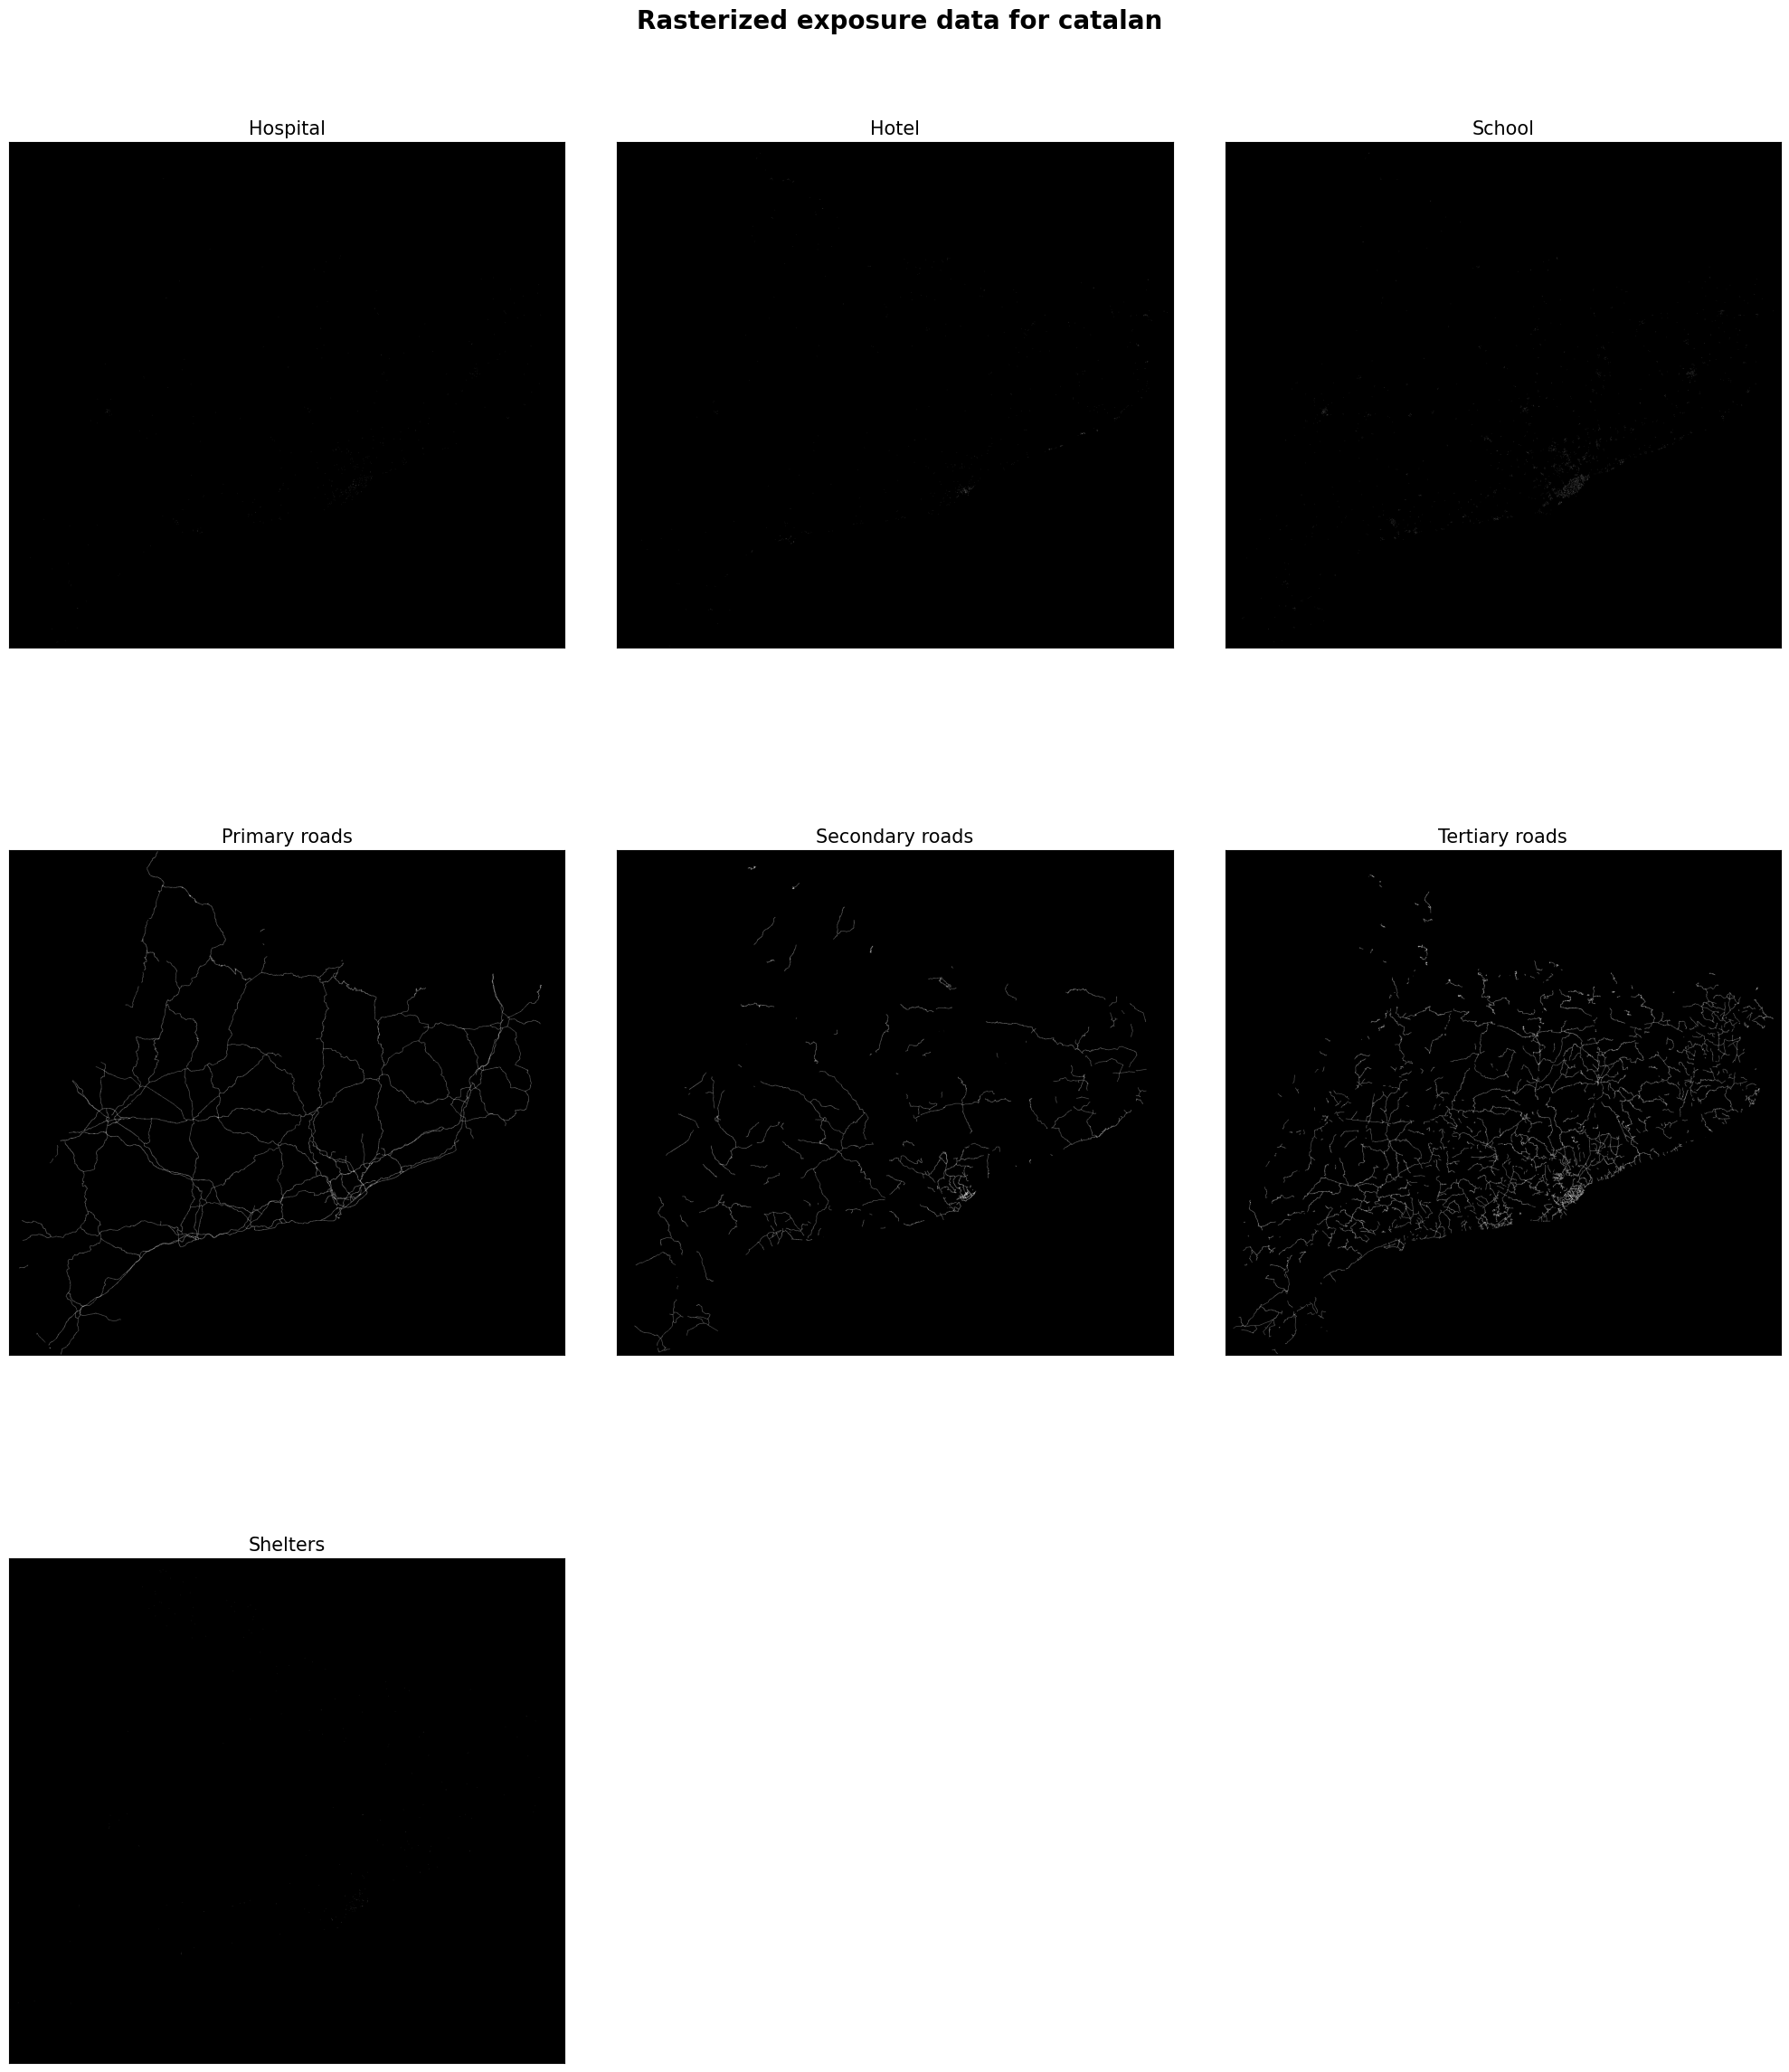

In [10]:
# names of the exposure data layers
names = ['Hospital', 'Hotel', 'School', 'Primary roads', 'Secondary roads', 'Tertiary roads', 'Shelters']
list_exp = [ex_hospital, ex_hotel, ex_school, ex_primary_roads, ex_secondary_roads, ex_tertiary_roads, ex_shelters]

# Dictionary to store rasterized exposure data
dict_rasterized_exposure = {}

# Path DEM as reference
DEM_path = './data_cat/hazard/input_hazard/dem_3035_clip.tif'

for exp, name in zip(list_exp, names):
    rasterized_exp_arr = rasterize_numerical_feature(exp, DEM_path)
    dict_rasterized_exposure[name] = rasterized_exp_arr

# Visualizing the rasterized exposure data
fig, ax = plt.subplots(3,3, figsize=(20, 25))
fig.suptitle(f'Rasterized exposure data for {name_area}', fontsize=20, fontweight='bold')

for ax_, (name, exp_arr) in zip(ax.flatten(), dict_rasterized_exposure.items()):
    ax_.imshow(exp_arr, cmap='gist_gray')
    ax_.set_title(name, fontsize=15)
    ax_.set_xticks([])
    ax_.set_yticks([])
    ax_.title.set_text(name)
plt.tight_layout()
ax[2,1].remove()
ax[2,2].remove()

Run the following cell if saving the exposure data (rasters) is needed.

In [11]:
os.makedirs('./data_cat/risk/rasterrized_exposure', exist_ok=True)
for name, exp_arr in dict_rasterized_exposure.items():
    save_raster_as(exp_arr, f'./data_cat/risk/rasterrized_exposure/{name}_rasterized.tif', DEM_path, dtype='int32', count=1)

## Methodologies to calculate Risk

    Risk = Hazard * Vulnerabilty (categorized)
    Risk = Hazard * Exposure (categorized roads) with assigning a matrix of damage


    Risk matrix:
                                        hazard:
                                   1  2  3  4  5  6
                                1 [1, 1, 1, 2, 3, 4],
            damage/vul level:   2 [1, 1, 2, 3, 4, 4],
                                3 [1, 2, 3, 4, 4, 4],

Contingency table that is going to be used to define Risk Maps:

![image.png](images/contingency_table.png), ![image-2.png](images/risk_scale.png)

## Risk Method 1 

In [12]:
# Check the vulnerability data
print(dict_arr_vul_cat.keys())

# Paths of hazards(present and future) which are our inputs to calculate Risk Maps
output_hazard_present = "./data_cat/hazard/Hazard_output/my_hazard_present.tif"
output_hazard_4p5_2021_2040 = "./data_cat/hazard/Hazard_output/my_hazard_4p5_2021_2040.tif"
output_hazard_4p5_2041_2060 = "./data_cat/hazard/Hazard_output/my_hazard_4p5_2041_2060.tif"
output_hazard_8p5_2021_2040 = "./data_cat/hazard/Hazard_output/my_hazard_8p5_2021_2040.tif"
output_hazard_8p5_2041_2060 = "./data_cat/hazard/Hazard_output/my_hazard_8p5_2041_2060.tif"

# Arrays of hazards (present and future)
hazard_arr_present = rasterio.open(output_hazard_present).read(1)
hazard_arr_future_4p5_2021_2040 = rasterio.open(output_hazard_4p5_2021_2040).read(1)
hazrad_arr_future_4p5_2040_2060 = rasterio.open(output_hazard_4p5_2041_2060).read(1)
hazard_arr_future_8p5_2021_2040 = rasterio.open(output_hazard_8p5_2021_2040).read(1)
hazrad_arr_future_8p5_2040_2060 = rasterio.open(output_hazard_8p5_2041_2060).read(1)

dict_keys(['Ecological 3 class', 'Economical 3 class', 'Population 3 calss'])


Risk with considering population vulnerability and hazard:

In [ ]:
# Define a matrix of risk
matrix_risk_1 = np.array([[1, 1, 1, 2, 3, 4],
                          [1, 1, 2, 3, 4, 4],
                          [1, 2, 3, 4, 4, 4]])

# Risk maps present
Risk_pop_present = contigency_matrix_on_array(dict_arr_vul_cat['Population 3 calss'], hazard_arr_present, matrix_risk_1, np.nan, 0)
Risk_econ_present = contigency_matrix_on_array(dict_arr_vul_cat['Economical 3 class'], hazard_arr_present, matrix_risk_1, 0, 0)

# Risk maps RCP45
Risk_pop_future_4p5_2021_2040 = contigency_matrix_on_array(dict_arr_vul_cat['Population 3 calss'], hazard_arr_future_4p5_2021_2040, matrix_risk_1, np.nan, 0)
Risk_pop_future_4p5_2041_2060 = contigency_matrix_on_array(dict_arr_vul_cat['Population 3 calss'], hazrad_arr_future_4p5_2040_2060, matrix_risk_1, np.nan, 0)
Risk_econ_future_4p5_2021_2040 = contigency_matrix_on_array(dict_arr_vul_cat['Economical 3 class'], hazard_arr_future_4p5_2021_2040, matrix_risk_1, 0, 0)
Risk_econ_future_4p5_2041_2060 = contigency_matrix_on_array(dict_arr_vul_cat['Economical 3 class'], hazrad_arr_future_4p5_2040_2060, matrix_risk_1, 0, 0)

# Risk maps RCP85
Risk_pop_future_8p5_2021_2040 = contigency_matrix_on_array(dict_arr_vul_cat['Population 3 calss'], hazard_arr_future_8p5_2021_2040, matrix_risk_1, np.nan, 0)
Risk_pop_future_8p5_2041_2060 = contigency_matrix_on_array(dict_arr_vul_cat['Population 3 calss'], hazrad_arr_future_8p5_2040_2060, matrix_risk_1, np.nan, 0)
Risk_econ_future_8p5_2021_2040 = contigency_matrix_on_array(dict_arr_vul_cat['Economical 3 class'], hazard_arr_future_8p5_2021_2040, matrix_risk_1, 0, 0)
Risk_econ_future_8p5_2041_2060 = contigency_matrix_on_array(dict_arr_vul_cat['Economical 3 class'], hazrad_arr_future_8p5_2040_2060, matrix_risk_1, 0, 0)


### Visualization of Risk maps

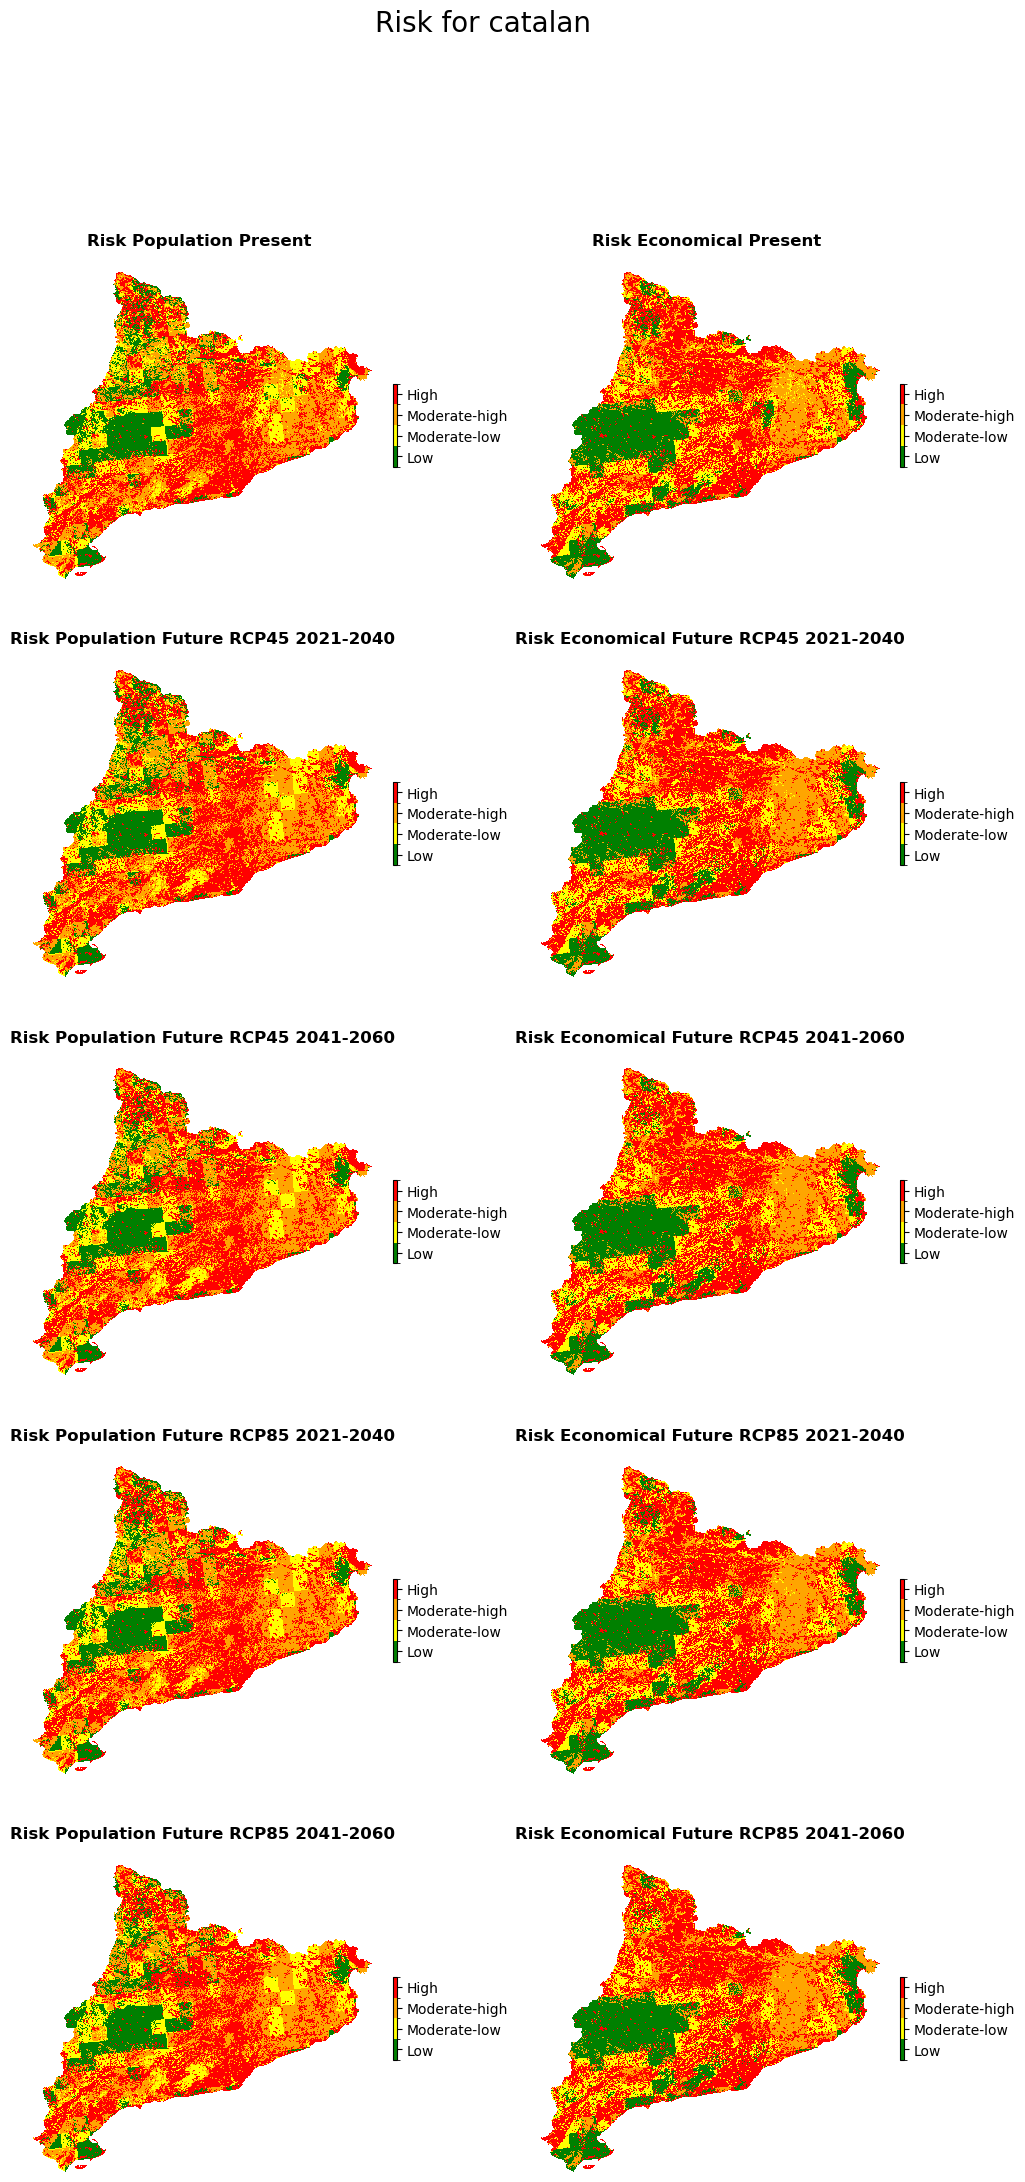

In [24]:
# List of Risk arrays and their names
Risk_arrs = [Risk_pop_present, Risk_econ_present,
            Risk_pop_future_4p5_2021_2040, Risk_econ_future_4p5_2021_2040, Risk_pop_future_4p5_2041_2060, Risk_econ_future_4p5_2041_2060,
            Risk_pop_future_8p5_2021_2040, Risk_econ_future_8p5_2021_2040, Risk_pop_future_8p5_2041_2060, Risk_econ_future_8p5_2041_2060]
names_risk = ['Population Present ', 'Economical Present ',
         'Population Future RCP45 2021-2040', 'Economical Future RCP45 2021-2040', 'Population Future RCP45 2041-2060', 'Economical Future RCP45 2041-2060',
         'Population Future RCP85 2021-2040', 'Economical Future RCP85 2021-2040', 'Population Future RCP85 2041-2060', 'Economical Future RCP85 2041-2060']

fig, ax = plt.subplots(5, 2, figsize=(12, 25))
fig.suptitle(f'Risk for {name_area}', fontsize=20)

# Open a reference raster
ref = rasterio.open(DEM_path).read(1)
for ax_, risk_arr, name in zip(ax.flatten(), Risk_arrs, names_risk):
    plot_raster_V2(risk_arr, ref, add_to_ax =(fig, ax_), title = f'Risk {name}',
                   shrink_legend = 0.25,
                    array_classes = [0, 1.1, 2.1, 3.1, 4.1],
                    classes_colors = ['green', 'yellow', 'orange', 'red'],
                    classes_names = ['Low', 'Moderate-low', 'Moderate-high', 'High'])

Run the following cell if you want to save the risk maps:

In [25]:
for risk_map, name_ in zip(Risk_arrs,names_risk) :
    os.makedirs('./data_cat/risk_maps', exist_ok=True)
    risk_map_clean = np.where(ref == -9999, np.NaN, risk_map)
    save_raster_as(risk_map_clean, f'./data_cat/risk_maps/Risk_{name_}.tif', DEM_path, novalue = np.NaN)

### Risk at municipality level using NUTS

Get the NUTS level of interested area from the shapefile NUTS:

<Axes: >

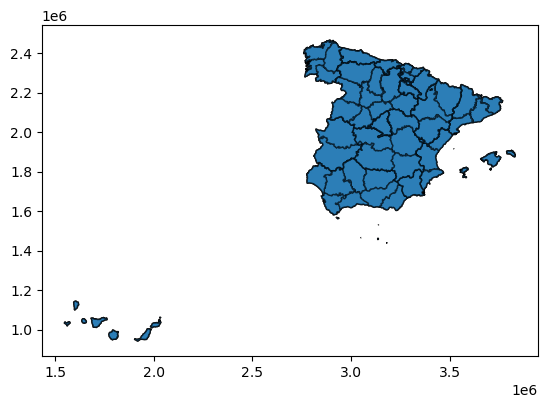

In [103]:
# Path NUTS shapefile
path_to_nuts_eu = './data_cat/administrative_units_NUTS/NUTS_RG_01M_2021_3035.shp'

# Read the shapefile
nuts_eu = gpd.read_file(path_to_nuts_eu)

# Alpha-2 code of the country of area of interest
CNTR_CODE= 'ES'

# Plot the NUTS level of the area of interest
country_administrative_3 = nuts_eu[nuts_eu['CNTR_CODE'] == CNTR_CODE]
country_administrative_3.plot(alpha=0.5, edgecolor='black')

In [111]:
# Extract catalan regions
NUTS_ID = ['ES511', 'ES512', 'ES513', 'ES514']
catalan_administrative_3 = nuts_eu[nuts_eu['NUTS_ID'].isin(NUTS_ID)]

### Aggregate the Risk at NUTS2 level

Function to calculate zonal statistics:

In [ ]:
def zonal_statistics(gdf: gpd.GeoDataFrame, raster_file: str, name_col: str, mode = 'mean', weights: dict = None):
    for idx in list(gdf.index):
        # print(idx)
        with rasterio.open(raster_file) as raster:
            geom = gpd.GeoSeries(gdf.loc[idx].geometry, name = 'geometry')
            try:
                adm, _= mask(raster, geom, crop = True, nodata = np.NaN)
            except TypeError:
                adm, _= mask(raster, geom, crop = True, nodata = 0)
                adm = adm.astype(int)
                adm = np.where(adm == 0, np.NaN, adm)
            if mode == 'mean':
                result = np.nanmean(adm)
            elif mode == 'most_frequent':
                try:
                    result = np.argmax(np.bincount(adm[~np.isnan(adm)].astype(int)))
                except ValueError: # empty sequence
                    result = np.NaN
            elif mode == 'sum':
                result = np.nansum(adm)
            elif mode == 'max':
                result = np.nanmax(adm)
            elif mode == 'min':
                result = np.nanmin(adm)
            elif mode == 'q1':
                result = np.nanquantile(adm, 0.25)
            elif mode == 'q3':
                result = np.nanquantile(adm, 0.75)
            elif mode == 'weighted_mean':
                classes = weights.keys()
                weight = list(weights.values())
                num_pixels = np.nansum(np.where(np.isin(adm, list(classes)), 1, 0)) # count all the pixels excluding the one not in interested classes (no data)
                percentage_classes = list()
                for _class in classes:
                    percentage_class = (np.where(adm == _class, 1, 0).sum() / num_pixels) * 100
                    percentage_classes.append(percentage_class)
                terms = [perc_class * weight for perc_class, weight in zip(percentage_classes, weight)]
                result = sum(terms)
                print(f'percentage sum: {percentage_classes}, weight sum: {weight}, result: {result}')
            else:
                raise ValueError(f'mode {mode} not recognized')

            gdf.loc[idx, name_col] = result
    return gdf

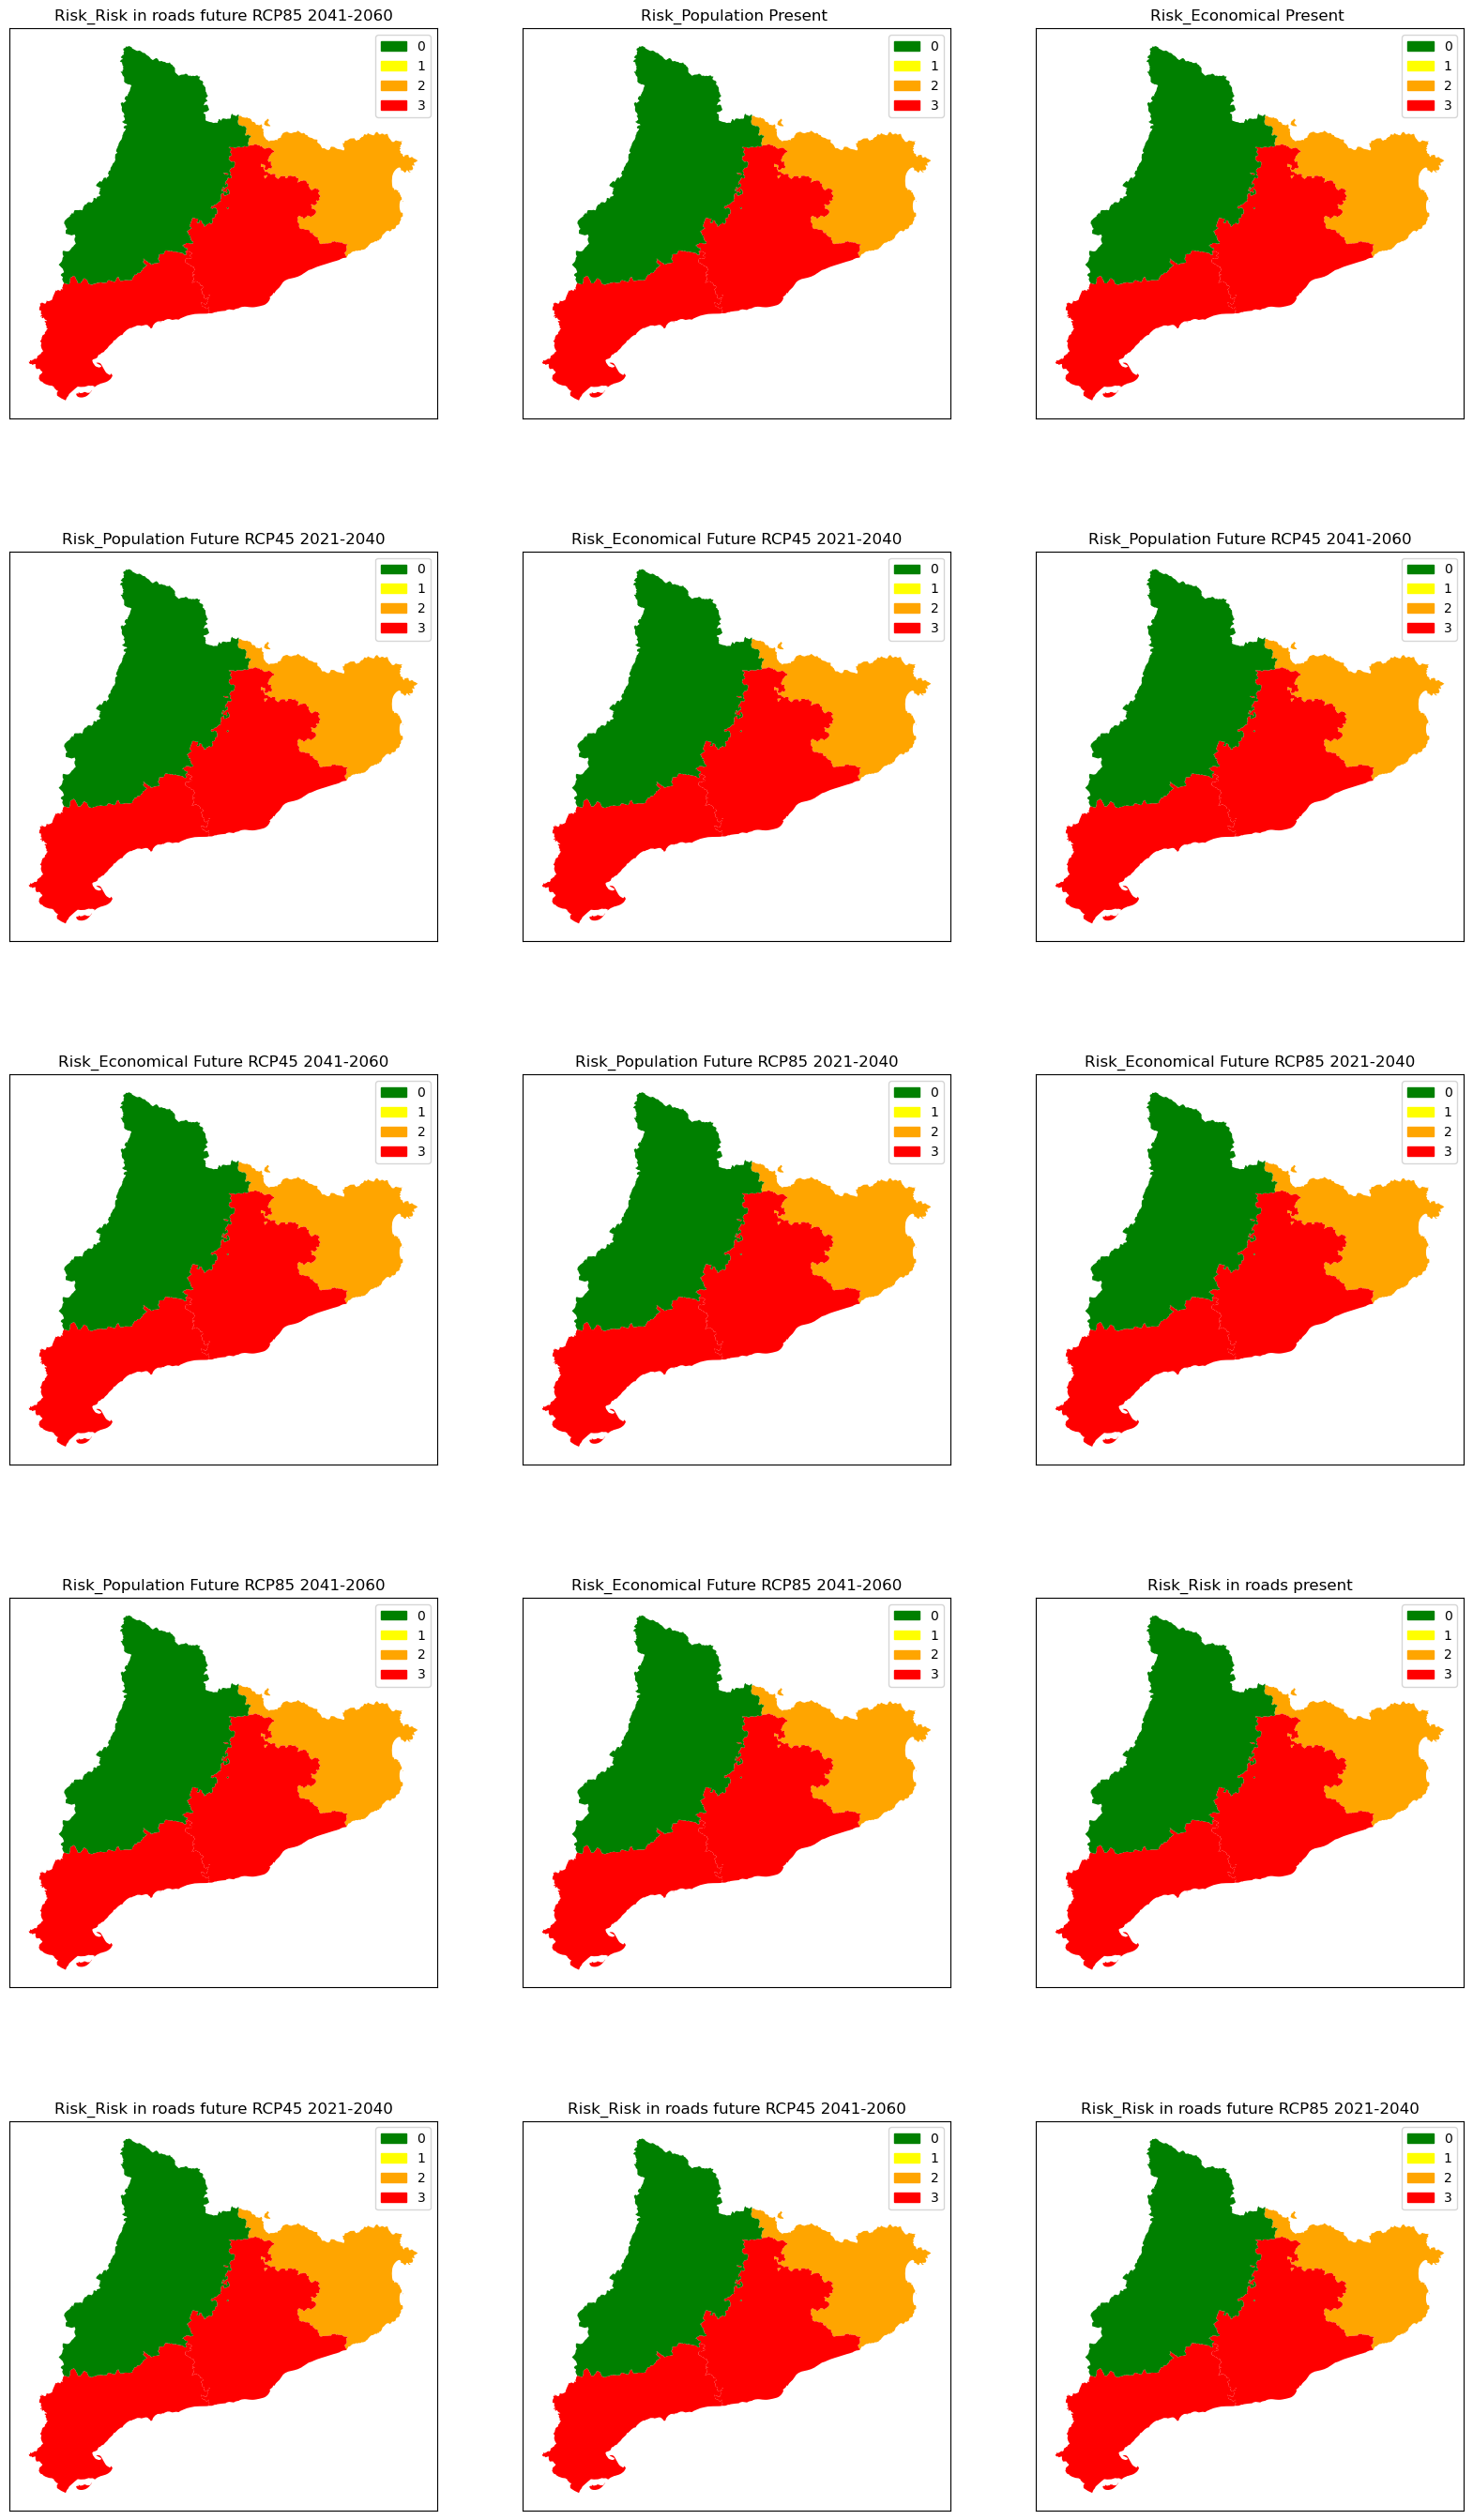

In [140]:
# Create a legend for the risk maps
classes_colors = ['green', 'yellow', 'orange', 'red']
array_classes = [0, 1, 2, 3, 4]
cmap = colors.ListedColormap(classes_colors)
norm = colors.BoundaryNorm(array_classes, cmap.N)

# Calculate zonal statistics for the catalan regions for all Risks
Risks_lists = glob.glob('./data_cat/risk_maps/Risk*.tif')
fig, ax = plt.subplots(5, 3, figsize=(20, 35))
for riskmap, ax_ in zip(Risks_lists, ax.flatten()):
    name_map = riskmap.split('/')[-1].split('.')[0]
    gdf = zonal_statistics(catalan_administrative_3, raster_file = './data_cat/risk_maps/Risk_Population Present .tif', name_col = 'Risk', mode = 'most_frequent')
    gdf.plot(ax =ax_, column='Risk', figsize=(10, 10), cmap=cmap)
    ax_.set_title(name_map)
    ax_.set_xticks([])
    ax_.set_yticks([])
    ax_.legend(handles = [Patch(color=color, label=label) for color, label in zip(classes_colors, array_classes)])

## Risk Method 2

### First creating a Road classed raster

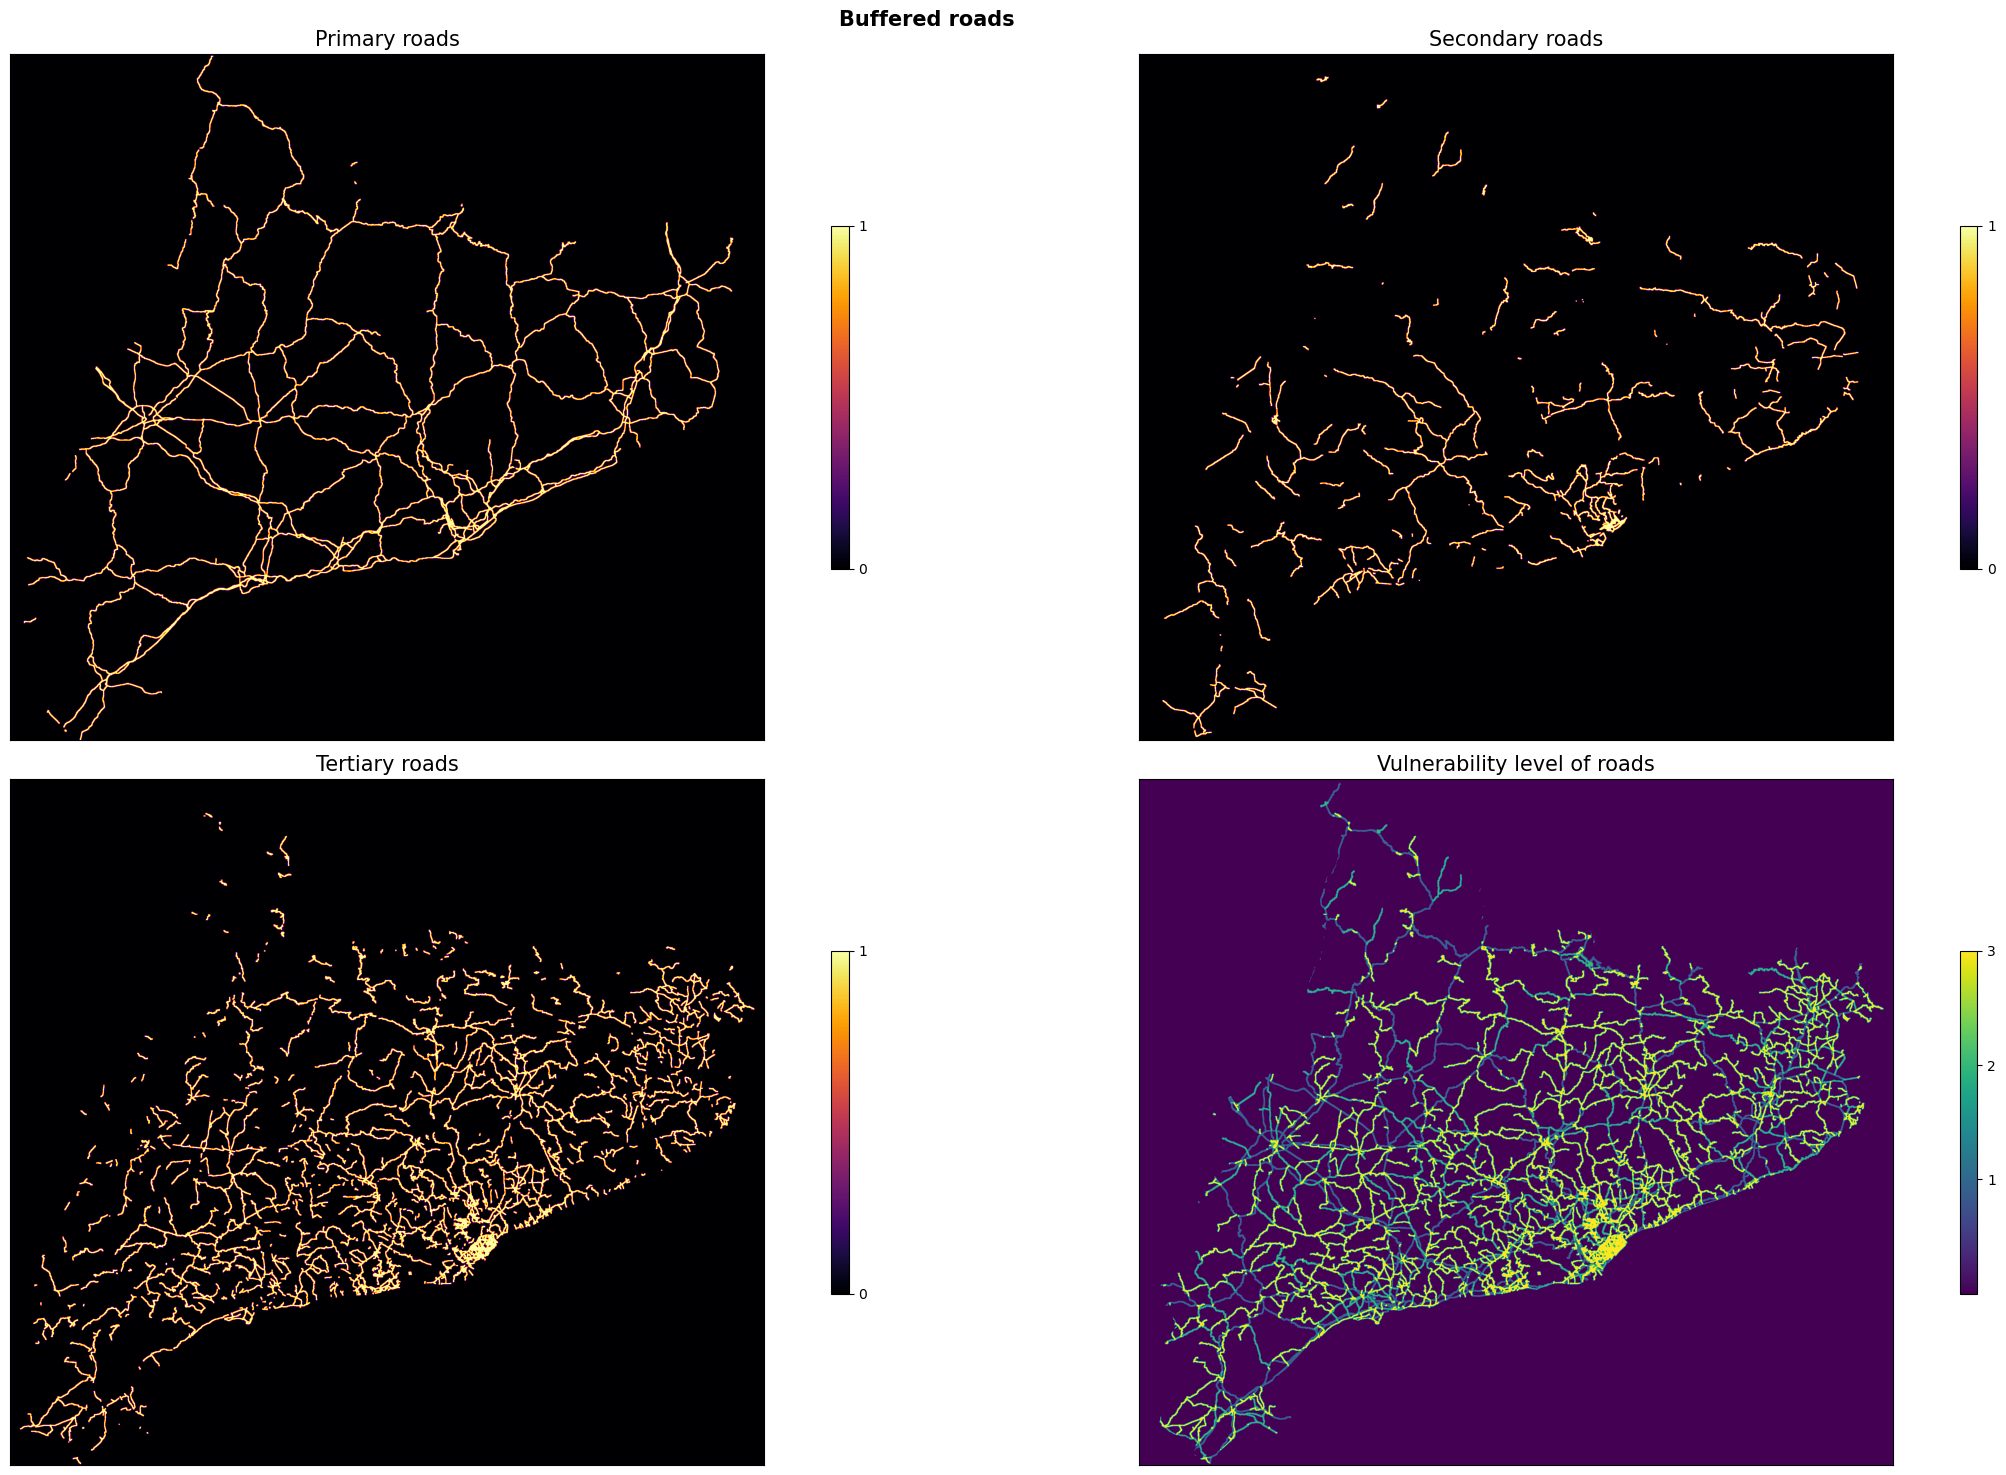

In [141]:
# Buffer the roads
buffered_primary_roads = buffer(dict_rasterized_exposure['Primary roads'], pixel_radius=2)
buffered_secondary_roads = buffer(dict_rasterized_exposure['Secondary roads'], pixel_radius=2)
buffered_tertiary_roads = buffer(dict_rasterized_exposure['Tertiary roads'], pixel_radius=2)

# Each road class has a level of vulnerability low 1     medium 2     high 3, respectively Primary roads, Secondary roads, Tertiary roads
roads_vul_arr = np.zeros_like(buffered_primary_roads)
roads_vul_arr = roads_vul_arr.astype(np.float32)
roads_vul_arr[buffered_primary_roads == 1] = 1
roads_vul_arr[buffered_secondary_roads == 1] = 2
roads_vul_arr[buffered_tertiary_roads == 1] = 3

roads_vul_arr[ref == -9999] = np.NaN

# Visualization of the buffered roads
fig, ax = plt.subplots(2, 2, figsize=(25, 15))
fig.suptitle('Buffered roads', fontsize=15, fontweight='bold')
buffered_roads_arr = [buffered_primary_roads, buffered_secondary_roads, buffered_tertiary_roads, roads_vul_arr]
names = ['Primary roads', 'Secondary roads', 'Tertiary roads', 'Vulnerability level of roads']

for index, (ax_, buffered_arr, name) in enumerate(zip(ax.flatten(), buffered_roads_arr, names)):
    if index != 3:
        ax_.imshow(buffered_arr, cmap='inferno')
        plt.colorbar(ax_.imshow(buffered_arr, cmap='inferno'), ax=ax_, shrink=0.5, ticks=[0,1])
    else:
        ax_.imshow(buffered_arr, cmap='viridis', vmin=0)
        plt.colorbar(ax_.imshow(buffered_arr, cmap='viridis'), ax=ax_, shrink=0.5, ticks=[1, 2, 3])
        image_no_nan = np.nan_to_num(buffered_arr, 0)
        ax_.imshow(buffered_arr, cmap='viridis', vmin=0)
    ax_.set_title(name, fontsize = 15)
    ax_.set_xticks([])
    ax_.set_yticks([])
plt.tight_layout()
plt.show()

### Calculate Risk in Roads

In [142]:
#             hazard :>>>> 1  2  3  4  5  6
matrix_risk_2 = np.array([[1, 1, 1, 2, 3, 4],  # 1
                          [1, 1, 2, 3, 4, 4],  # 2  damage/vul level
                          [1, 2, 3, 4, 4, 4]]) # 3

# Arrays of hazards(present and future) that are inputs in Risk caculation
hazard_arr_present = rasterio.open(output_hazard_present).read(1)
hazard_arr_future_4p5_2021_2040 = rasterio.open(output_hazard_4p5_2021_2040).read(1)
hazrad_arr_future_4p5_2040_2060 = rasterio.open(output_hazard_4p5_2041_2060).read(1)
hazard_arr_future_8p5_2021_2040 = rasterio.open(output_hazard_8p5_2021_2040).read(1)
hazrad_arr_future_8p5_2040_2060 = rasterio.open(output_hazard_8p5_2041_2060).read(1)

# Risk in roads(present and future)
Risk_road_present_Roads = contigency_matrix_on_array(roads_vul_arr, hazard_arr_present, matrix_risk_2, 0, 0)
Risk_road_future_4p5_2021_2040 = contigency_matrix_on_array(roads_vul_arr, hazard_arr_future_4p5_2021_2040, matrix_risk_2,0, 0)
Risk_road_future_4p5_2041_2060 = contigency_matrix_on_array(roads_vul_arr, hazrad_arr_future_4p5_2040_2060, matrix_risk_2, 0, 0)
Risk_road_future_8p5_2021_2040 = contigency_matrix_on_array(roads_vul_arr, hazard_arr_future_8p5_2021_2040, matrix_risk_2, 0, 0)
Risk_road_future_8p5_2041_2060 = contigency_matrix_on_array(roads_vul_arr, hazrad_arr_future_8p5_2040_2060, matrix_risk_2, 0, 0)

### Visulization of Risk maps 2 (roads)

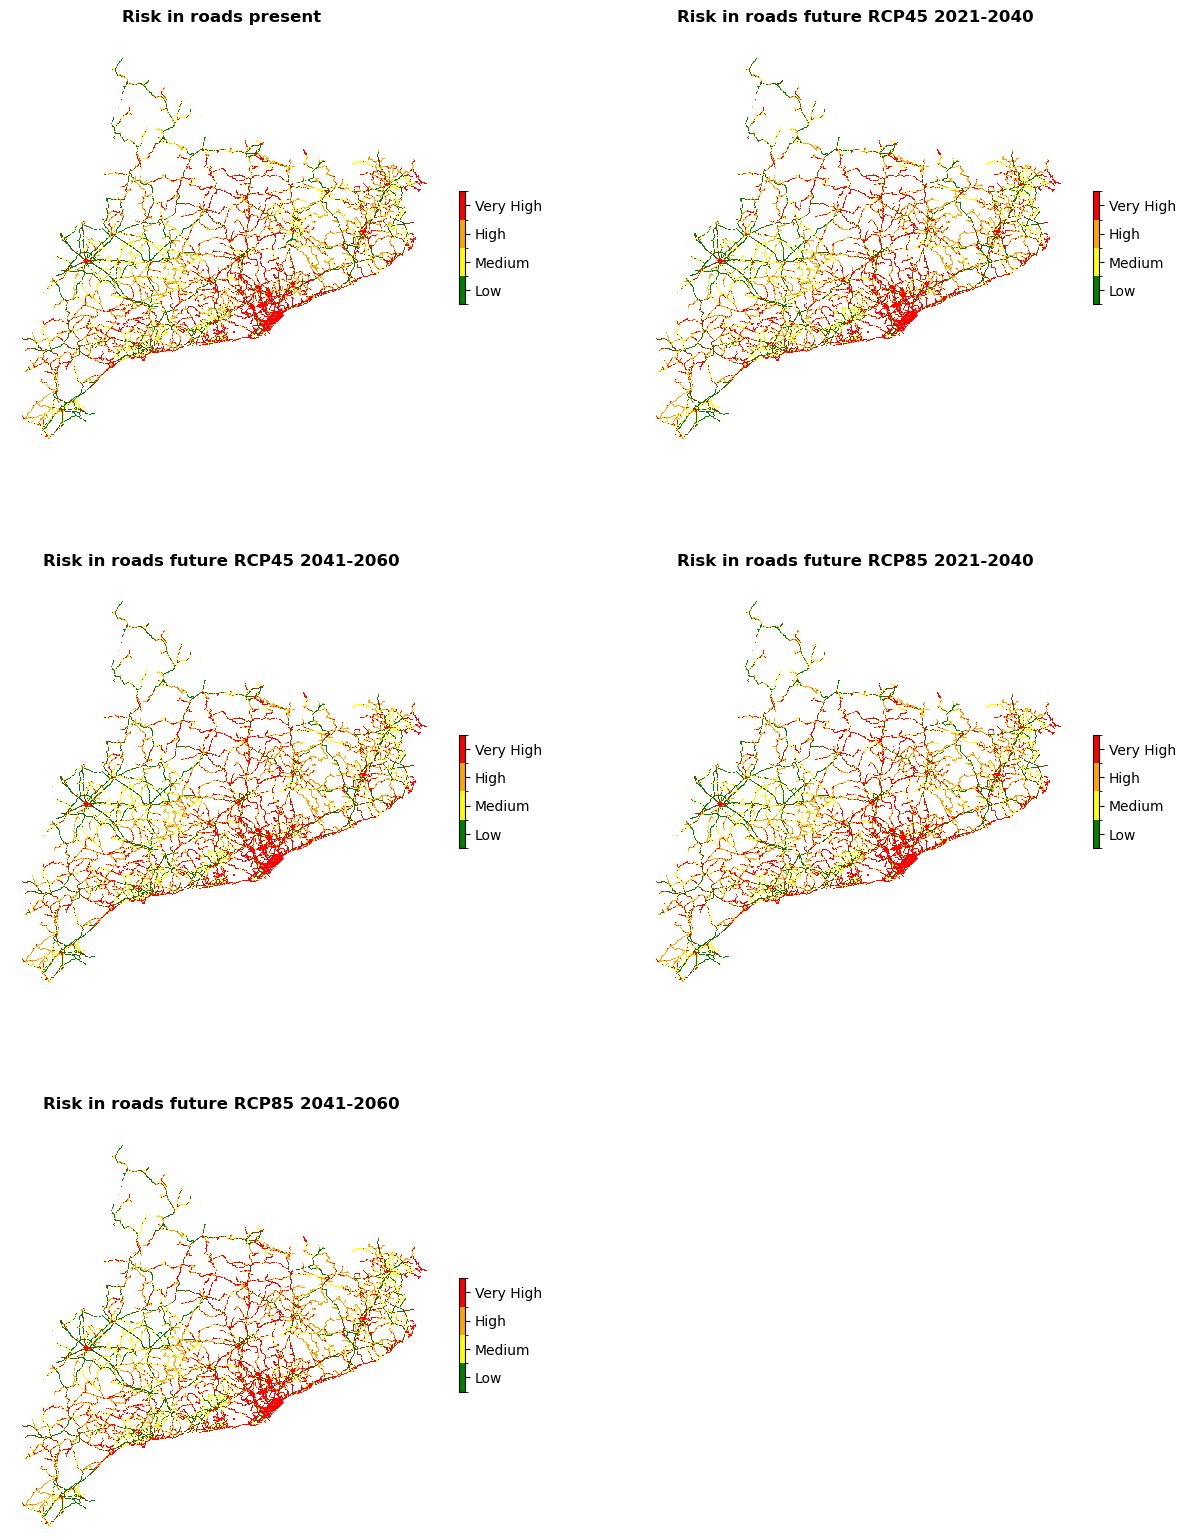

In [145]:
# List of Risk arrays and their names
Risk_arrs2 = [Risk_road_present_Roads,
              Risk_road_future_4p5_2021_2040, Risk_road_future_4p5_2041_2060,
              Risk_road_future_8p5_2021_2040, Risk_road_future_8p5_2041_2060]
names_risk2 = ['Risk in roads present',
              'Risk in roads future RCP45 2021-2040', 'Risk in roads future RCP45 2041-2060',
              'Risk in roads future RCP85 2021-2040', 'Risk in roads future RCP85 2041-2060']

# Visualization
fig, ax = plt.subplots(3, 2, figsize=(15, 20))

ref_r = np.where(roads_vul_arr == 0, -9999, roads_vul_arr)
for ax_, risk_arr, name__ in zip(ax.flatten(), Risk_arrs2, names_risk2):
    plot_raster_V2(risk_arr, ref_r, add_to_ax =(fig, ax_), title = f'{name__}',
                   shrink_legend = 0.25,
                    array_classes = [0, 1.1, 2.1, 3.1, 4.1],
                    classes_colors = ['green', 'yellow', 'orange', 'red'],
                    classes_names = ['Low', 'Medium', 'High', 'Very High'])

ax[2,1].remove()

Run the following cell if you want to save the risk maps 2:

In [29]:
for risk_map, name__ in zip(Risk_arrs2, names_risk2) :
    os.makedirs('./data_cat/risk_maps', exist_ok=True)
    risk_map_clean = np.where(ref_r == -9999, np.NaN, risk_map)
    save_raster_as(risk_map_clean, f'./data_cat/risk_maps/Risk_{name__}.tif', DEM_path, novalue = np.NaN)

## Analysis

### Difference of Susceptibility

Difference of Susceptibility maps between present and future:

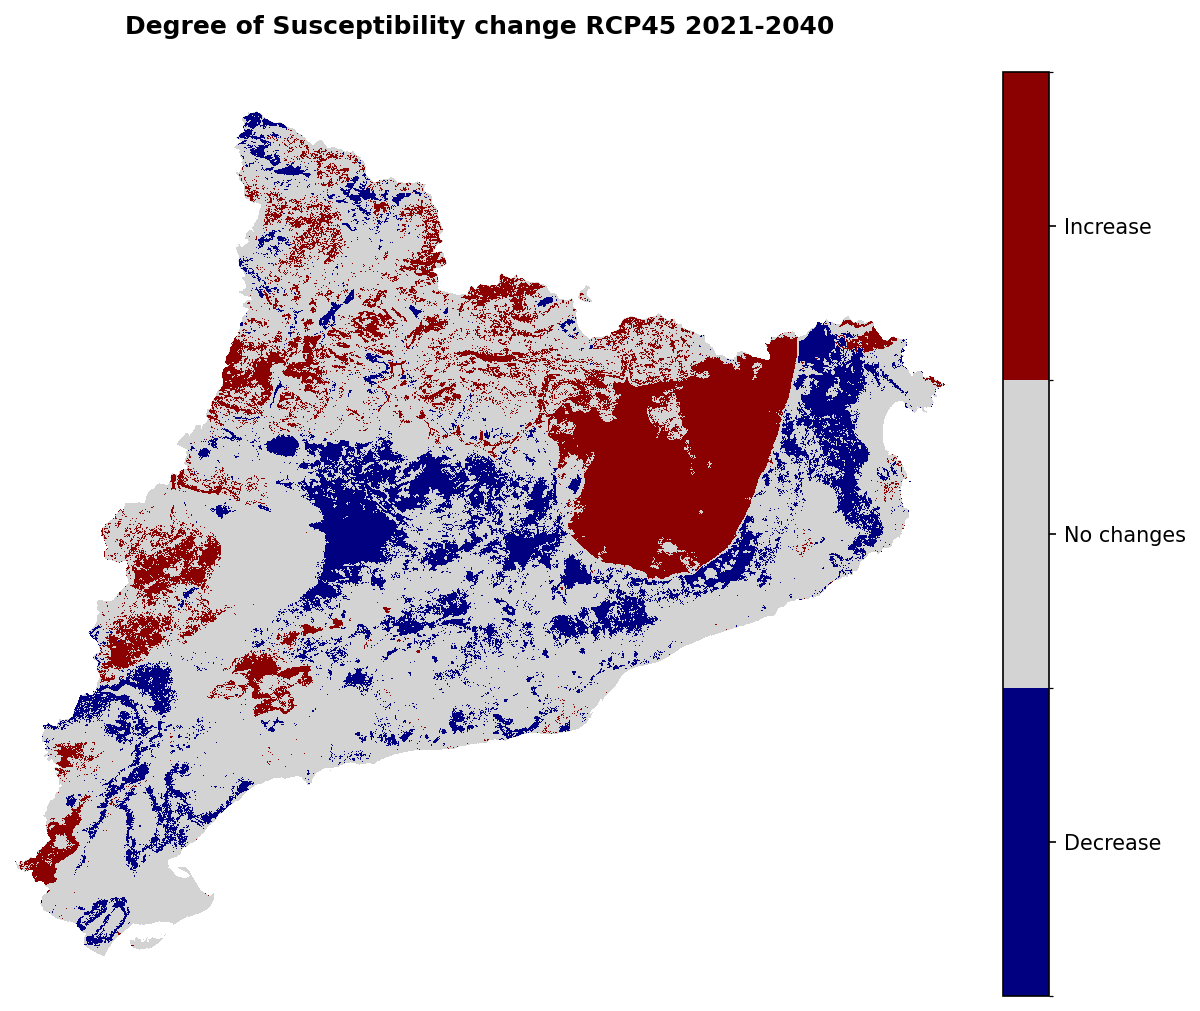

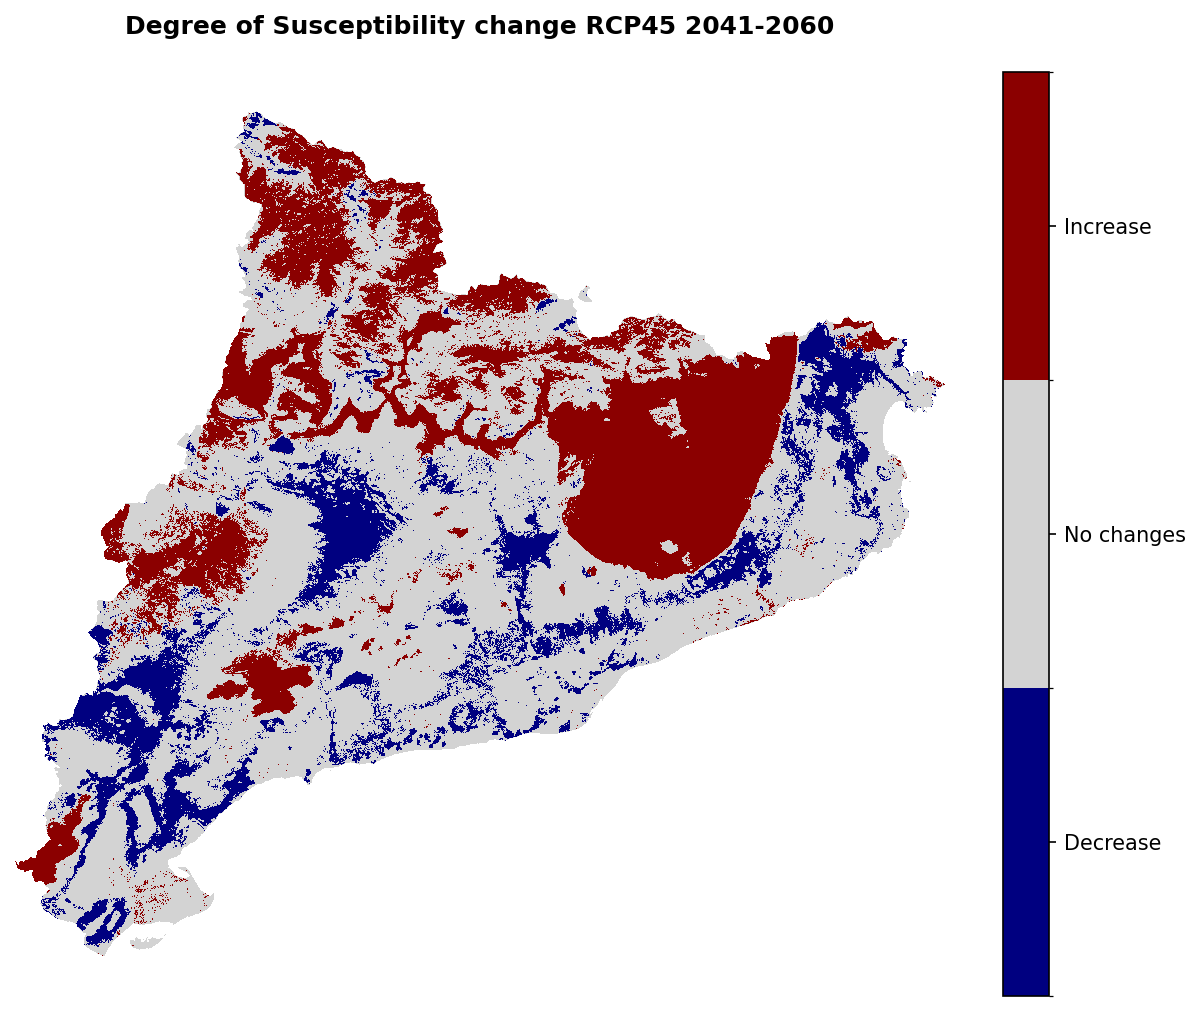

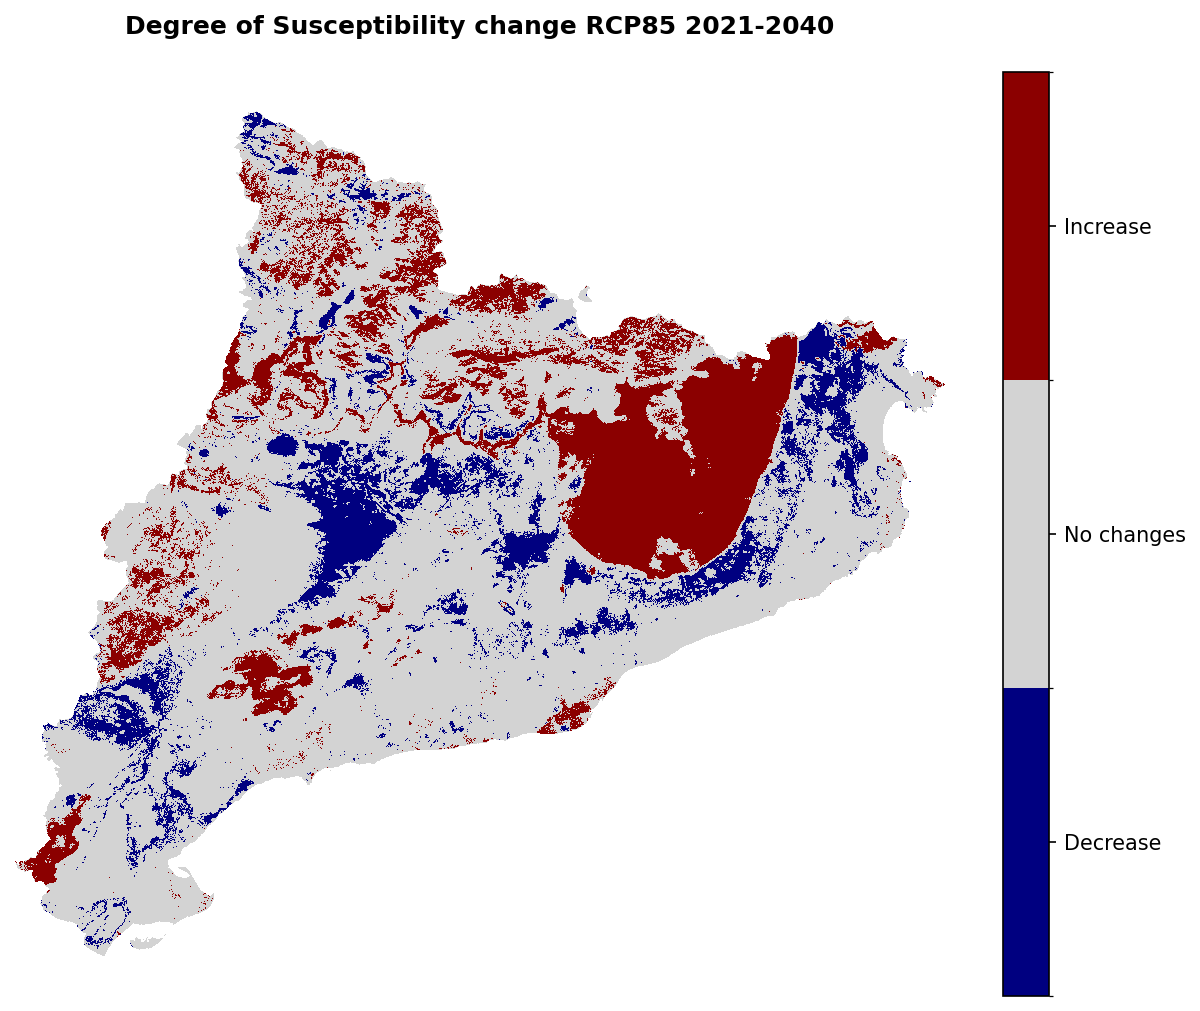

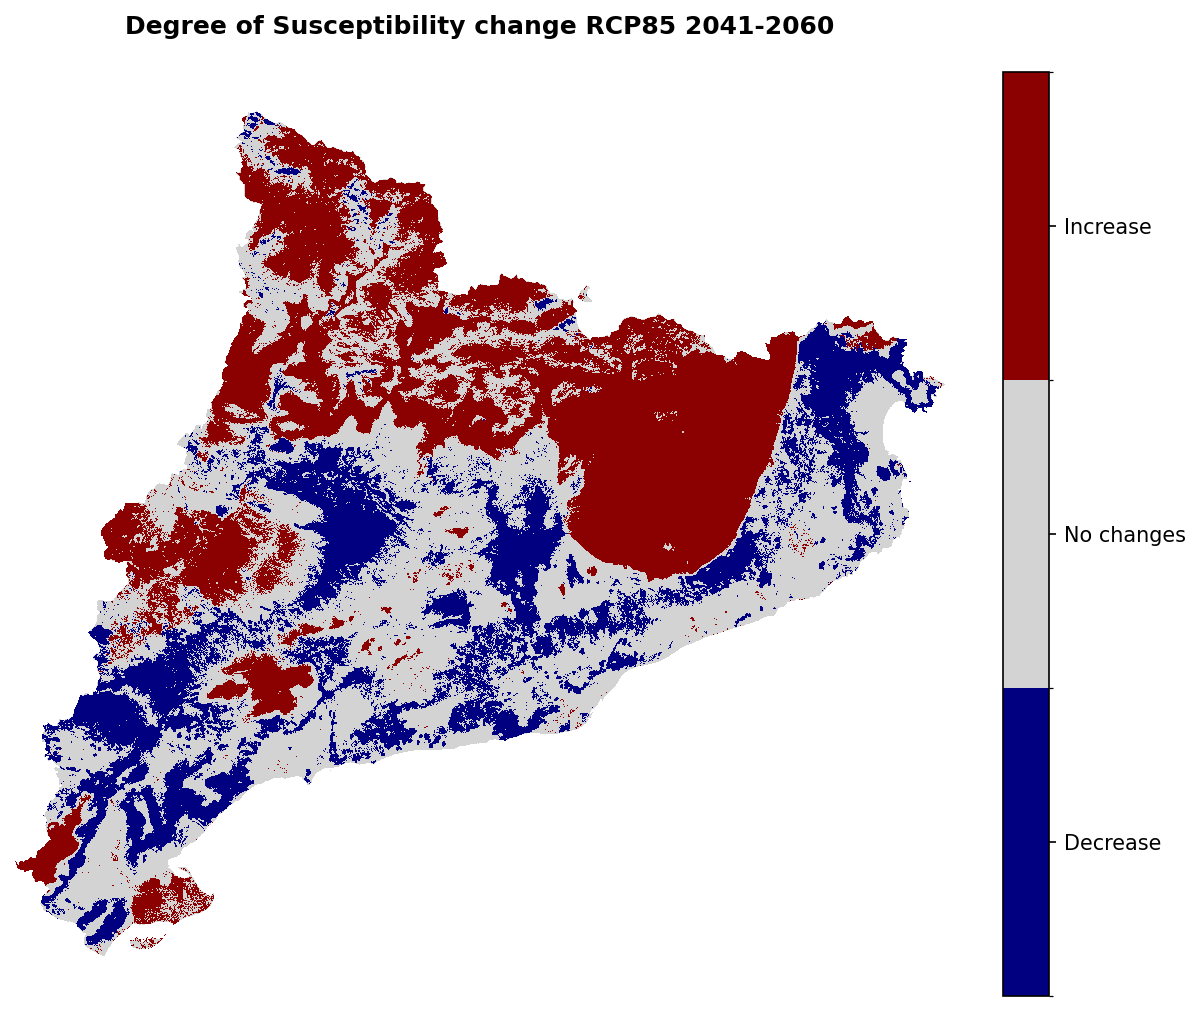

In [33]:
# Define a function to calculate the difference of susceptibility maps
def diff_susc_degree(susc_arr:np.array, risk2_arr:np.array, ref_arr ,title:str = 'title', **kwrags):
    if susc_arr.shape == risk2_arr.shape:
        risk_difference = risk2_arr - susc_arr
    # Define categories for differences creating a custom colormap
    classes_names = ['Decrease', 'No changes', 'Increase']
    array_classes = [-3.1, -0.1, 0.1, 3]
    classes_colors = ['navy',  'lightgray', 'darkred']
    # Plotting the differences
    plot_raster_V2(risk_difference, ref_arr, title = title,
                   classes_names =classes_names,
                   array_classes = array_classes,
                   classes_colors = classes_colors, **kwrags)
    return risk_difference

# Path of present Susceptibility
output_susc_present = "./data_cat/hazard/Hazard_output/my_suscep_present.tif"

# Path of RCP 4.5 Susceptibility
output_susc_4p5_2021_2040 = "./data_cat/hazard/Hazard_output/my_suscep_4p5_2021_2040.tif"
output_susc_4p5_2041_2060 = "./data_cat/hazard/Hazard_output/my_suscep_4p5_2041_2060.tif"

# Path of RCP 8.5 Susceptibility
output_susc_8p5_2021_2040 = "./data_cat/hazard/Hazard_output/my_suscep_8p5_2021_2040.tif"
output_susc_8p5_2041_2060 = "./data_cat/hazard/Hazard_output/my_suscep_8p5_2041_2060.tif"

# Arrays of susceptibility maps
susc_present = rasterio.open(output_susc_present).read(1)
susc_4p5_2021_2040 = rasterio.open(output_susc_4p5_2021_2040).read(1)
susc_4p5_2041_2060 = rasterio.open(output_susc_4p5_2041_2060).read(1)
susc_8p5_2021_2040 = rasterio.open(output_susc_8p5_2021_2040).read(1)
susc_8p5_2041_2060 = rasterio.open(output_susc_8p5_2041_2060).read(1)

# Calculating the difference of susceptibility maps
Degree_of_susc_4p5_2021_2040 = diff_susc_degree(susc_present, susc_4p5_2021_2040, ref,title = 'Degree of Susceptibility change RCP45 2021-2040', dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Susc_4p5_2021_2040.png')
Degree_of_susc_4p5_2041_2060 = diff_susc_degree(susc_present, susc_4p5_2041_2060, ref,title = 'Degree of Susceptibility change RCP45 2041-2060',dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Susc_4p5_2041_2060.png')
Degree_of_susc_8p5_2021_2040 = diff_susc_degree(susc_present, susc_8p5_2021_2040, ref,title = 'Degree of Susceptibility change RCP85 2021-2040', dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Susc_8p5_2021_2040.png')
Degree_of_susc_8p5_2041_2060 = diff_susc_degree(susc_present, susc_8p5_2041_2060, ref,title = 'Degree of Susceptibility change RCP85 2041-2060', dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Susc_8p5_2041_2060.png')

### Difference of Hazard

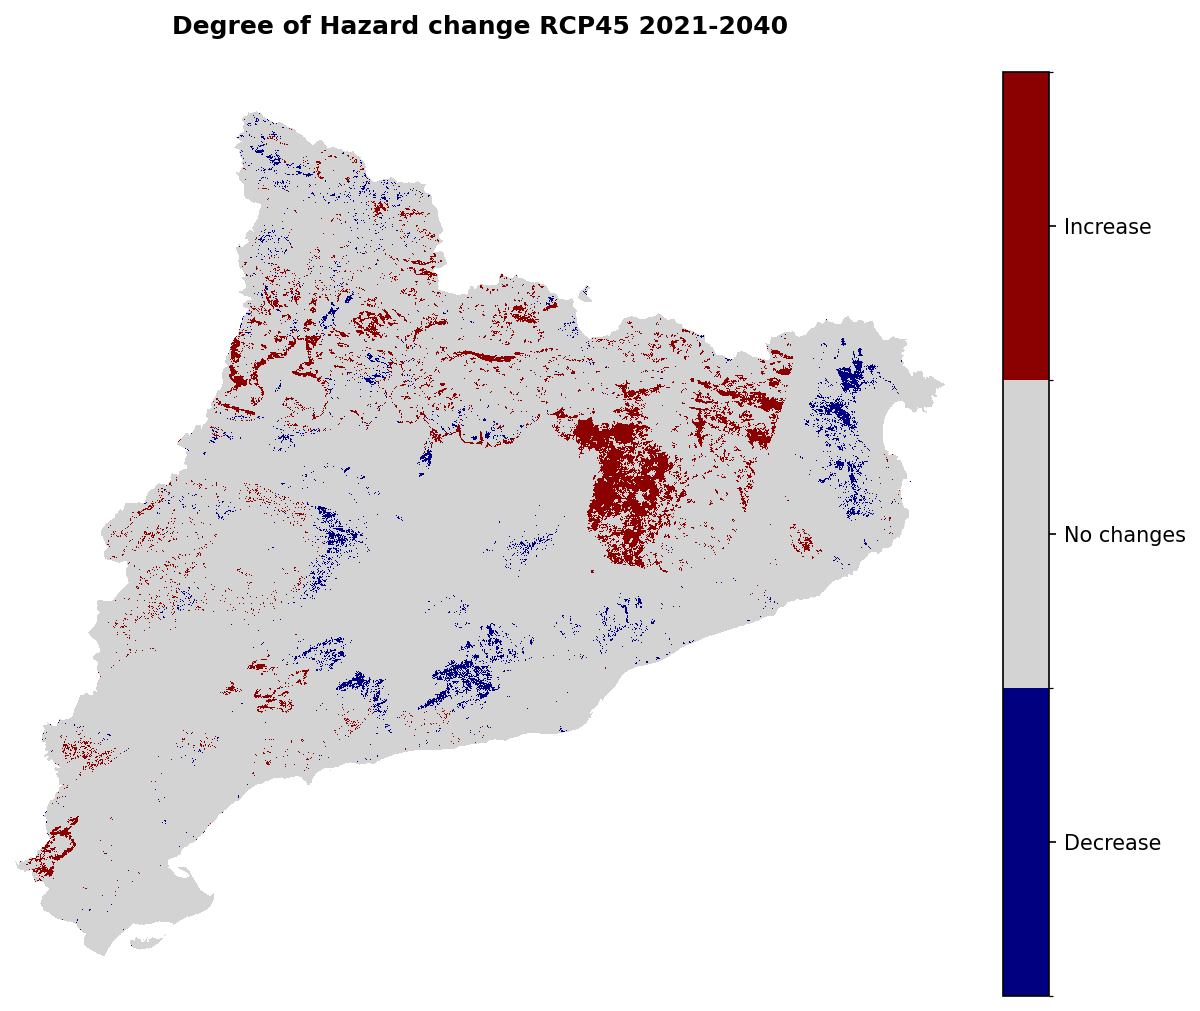

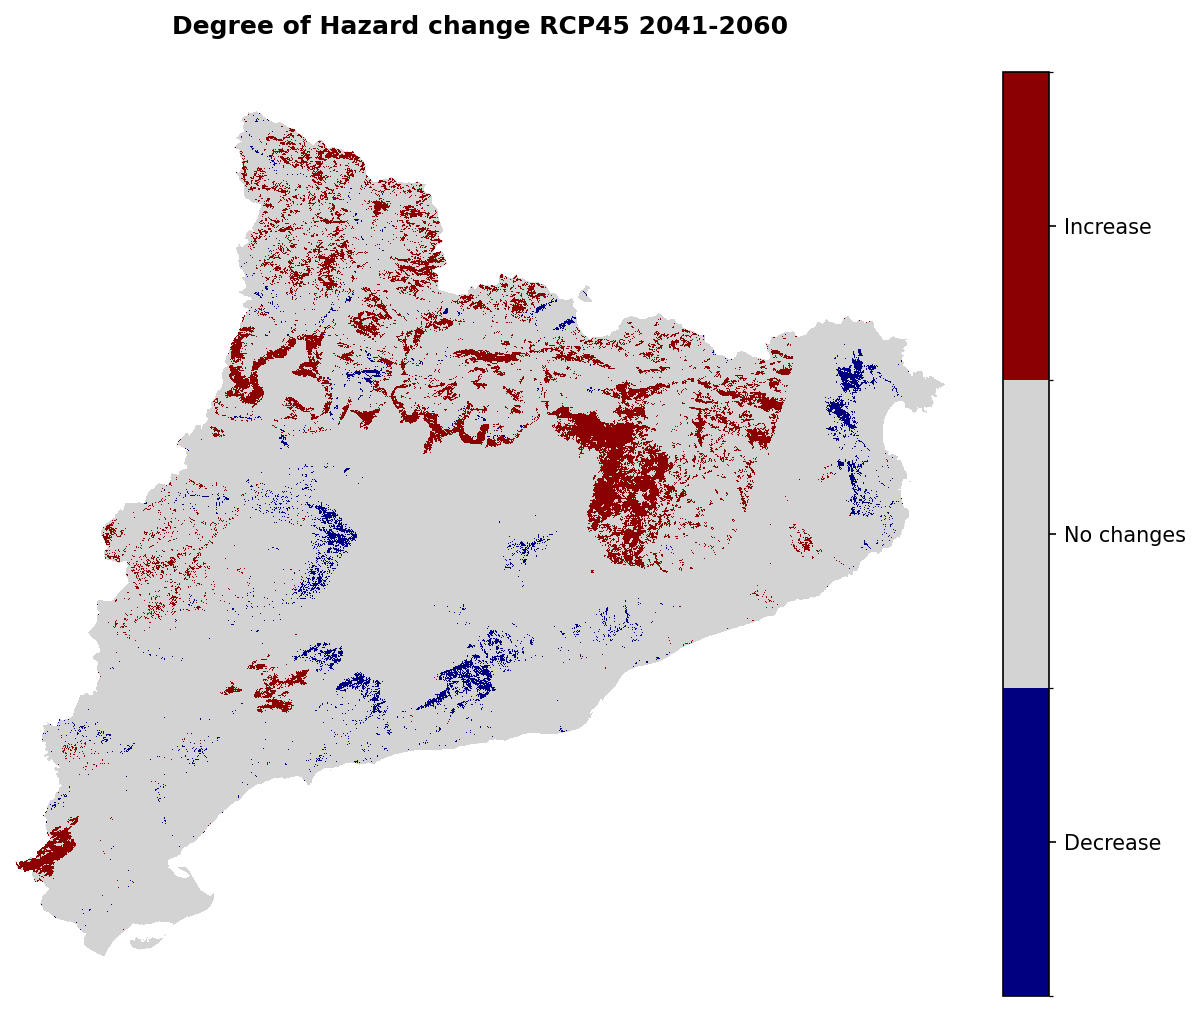

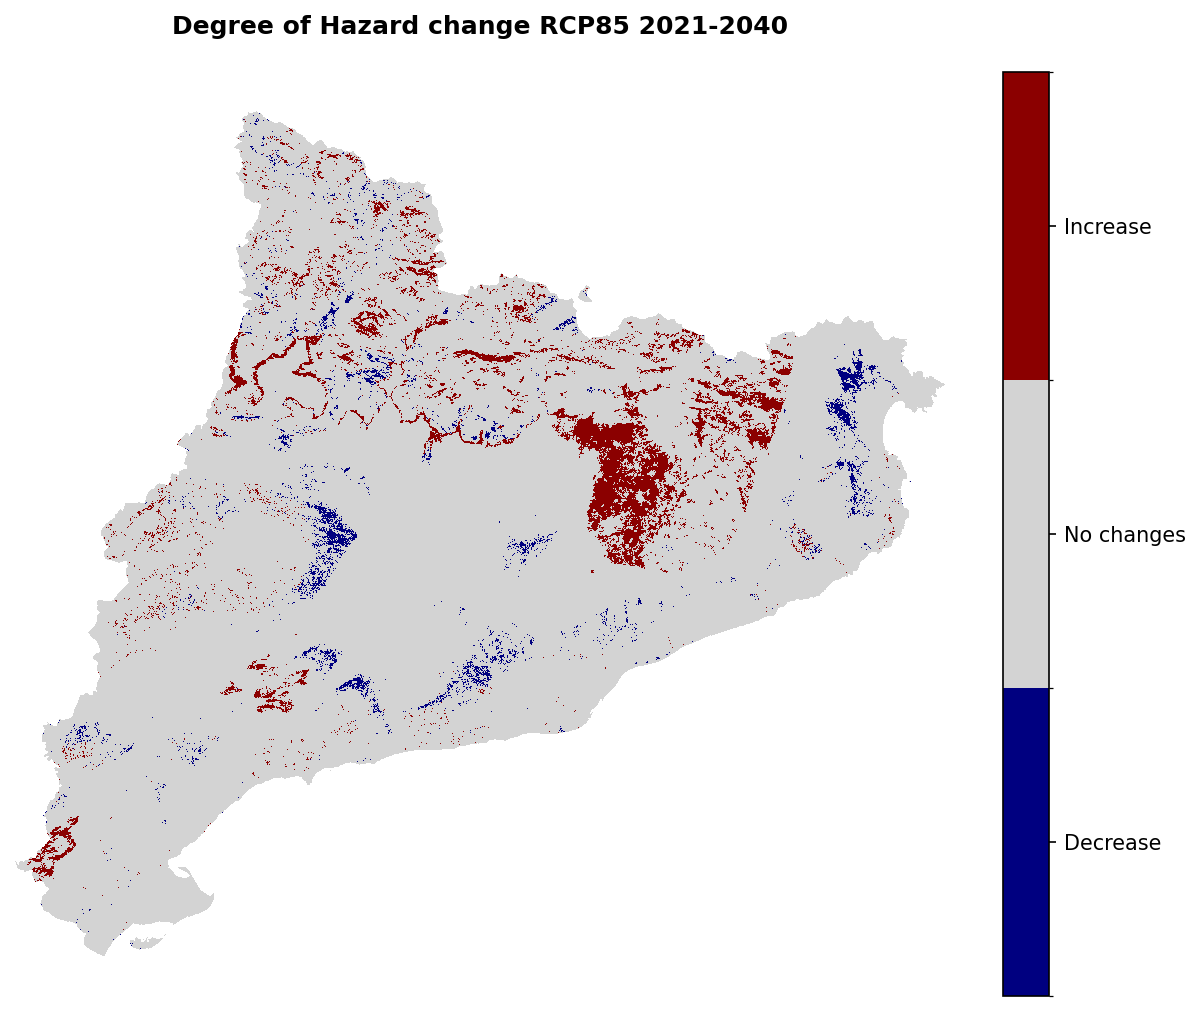

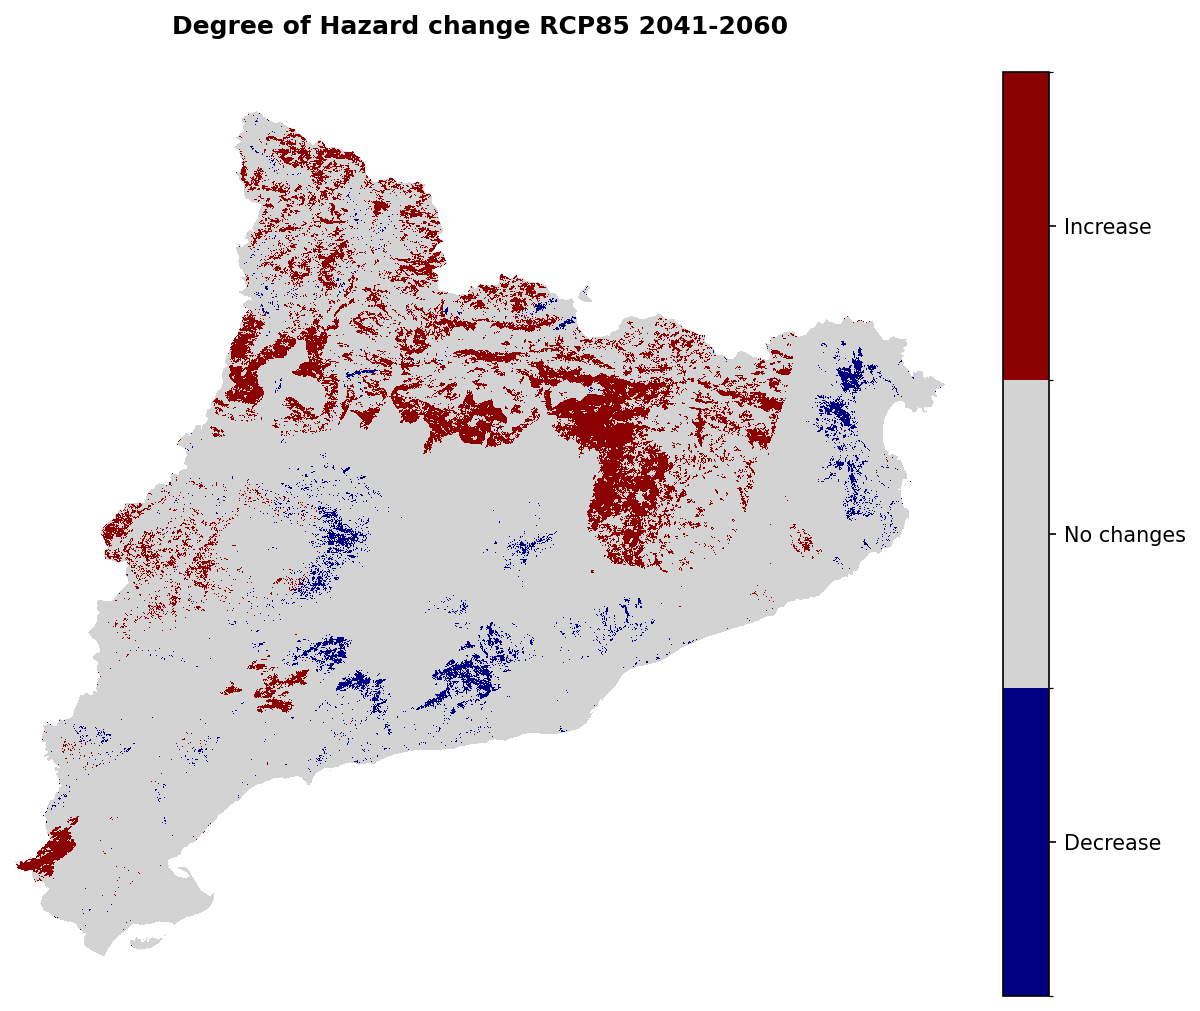

In [34]:
# Function to calculate the difference of hazard maps
def diff_hazard_degree(Hazard_arr1_arr:np.array, hazard_arr2:np.array, ref_arr ,title:str = 'title', **kwargs):
    if Hazard_arr1_arr.shape == hazard_arr2.shape:
        risk_difference = hazard_arr2 - Hazard_arr1_arr
    # Define categories for differences # Create a custom colormap
    classes_names = ['Decrease', 'No changes', 'Increase']
    array_classes = [-5.1, 0, 0.1, 5]
    classes_colors = ['navy', 'lightgray', 'darkred']
    # Plotting the differences
    plot_raster_V2(risk_difference, ref_arr, title = title,
                   classes_names =classes_names,
                   array_classes = array_classes,
                   classes_colors = classes_colors, **kwargs)
    return risk_difference

# Paths of present Hazard
output_hazard_present = "./data_cat/hazard/Hazard_output/my_hazard_present.tif"

# Paths of RCP 4.5 Harzad
output_hazard_4p5_2021_2040 = "./data_cat/hazard/Hazard_output/my_hazard_4p5_2021_2040.tif"
output_hazard_4p5_2041_2060 = "./data_cat/hazard/Hazard_output/my_hazard_4p5_2041_2060.tif"

# Paths of RCP 8.5 Hazard
output_hazard_8p5_2021_2040 = "./data_cat/hazard/Hazard_output/my_hazard_8p5_2021_2040.tif"
output_hazard_8p5_2041_2060 = "./data_cat/hazard/Hazard_output/my_hazard_8p5_2041_2060.tif"

# Arrays of hazard maps
hazard_present = rasterio.open(output_hazard_present).read(1)
hazard_4p5_2021_2040 = rasterio.open(output_hazard_4p5_2021_2040).read(1)
hazard_4p5_2041_2060 = rasterio.open(output_hazard_4p5_2041_2060).read(1)
hazard_8p5_2021_2040 = rasterio.open(output_hazard_8p5_2021_2040).read(1)
hazard_8p5_2041_2060 = rasterio.open(output_hazard_8p5_2041_2060).read(1)

# Calculating the difference of hazard maps
Degree_of_hazard_4p5_2021_2040 = diff_hazard_degree(hazard_present, hazard_4p5_2021_2040, ref,title = 'Degree of Hazard change RCP45 2021-2040', dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Hazard_4p5_2021_2040.png')
Degree_of_hazard_4p5_2041_2060 = diff_hazard_degree(hazard_present, hazard_4p5_2041_2060, ref,title = 'Degree of Hazard change RCP45 2041-2060', dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Hazard_4p5_2041_2060.png')
Degree_of_hazard_8p5_2021_2040 = diff_hazard_degree(hazard_present, hazard_8p5_2021_2040, ref,title = 'Degree of Hazard change RCP85 2021-2040', dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Hazard_8p5_2021_2040.png')
Degree_of_hazard_8p5_2041_2060 = diff_hazard_degree(hazard_present, hazard_8p5_2041_2060, ref,title = 'Degree of Hazard change RCP85 2041-2060', dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Hazard_8p5_2041_2060.png')


### Difference of Risk Maps

Let us see the difference between different time periods and our baseline (present):

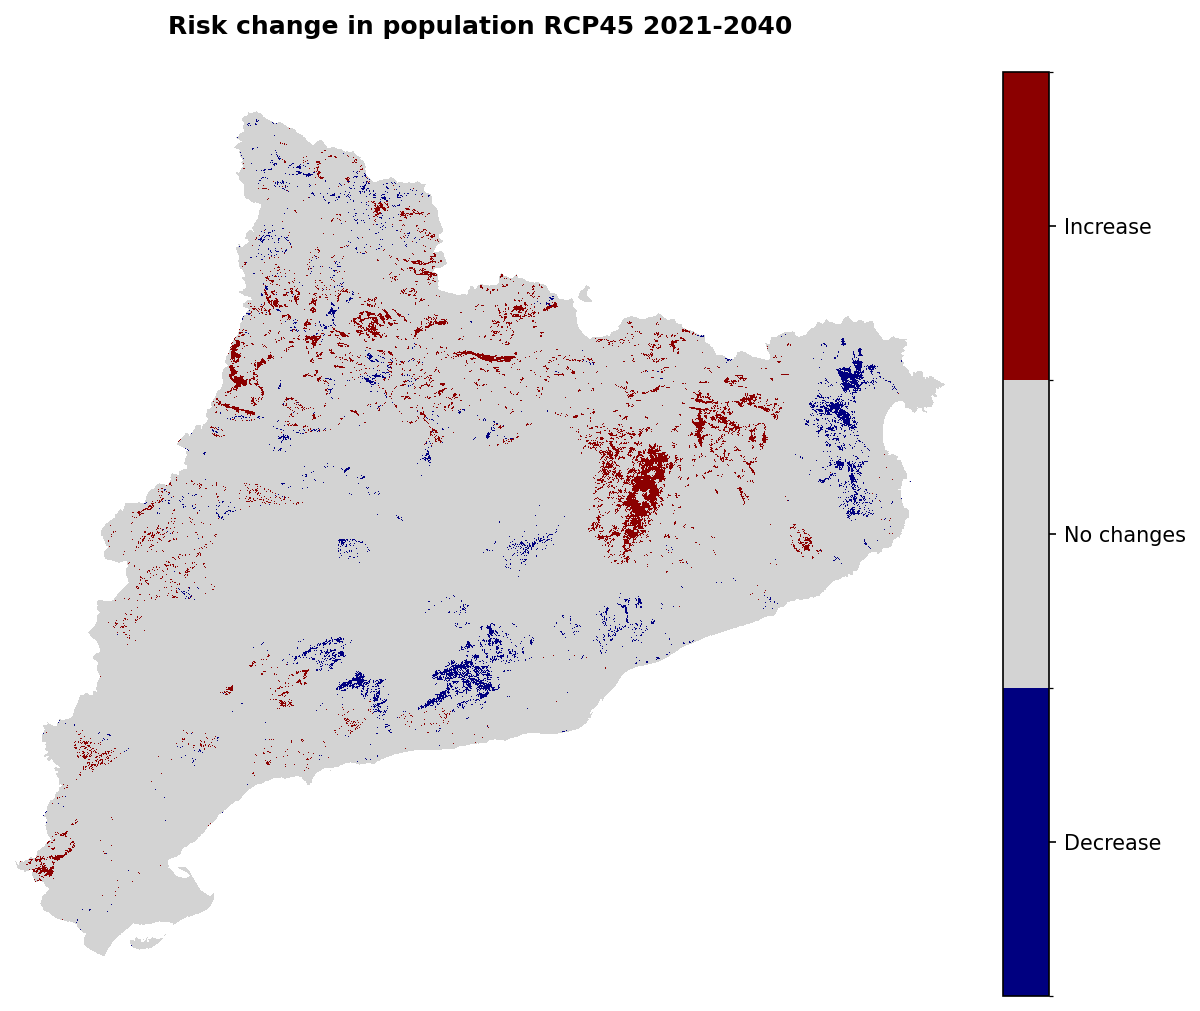

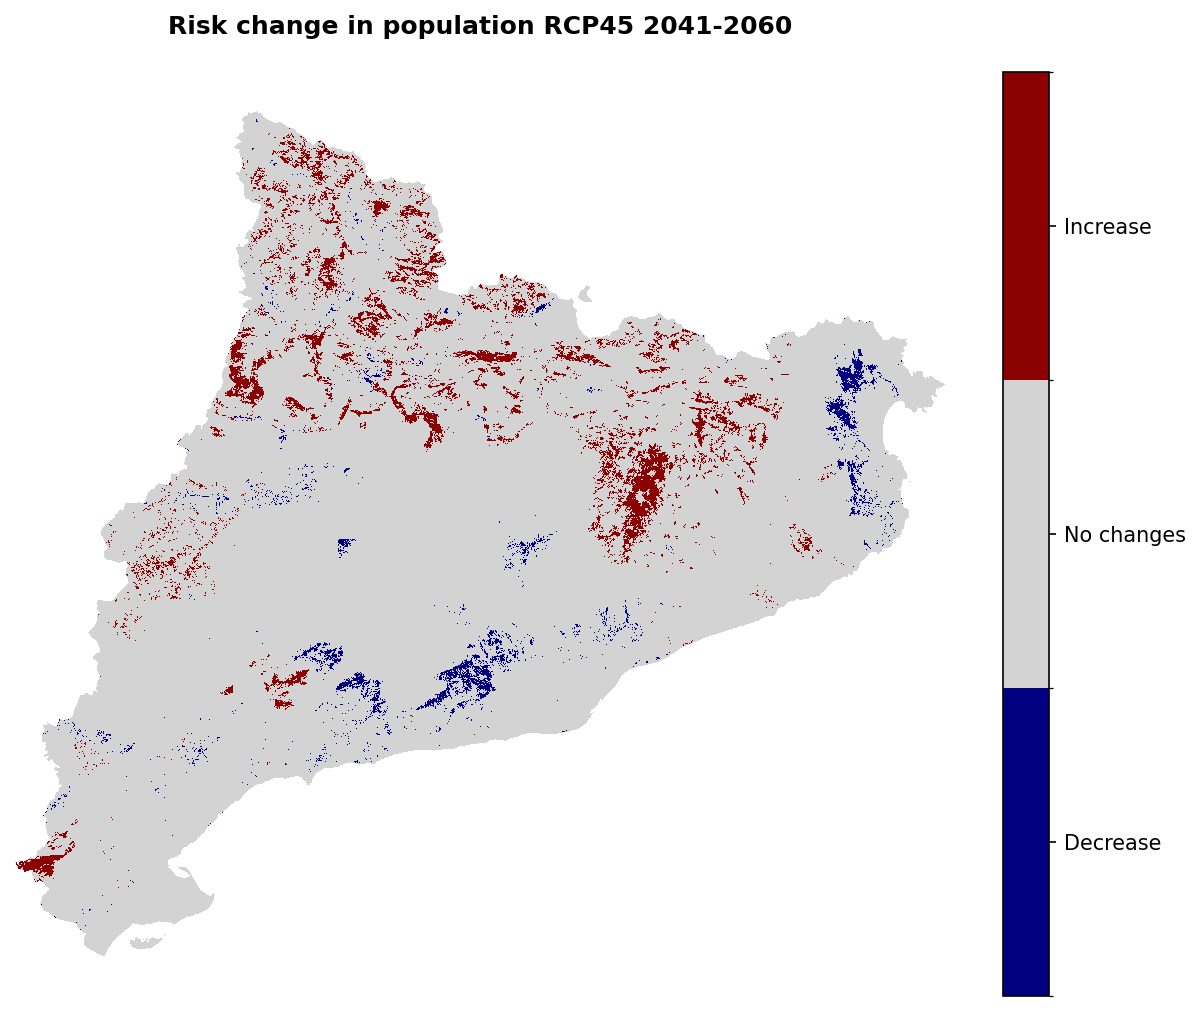

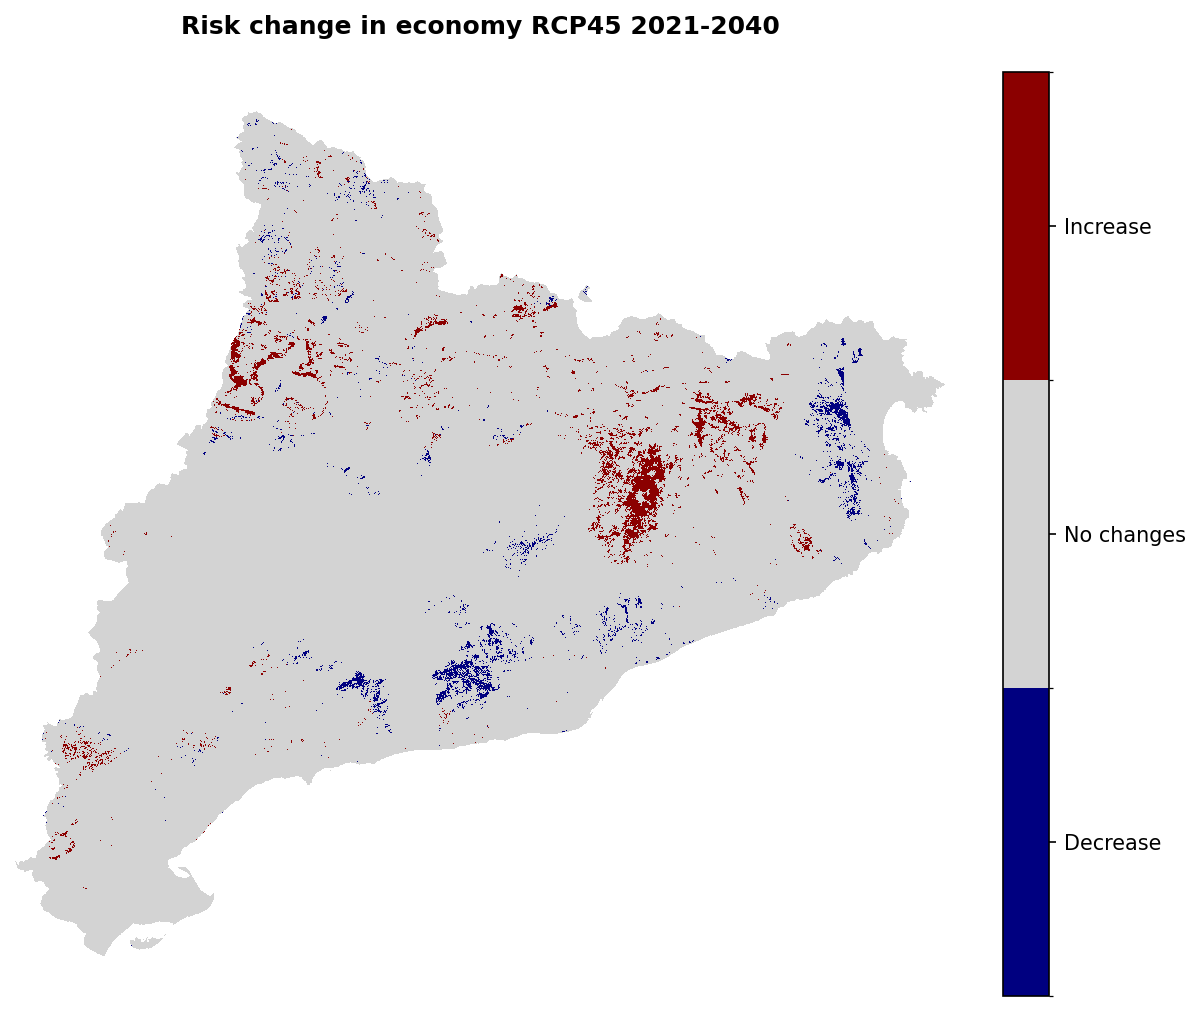

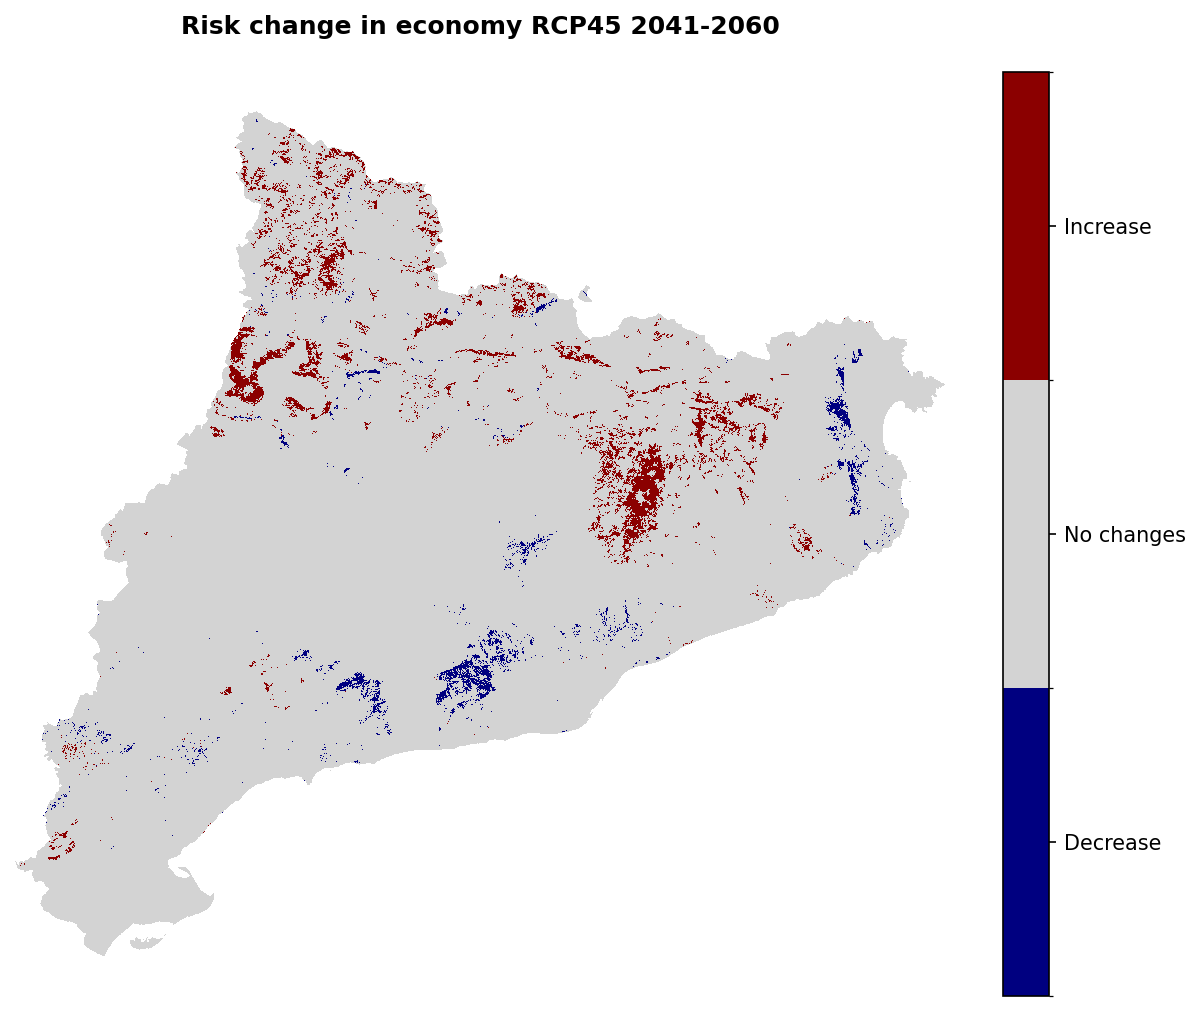

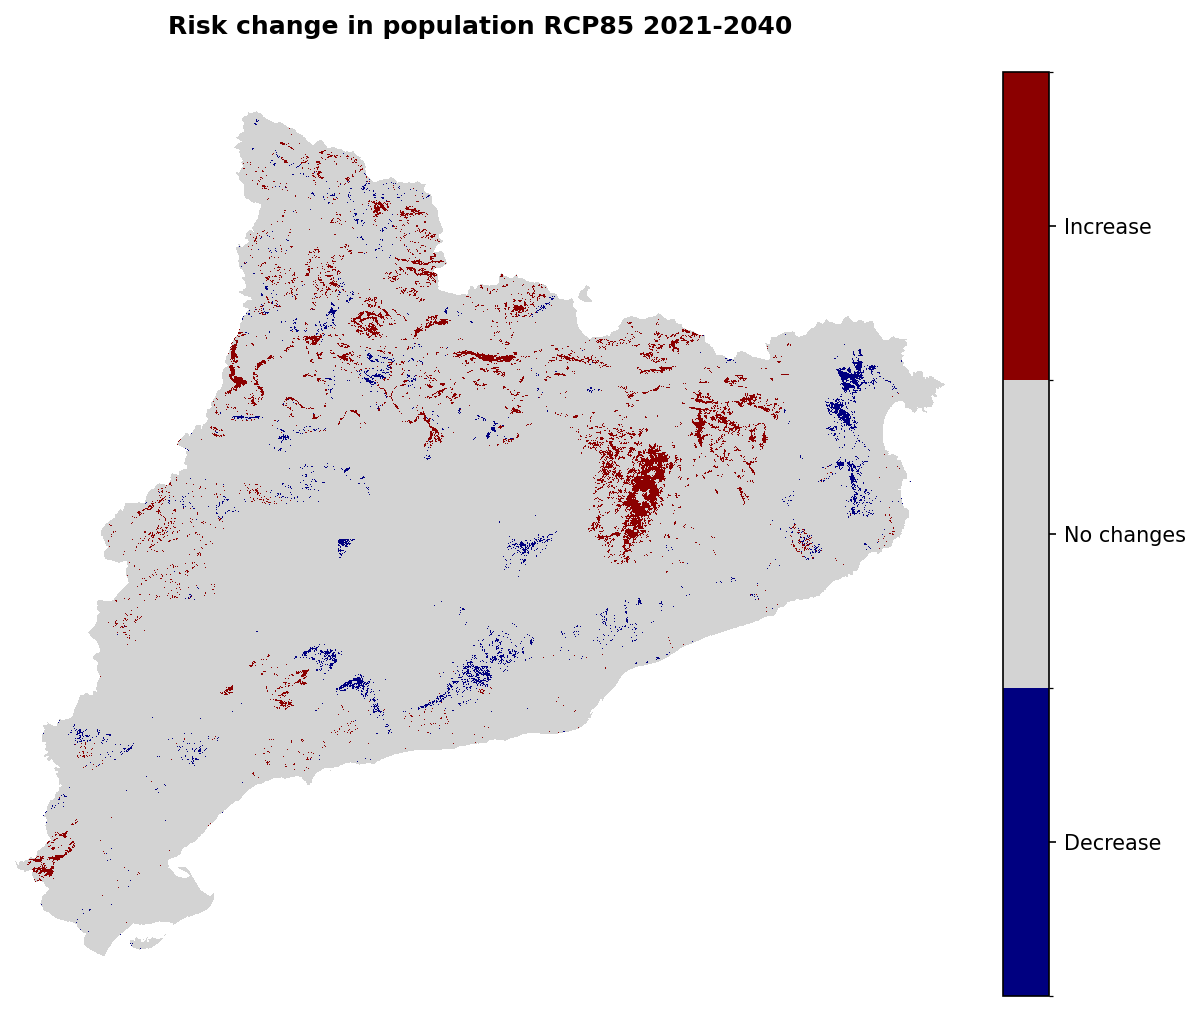

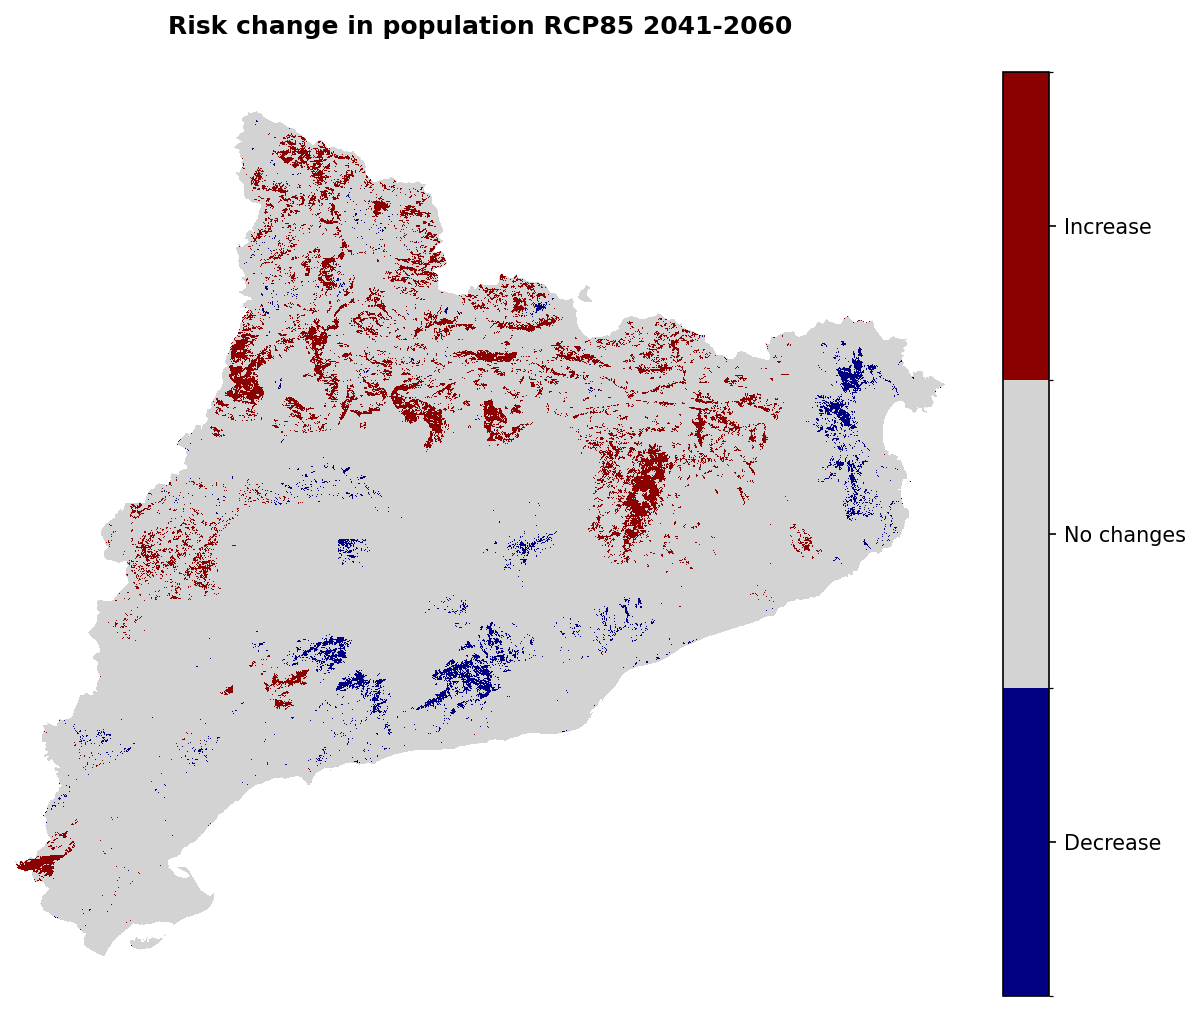

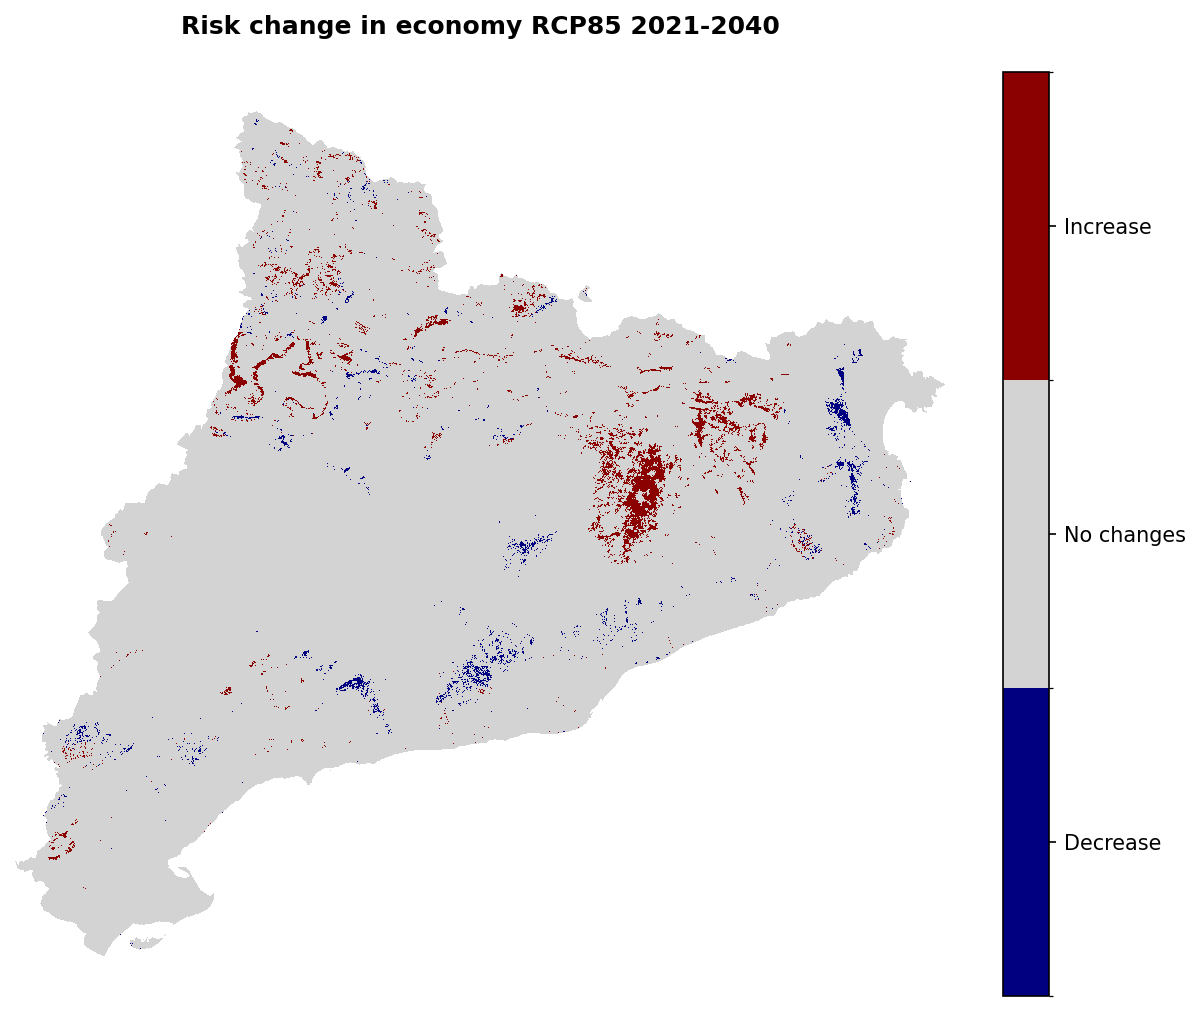

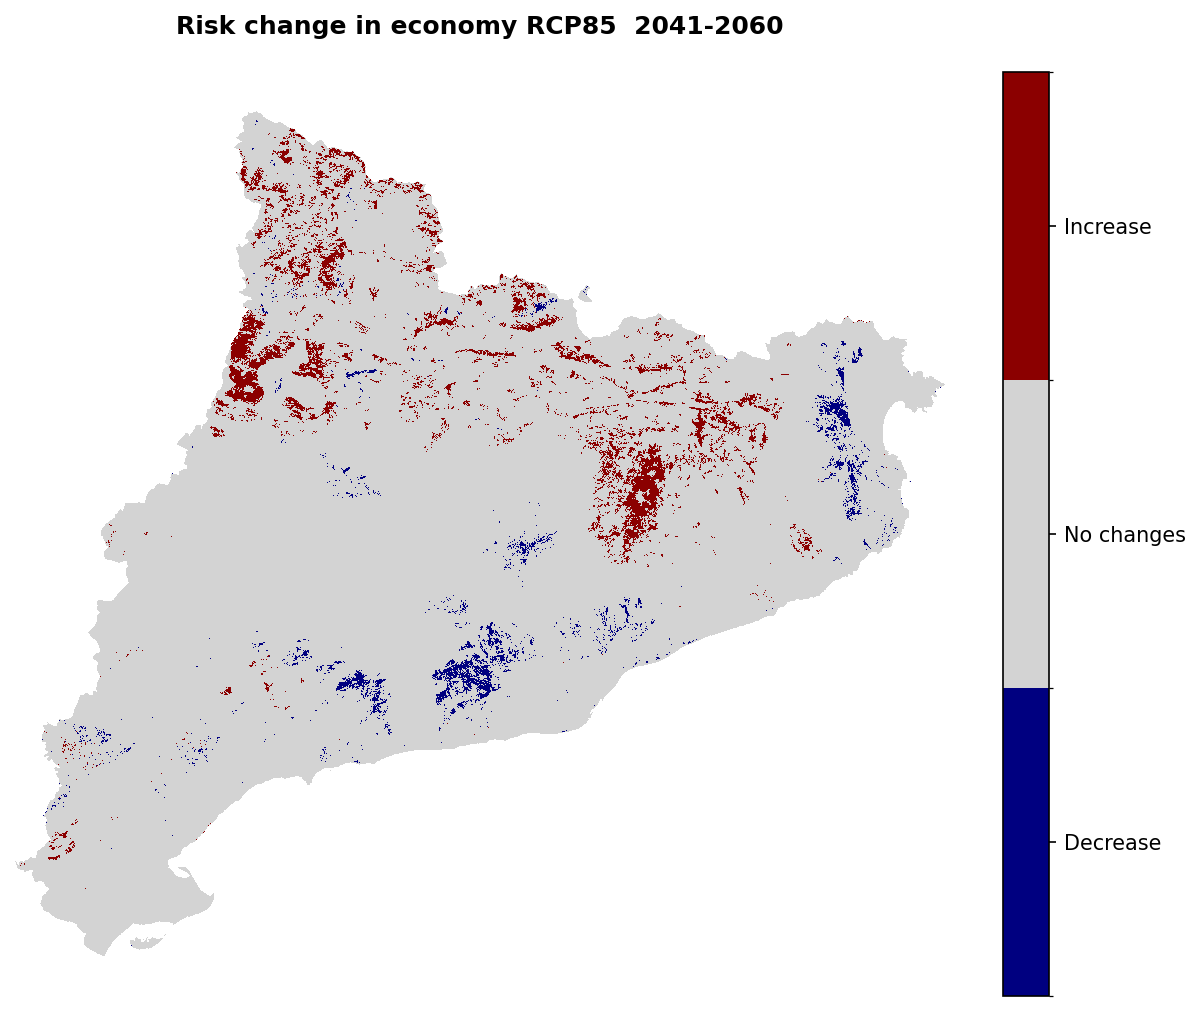

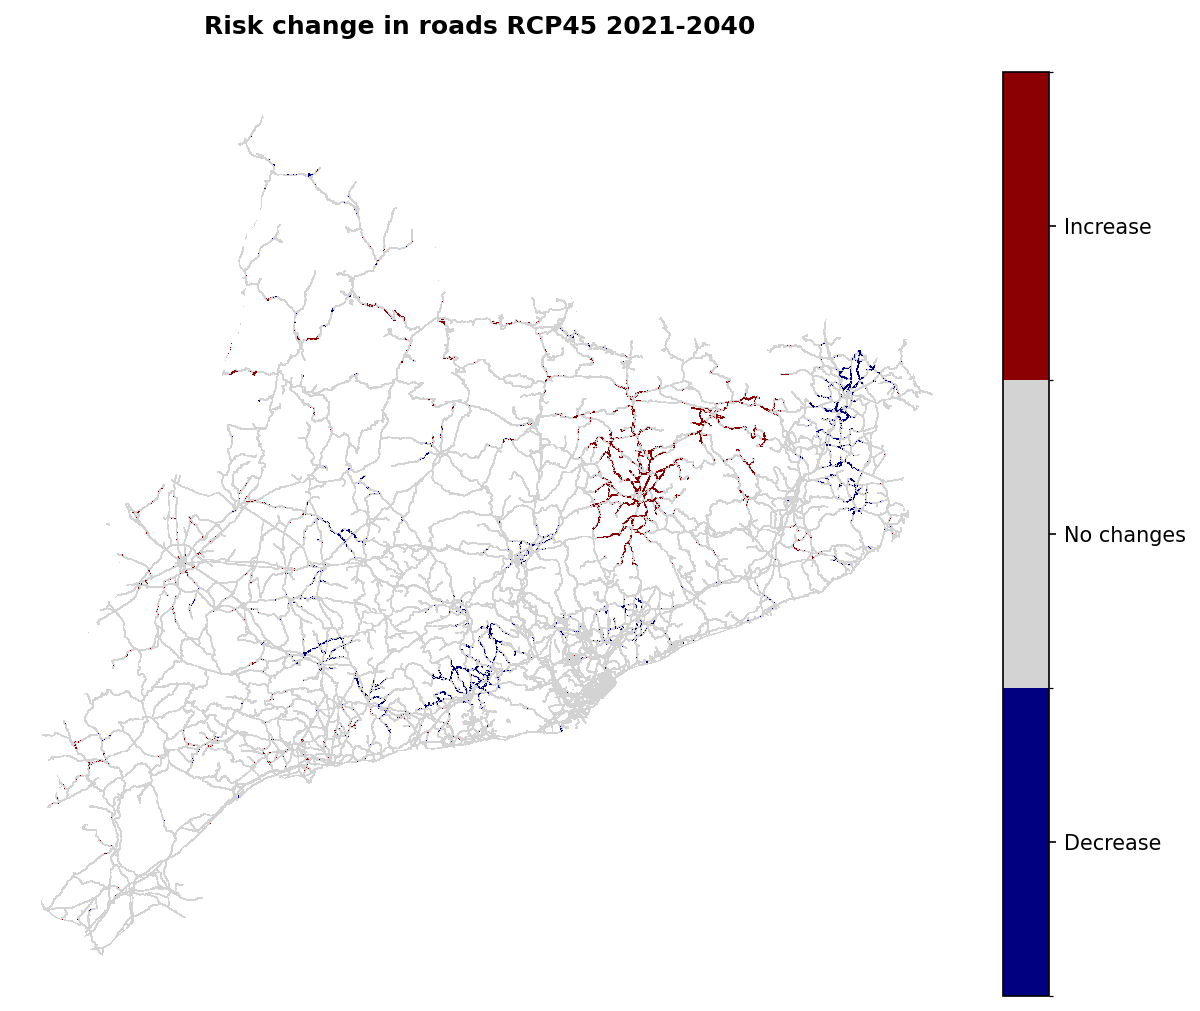

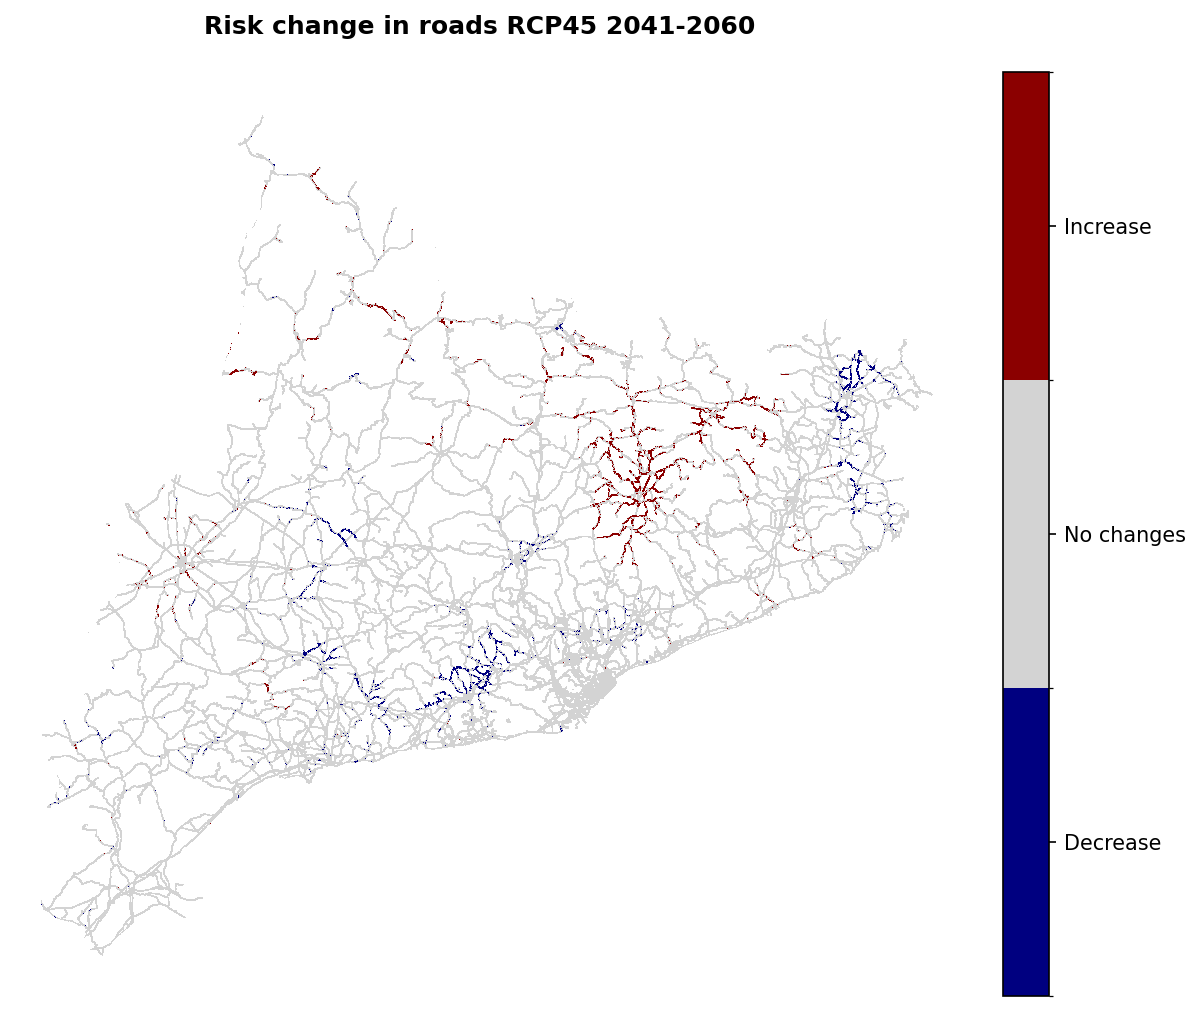

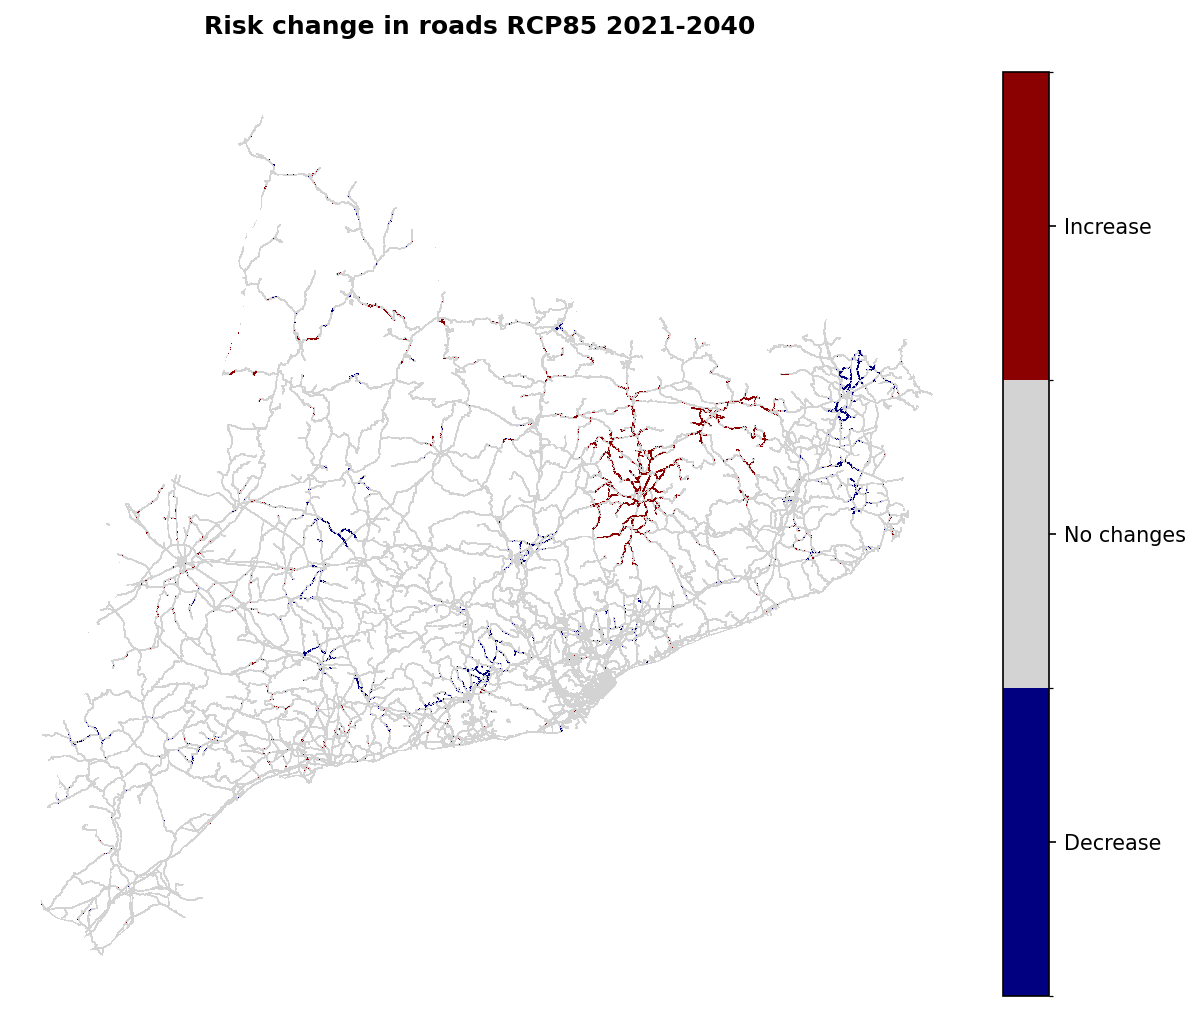

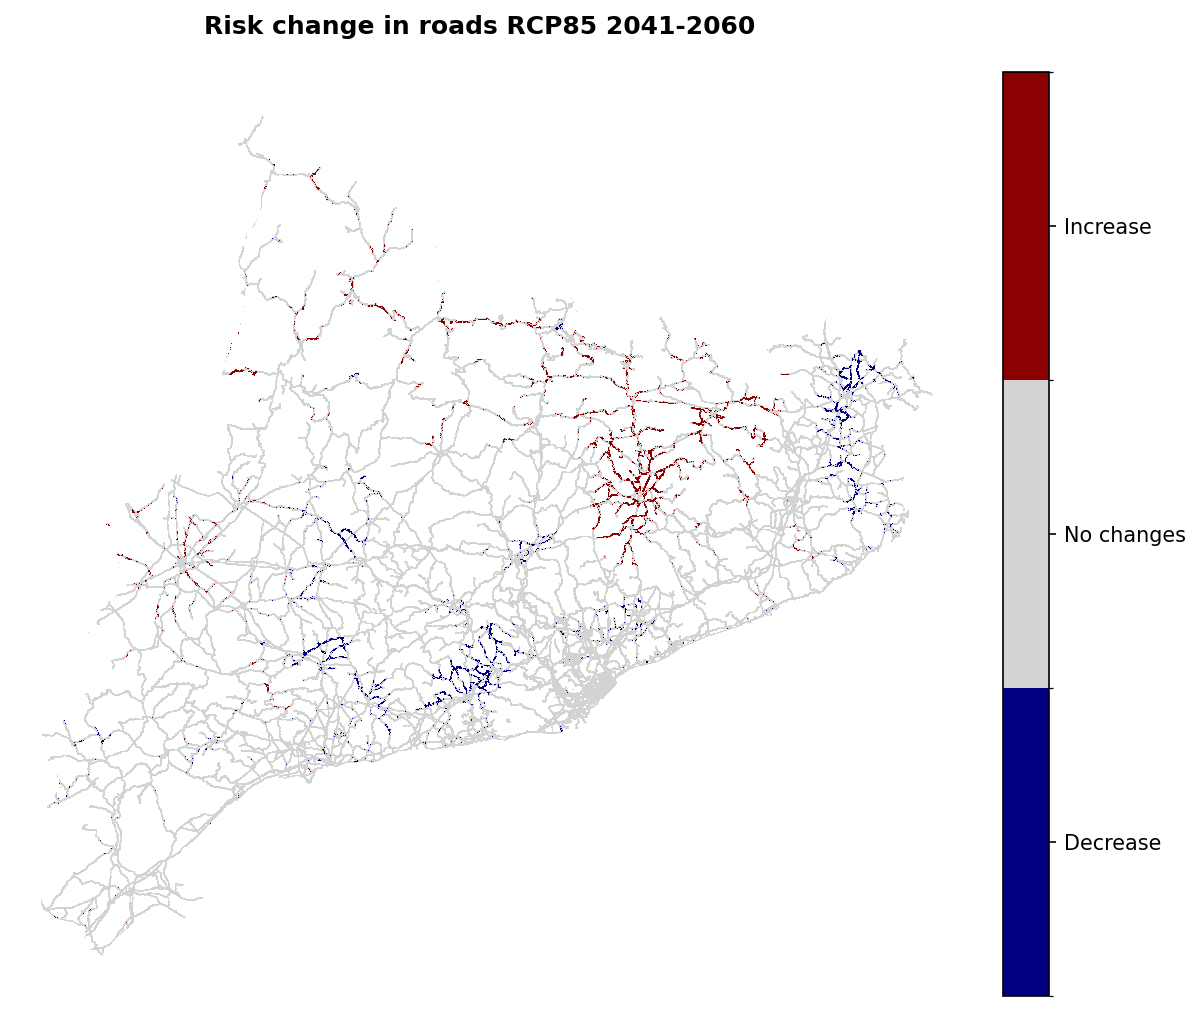

In [35]:
# Population and economy risks
def diff_risk_degree(risk1_arr:np.array, risk2_arr:np.array, ref_arr ,title:str = 'title', **kwargs):
    if risk1_arr.shape == risk2_arr.shape:
        risk_difference = risk2_arr - risk1_arr
    # Define categories for differences # Create a custom colormap
    classes_names = ['Decrease', 'No changes', 'Increase']
    array_classes = [-5.1, 0, 0.1, 5]
    classes_colors = ['navy', 'lightgray', 'darkred']
    # Plotting the differences
    plot_raster_V2(risk_difference, ref_arr, title = title,
                   classes_names =classes_names,
                   array_classes = array_classes,
                   classes_colors = classes_colors, **kwargs)
    return risk_difference

# Differences for population and economical Risk in Future RCP45
Degree_of_risk_4p5_pop2021 = diff_risk_degree(Risk_pop_present, Risk_pop_future_4p5_2021_2040, ref,title= 'Risk change in population RCP45 2021-2040', dpi=150, outpath = './data_cat/Analysis_maps/Diffs_Risk_4p5_pop_2021_2040.png')
Degree_of_risk_4p5_pop2041 = diff_risk_degree(Risk_pop_present, Risk_pop_future_4p5_2041_2060, ref,title= 'Risk change in population RCP45 2041-2060', dpi=150, outpath = './data_cat/Analysis_maps/Diffs_Risk_4p5_pop_2041_2060.png')
Degree_of_risk_4p5_econ2021 = diff_risk_degree(Risk_econ_present, Risk_econ_future_4p5_2021_2040,ref ,title= 'Risk change in economy RCP45 2021-2040', dpi=150, outpath = './data_cat/Analysis_maps/Diffs_Risk_4p5_econ_2021_2040.png')
Degree_of_risk_4p5_econ_2041 = diff_risk_degree(Risk_econ_present, Risk_econ_future_4p5_2041_2060, ref,title= 'Risk change in economy RCP45 2041-2060', dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Risk_4p5_econ_2041_2060.png')

# Differences for population and economical Risk in Future RCP85
Degere_of_risk_8p5_pop2021 = diff_risk_degree(Risk_pop_present, Risk_pop_future_8p5_2021_2040, ref,title= 'Risk change in population RCP85 2021-2040' , dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Risk_8p5_pop_2021_2040.png')
Degree_of_risk_8p5_pop2041 = diff_risk_degree(Risk_pop_present, Risk_pop_future_8p5_2041_2060, ref,title= 'Risk change in population RCP85 2041-2060' , dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Risk_8p5_pop_2041_2060.png')
Degree_of_risk_8p5_econ2021 = diff_risk_degree(Risk_econ_present, Risk_econ_future_8p5_2021_2040,ref ,title= 'Risk change in economy RCP85 2021-2040' , dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Risk_8p5_econ_2021_2040.png')
Degree_of_risk_8p5_econ_2041 = diff_risk_degree(Risk_econ_present, Risk_econ_future_8p5_2041_2060, ref,title= 'Risk change in economy RCP85  2041-2060', dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Risk_8p5_econ_2041_2060.png')

# Differences for Roads Risk in Future RCP45
Degree_of_risk_4p5_road_2021 = diff_risk_degree(Risk_road_present_Roads, Risk_road_future_4p5_2021_2040,ref_r, title= 'Risk change in roads RCP45 2021-2040', dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Risk_4p5_road_2021_2040.png')
Degree_of_risk_4p5_road_2041 = diff_risk_degree(Risk_road_present_Roads, Risk_road_future_4p5_2041_2060,ref_r, title= 'Risk change in roads RCP45 2041-2060', dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Risk_4p5_road_2041_2060.png')

# Differences for Roads Risk in Future RCP85
Degree_of_risk_8p5_road_2021 = diff_risk_degree(Risk_road_present_Roads, Risk_road_future_8p5_2021_2040,ref_r, title= 'Risk change in roads RCP85 2021-2040', dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Risk_8p5_road_2021_2040.png')
Degree_of_risk_8p5_road_2041 = diff_risk_degree(Risk_road_present_Roads, Risk_road_future_8p5_2041_2060,ref_r, title= 'Risk change in roads RCP85 2041-2060', dpi = 150, outpath = './data_cat/Analysis_maps/Diffs_Risk_8p5_road_2041_2060.png')

## Climate variable changes in time

Let's check the climate input to find the logic behind changes in the risk hazard or susceptibility maps.

In [51]:
# Names of climate variables and name of all the raster of climate variables
var_names = ["MWMT", "TD", "AHM", "SHM", "DDbelow0", "DDabove18", "MAT", "MAP", "Tave_sm", "Tmax_sm", "PPT_at", "PPT_sm", "PPT_sp", "PPT_wt"]

# Folder of climate data
res_clim_dir_path = "./resized_climate/"

# Three list of paths for 3 different time periods
hist_2020 = glob.glob('./resized_climate/hist_1991_2010/*199110.tif')
ssp45_p1 = glob.glob('./resized_climate/rcp45_2021_2040/*202140.tif')
ssp45_p2 = glob.glob('./resized_climate/rcp45_2041_2060/*204160.tif')

# Sorted lists for easy access to the files in the same order
hist_2020.sort()
ssp45_p1.sort()
ssp45_p2.sort()

number_of_figs = (len(hist_2020)*2)
print(number_of_figs)

28


Function to plot the difference of climate variables:

In [ ]:
def diff_climate_degree(climate_arr1: np.array, climate_arr2: np.array, ax: plt.Axes, title: str = 'title'):
    if climate_arr1.shape == climate_arr2.shape:
        climate_arr2 = np.where(climate_arr2 == -9999, np.nan, climate_arr2)
        climate_arr1 = np.where(climate_arr1 == -9999, np.nan, climate_arr1)
        climate_difference = climate_arr2 - climate_arr1

        # Define categories for differences
        categories = ['Decrease', 'No change', 'Increase']
        colors = ['red', 'blue', 'green']  # Red for decrease, blue for no change, green for increase
        bounds = [-np.inf, 0, np.inf]
        cmap = ListedColormap(colors)

        # Plotting the differences
        im = ax.imshow(climate_difference, cmap=cmap, vmin=-1, vmax=1, interpolation='nearest')
        cbar = plt.colorbar(im, ax=ax, label='Degree of Change', ticks=range(-1, 2))
        cbar.set_ticklabels(categories)  # Set category labels
        ax.set_title(title, fontsize = 6)

        return climate_difference, ax

Plotting the difference of climate variables:

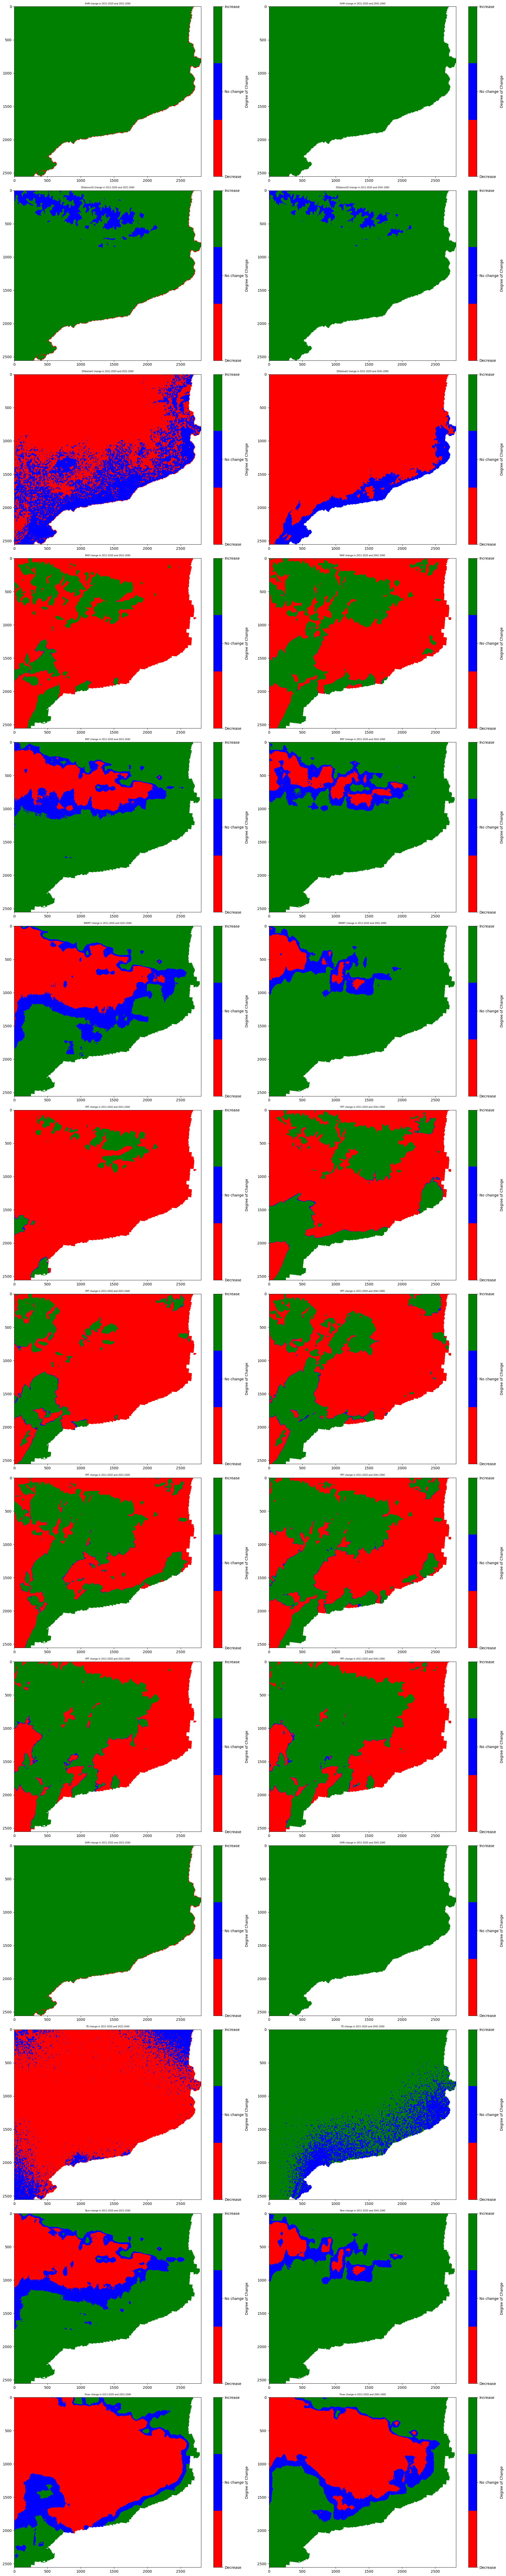

In [58]:
fig, ax = plt.subplots(14,2,figsize=(20, 100))
for index, (hist, ssp45_1, ssp45_2) in enumerate(zip(hist_2020, ssp45_p1, ssp45_p2)):
    # Get the name of the climate variable
    name = hist.split('/')[-1].split('_')[0]

    # Read the raster files
    hist_arr = rasterio.open(hist).read(1)
    ssp45_1_arr = rasterio.open(ssp45_1).read(1)
    ssp45_2_arr = rasterio.open(ssp45_2).read(1)

    if (name == 'MWMT') or (name == 'MAT') or (name == 'Tave') or (name == 'Tmax') or (name == 'PPT') or (name == 'MAP'):
        nodata = rasterio.open(hist).nodata
        hist_arr[hist_arr == nodata] = np.nan
        ssp45_1_arr[ssp45_1_arr == nodata] = np.nan
        ssp45_2_arr[ssp45_2_arr == nodata] = np.nan
    # Calculating difference of climate variables
    diff_climate_degree(hist_arr, ssp45_1_arr, ax[index, 0], title= f'{name} change in 2011-2020 and 2021-2040')
    diff_climate_degree(hist_arr, ssp45_2_arr, ax[index, 1], title= f'{name} change in 2011-2020 and 2041-2060')
plt.tight_layout()
plt.show()

## Conclusion

In this Notebook, for a given area where hazard (for several projected times), exposures and vulnerability were already present,risk has been evaluated following simple rules, and adopting different strategies. The proposed framework can be applied to any study area given that hazard (by the means of the previous Notebook) is available.  